# Analysis of Human data


## Survey


In [1]:
# Pretest results
import pandas as pd

# get true order hidden from participants
with open('../data/survey_samples/pilot_survey_samples_group1_order1_true_order.csv', 'r') as f:
    group_1_order_1 = f.readlines()
with open('../data/survey_samples/pilot_survey_samples_group2_order1_true_order.csv', 'r') as f:
    group_2_order_1 = f.readlines()
with open('../data/survey_samples/pilot_survey_samples_group3_order1_true_order.csv', 'r') as f:
    group_3_order_1 = f.readlines()
with open('../data/survey_samples/pilot_survey_samples_group4_order1_true_order.csv', 'r') as f:
    group_4_order_1 = f.readlines()

with open('../data/survey_samples/pilot_survey_samples_group1_order2_true_order.csv', 'r') as f:
    group_1_order_2 = f.readlines()
with open('../data/survey_samples/pilot_survey_samples_group2_order2_true_order.csv', 'r') as f:
    group_2_order_2 = f.readlines()
with open('../data/survey_samples/pilot_survey_samples_group3_order2_true_order.csv', 'r') as f:
    group_3_order_2 = f.readlines()
with open('../data/survey_samples/pilot_survey_samples_group4_order2_true_order.csv', 'r') as f:
    group_4_order_2 = f.readlines()

likert_7_scale = {
    '1': 'Strongly Disagree',
    '2': 'Disagree',
    '3': 'Somewhat Disagree',
    '4': 'Neither Agree nor Disagree',
    '5': 'Somewhat Agree',
    '6': 'Agree',
    '7': 'Strongly Agree'
}
# reverse the likert scale
reverse_likert_7_scale = {
    v: int(k) for k, v in likert_7_scale.items()
}
question_types = {
    'The main passage is written as if the new fact is true': 'Edit consistency',
    'The related passage does not contradict the new fact': 'Edit consistency',
    'Ignoring the new fact, most of the old facts are still true in the main passage.': 'Factual consistency',
    'Ignoring the new fact, most of the old facts are still true in the related passage.': 'Factual consistency',
    'Ignoring the old and new facts, the main passage does not contradict itself.': 'Internal consistency',
    'Ignoring the old and new facts, the related passage does not contradict itself.': 'Internal consistency',
    'Ignoring the old and new facts, the main passage and the related passage do not contradict each other.': 'Cross passage consistency',
    'The main passage is focused on the subject and the related passage is focused on the related entity': 'Topicality',
    'Both passages are natural sounding text close to what a human would write.': 'Naturalness'
}


def _merge_responses_with_true_order(
    filename,
    true_order,
    participant_id,
    group_id,
    order_id
):
    responses = []
    with open(filename, 'r') as f:
        columns = []
        lines = f.readlines()
        columns = lines[0].split('\t')
        # columns 1 to 9 are the questions
        questions = columns[1:]
        first_question = questions[0]
        for i, line in enumerate(lines[1:]):
            participant_no = i
            sample_id = true_order[0]
            question_index = 0
            true_order_idx = 0
            for j, response in enumerate(line.split('\t')):
                if j == 0:
                    continue
                question = questions[question_index]
                if j != 1 and question == first_question:
                    # get the next sample_id
                    true_order_idx += 1
                    sample_id = true_order[
                        true_order_idx
                    ]

                method, samp_id = sample_id.replace(
                    'no_edit', 'noedit'
                ).split('_')
                
                responses.append(
                    {
                        'participant_id': participant_id.replace(' ', '_').strip() + "_" + str(participant_no),
                        'group_id': group_id,
                        'order_id': order_id,
                        'sample_id': samp_id.strip(),
                        'method': method.strip().replace(
                            'noedit', 'no_edit'
                        ),
                        'question': question.replace('[Answer]', '').strip(),
                        'response': reverse_likert_7_scale[response.strip()],
                        'question_type': question_types[question.replace('[Answer]', '').strip()],
                    }
                )
                question_index += 1
    return responses


group_1_order_1_responses = _merge_responses_with_true_order(
    '../results/AI Text Generation Fact Changing Survey (Group 1 Order 1) (Responses) - Form Responses 1.tsv',
    group_1_order_1,
    'Group 1 Order 1',
    'Group 1',
    'Order 1'
)
group_1_order_1_df = pd.DataFrame(group_1_order_1_responses)
group_2_order_1_responses = _merge_responses_with_true_order(
    '../results/AI Text Generation Fact Changing Survey (Group 2 Order 1) (Responses) - Form Responses 1.tsv',
    group_2_order_1,
    'Group 2 Order 1',
    'Group 2',
    'Order 1'
)
group_2_order_1_df = pd.DataFrame(group_2_order_1_responses)
group_3_order_1_responses = _merge_responses_with_true_order(
    '../results/AI Text Generation Fact Changing Survey (Group 3 Order 1) (Responses) - Form Responses 1.tsv',
    group_3_order_1,
    'Group 3 Order 1',
    'Group 3',
    'Order 1'
)
group_3_order_1_df = pd.DataFrame(group_3_order_1_responses)
group_4_order_1_responses = _merge_responses_with_true_order(
    '../results/AI Text Generation Fact Changing Survey (Group 4 Order 1) (Responses) - Form Responses 1.tsv',
    group_4_order_1,
    'Group 4 Order 1',
    'Group 4',
    'Order 1'
)
group_4_order_1_df = pd.DataFrame(group_4_order_1_responses)


group_1_order_2_responses = _merge_responses_with_true_order(
    '../results/AI Text Generation Fact Changing Survey (Group 1 Order 2) (Responses) - Form Responses 1.tsv',
    group_1_order_2,
    'Group 1 Order 2',
    'Group 1',
    'Order 2'
)
group_1_order_2_df = pd.DataFrame(group_1_order_2_responses)
group_2_order_2_responses = _merge_responses_with_true_order(
    '../results/AI Text Generation Fact Changing Survey (Group 2 Order 2) (Responses) - Form Responses 1.tsv',
    group_2_order_2,
    'Group 2 Order 2',
    'Group 2',
    'Order 2'
)
group_2_order_2_df = pd.DataFrame(group_2_order_2_responses)
group_3_order_2_responses = _merge_responses_with_true_order(
    '../results/AI Text Generation Fact Changing Survey (Group 3 Order 2) (Responses) - Form Responses 1_2.tsv',
    group_3_order_2,
    'Group 3 Order 2',
    'Group 3',
    'Order 2'
)
group_3_order_2_df = pd.DataFrame(group_3_order_2_responses)
group_4_order_2_responses = _merge_responses_with_true_order(
    '../results/AI Text Generation Fact Changing Survey (Group 4 Order 2) (Responses) - Form Responses 1.tsv',
    group_4_order_2,
    'Group 4 Order 2',
    'Group 4',
    'Order 2'
)
group_4_order_2_df = pd.DataFrame(group_4_order_2_responses)


responses_df = pd.concat(
    [
        group_1_order_1_df,
        group_2_order_1_df,
        group_3_order_1_df,
        group_4_order_1_df,
        group_1_order_2_df,
        group_2_order_2_df,
        group_3_order_2_df,
        group_4_order_2_df,
    ]
)
responses_df.to_csv('../results/human_survey_responses.csv', index=False)
responses_df.sort_values(
    by=['participant_id', 'sample_id', 'method', 'question'],
    inplace=True
)

### Characterization of data collected


In [2]:
responses_df = pd.read_csv('../results/human_survey_responses.csv')
responses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  648 non-null    object
 1   group_id        648 non-null    object
 2   order_id        648 non-null    object
 3   sample_id       648 non-null    object
 4   method          648 non-null    object
 5   question        648 non-null    object
 6   response        648 non-null    int64 
 7   question_type   648 non-null    object
dtypes: int64(1), object(7)
memory usage: 40.6+ KB


/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


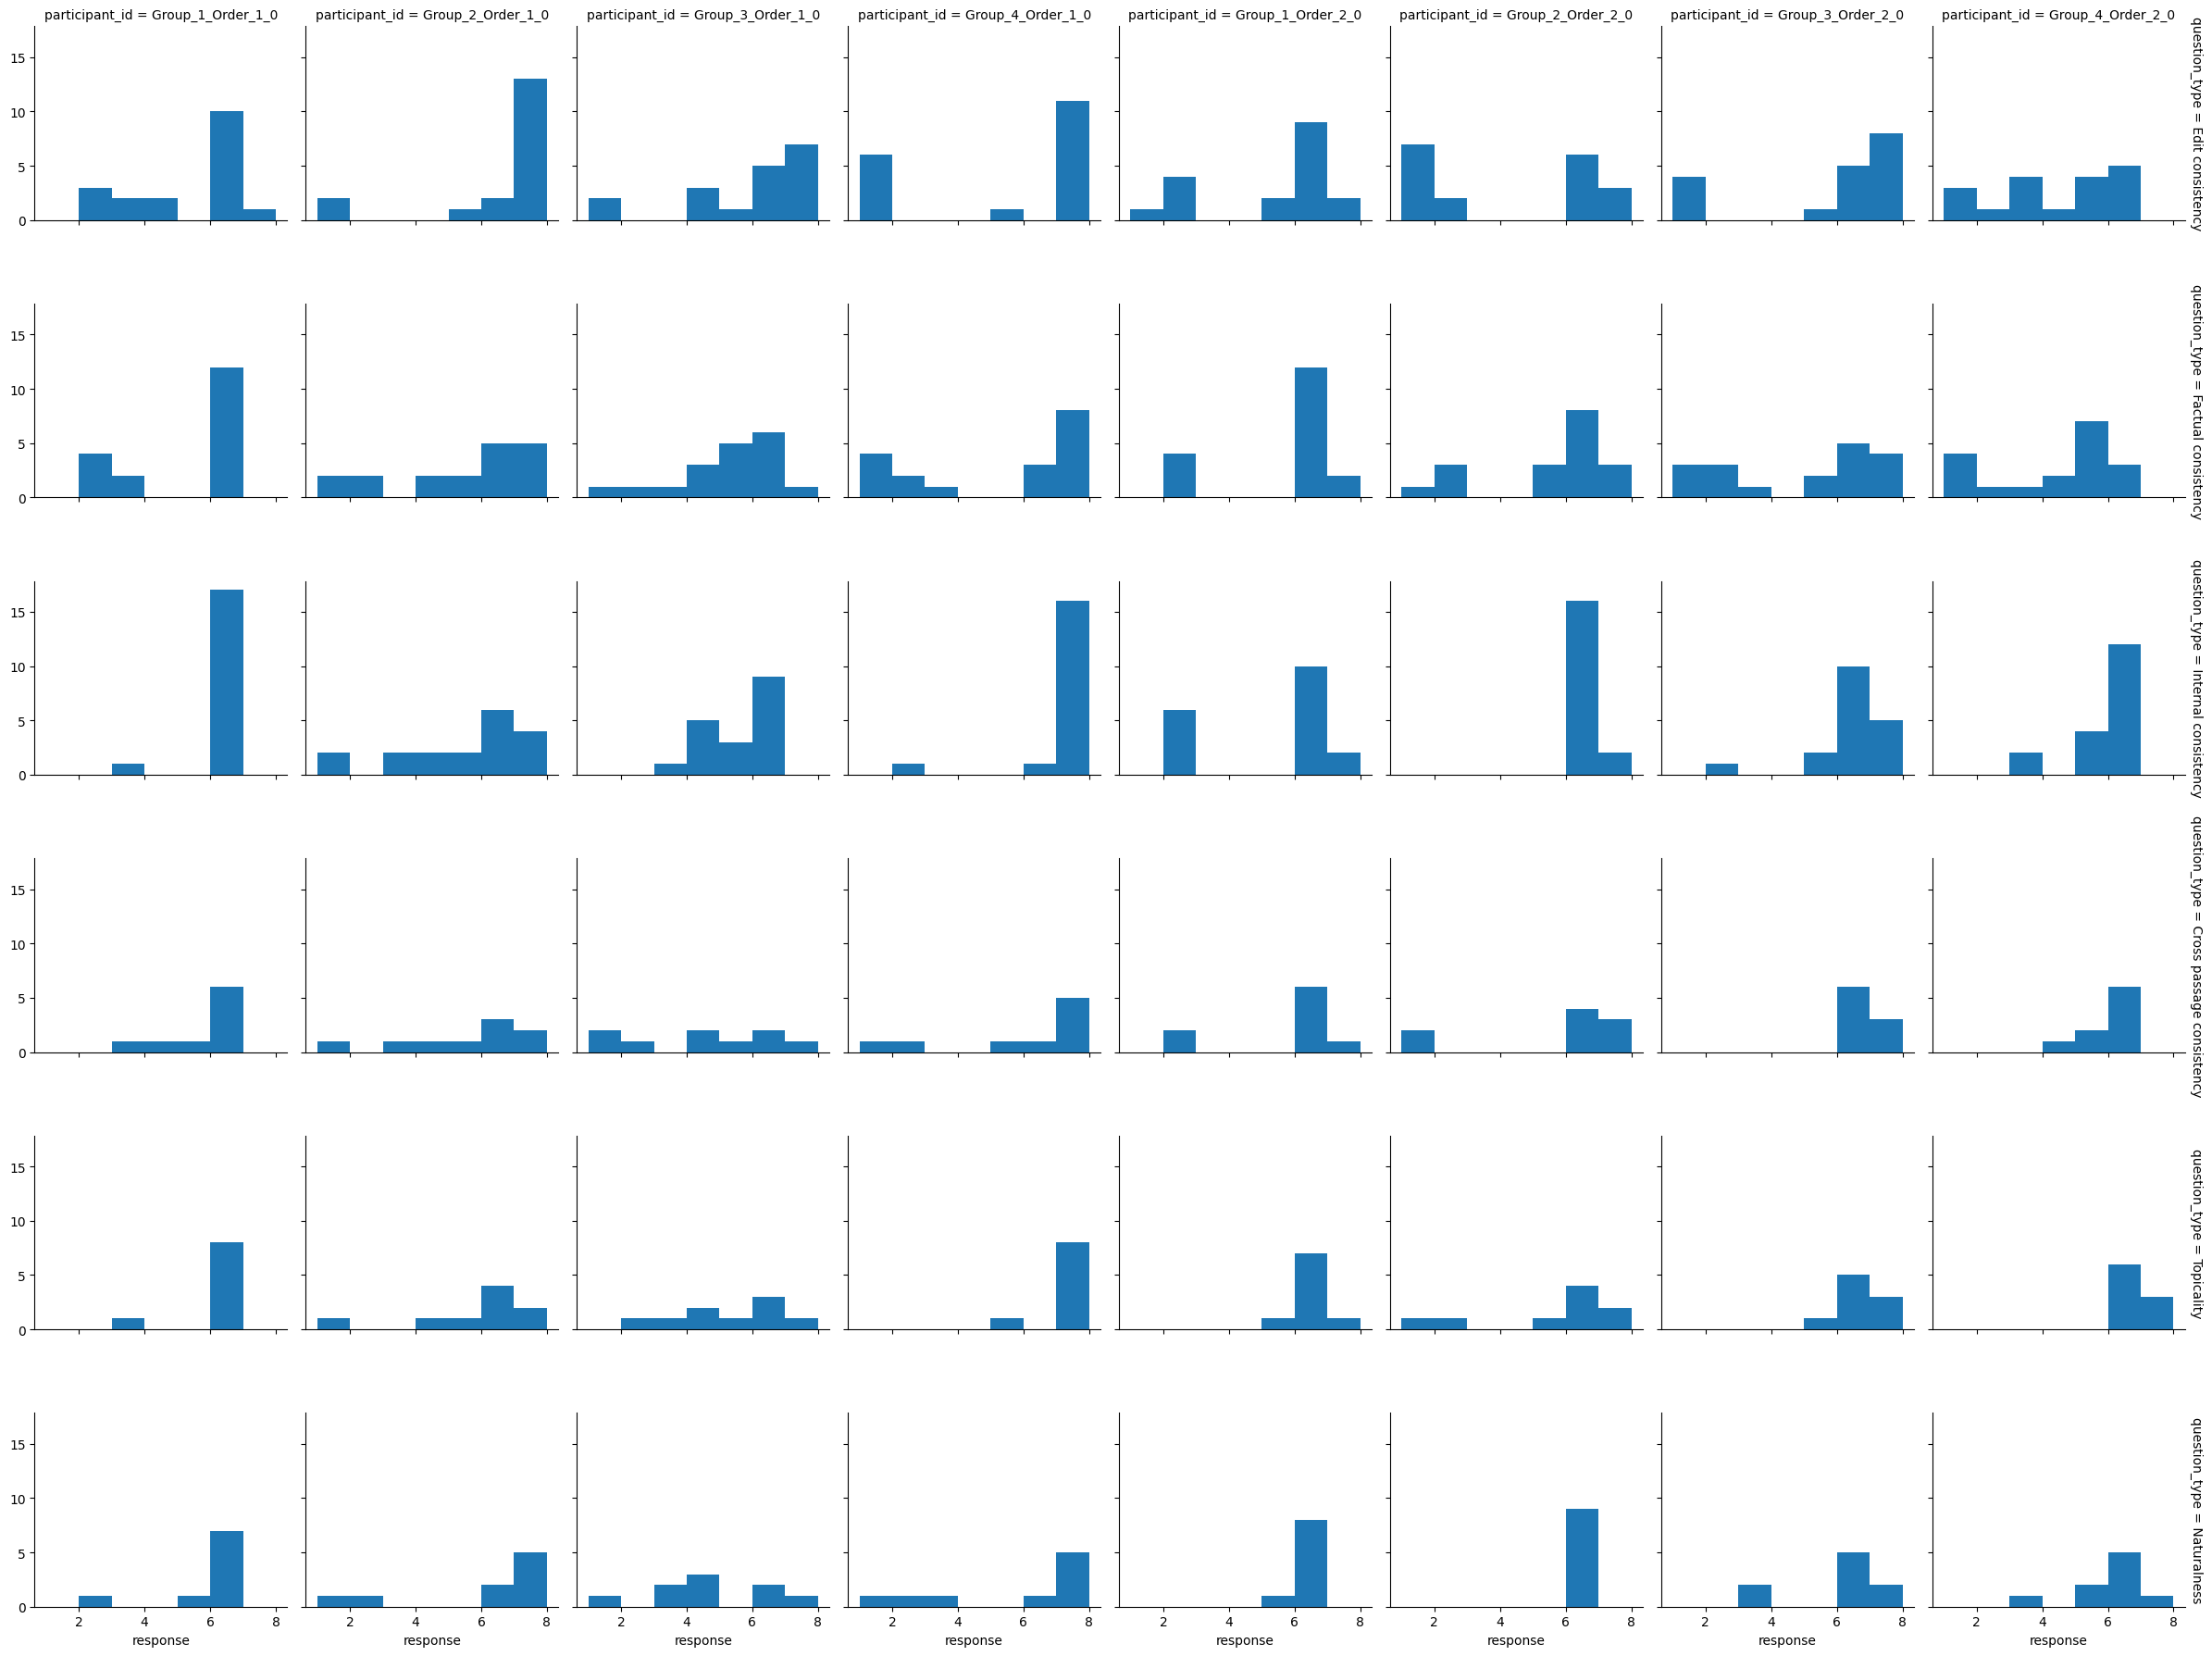

In [3]:
# hist grid
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# plot response distribution
grid = sns.FacetGrid(responses_df, col='participant_id',
                     row='question_type', margin_titles=True)
grid.map(plt.hist, 'response', bins=np.arange(1, 9, 1))

In [4]:
question_order = [
    'The main passage is written as if the new fact is true',
    'The related passage does not contradict the new fact',
    'Ignoring the new fact, most of the old facts are still true in the main passage.',
    'Ignoring the new fact, most of the old facts are still true in the related passage.',
    'Ignoring the old and new facts, the main passage does not contradict itself.',
    'Ignoring the old and new facts, the related passage does not contradict itself.',
    'Ignoring the old and new facts, the main passage and the related passage do not contradict each other.',
    'The main passage is focused on the subject and the related passage is focused on the related entity',
    'Both passages are natural sounding text close to what a human would write.'
]
method_order = [
    'no_edit',
    'rome',
    'human'
]

/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


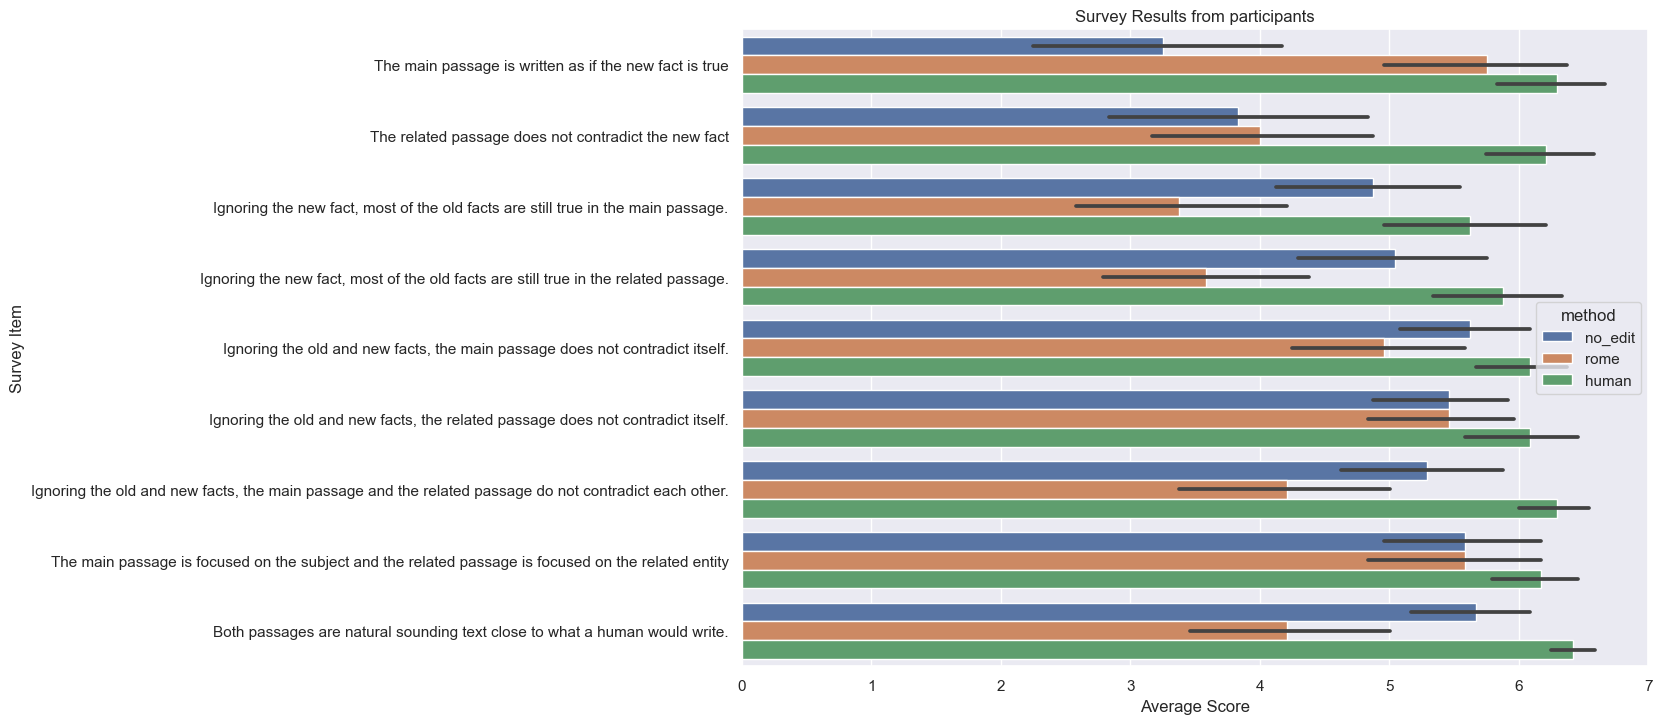

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# increase size of plot
sns.set(rc={'figure.figsize': (11.7, 8.27)})
ax = sns.barplot(x='response', y='question', hue='method', data=responses_df,
                 orient='h', order=question_order, hue_order=method_order)
ax.set_title('Survey Results from participants')
ax.set_ylabel('Survey Item')
ax.set_xlabel('Average Score')

# save plot
fig = ax.get_figure()
fig.savefig('../results/survey_human_results_pilot.png',
            dpi=300, bbox_inches='tight')

In [6]:
import numpy as np
from scipy.stats import iqr
# get median and iqr
pvt = responses_df.pivot_table(index=['question_type', 'question'], columns=[
                               'method'], values='response', aggfunc=[np.mean, np.std])
# multple by 100 to get percentage

pvt = pvt.round(1).astype(str)
pvt = pvt['mean'] + '±' + pvt['std']
pvt.to_csv('../results/survey_human_results_table.csv')
pvt

/var/folders/hk/gjvj191n5k7gzt9tg0z8s3km0000gn/T/ipykernel_21561/3869737104.py:4: FutureWarning: The provided callable <function mean at 0x7fad98848f70> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pvt = responses_df.pivot_table(index=['question_type', 'question'], columns=[
/var/folders/hk/gjvj191n5k7gzt9tg0z8s3km0000gn/T/ipykernel_21561/3869737104.py:4: FutureWarning: The provided callable <function std at 0x7fad9884d0d0> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  pvt = responses_df.pivot_table(index=['question_type', 'question'], columns=[


method                                                                          human  \
question_type             question                                                      
Cross passage consistency Ignoring the old and new facts, the main passag...  6.3±0.7   
Edit consistency          The main passage is written as if the new fact ...  6.3±1.1   
                          The related passage does not contradict the new...  6.2±1.1   
Factual consistency       Ignoring the new fact, most of the old facts ar...  5.6±1.6   
                          Ignoring the new fact, most of the old facts ar...  5.9±1.3   
Internal consistency      Ignoring the old and new facts, the main passag...  6.1±1.0   
                          Ignoring the old and new facts, the related pas...  6.1±1.1   
Naturalness               Both passages are natural sounding text close t...  6.4±0.5   
Topicality                The main passage is focused on the subject and ...  6.2±0.9   

method                                                                        no_edit  \
question_type             question                                                      
Cross passage consistency Ignoring the old and new facts, the main passag...  5.3±1.7   
Edit consistency          The main passage is written as if the new fact ...  3.2±2.4   
                          The related passage does not contradict the new...  3.8±2.5   
Factual consistency       Ignoring the new fact, most of the old facts ar...  4.9±1.8   
                          Ignoring the new fact, most of the old facts ar...  5.0±1.7   
Internal consistency      Ignoring the old and new facts, the main passag...  5.6±1.2   
                          Ignoring the old and new facts, the related pas...  5.5±1.4   
Naturalness               Both passages are natural sounding text close t...  5.7±1.1   
Topicality                The main passage is focused on the subject and ...  5.6±1.5   

method                                                                           rome  
question_type             question                                                     
Cross passage consistency Ignoring the old and new facts, the main passag...  4.2±2.2  
Edit consistency          The main passage is written as if the new fact ...  5.8±1.8  
                          The related passage does not contradict the new...  4.0±2.2  
Factual consistency       Ignoring the new fact, most of the old facts ar...  3.4±2.2  
                          Ignoring the new fact, most of the old facts ar...  3.6±2.2  
Internal consistency      Ignoring the old and new facts, the main passag...  5.0±1.8  
                          Ignoring the old and new facts, the related pas...  5.5±1.6  
Naturalness               Both passages are natural sounding text close t...  4.2±2.0  
Topicality                The main passage is focused on the subject and ...  5.6±1.6

In [7]:
import numpy as np
from scipy.stats import iqr
# get median and iqr
pvt = responses_df.pivot_table(index=['question_type'], columns=[
                               'method'], values='response', aggfunc=[np.mean, np.std])

pvt = pvt.round(1).astype(str)
pvt = pvt['mean'] + '±' + pvt['std']
pvt.to_csv('../results/survey_human_results_table_question_type.csv')
pvt

/var/folders/hk/gjvj191n5k7gzt9tg0z8s3km0000gn/T/ipykernel_21561/1896394857.py:4: FutureWarning: The provided callable <function mean at 0x7fad98848f70> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pvt = responses_df.pivot_table(index=['question_type'], columns=[
/var/folders/hk/gjvj191n5k7gzt9tg0z8s3km0000gn/T/ipykernel_21561/1896394857.py:4: FutureWarning: The provided callable <function std at 0x7fad9884d0d0> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  pvt = responses_df.pivot_table(index=['question_type'], columns=[


method,human,no_edit,rome
question_type,,,
Cross passage consistency,6.3±0.7,5.3±1.7,4.2±2.2
Edit consistency,6.2±1.1,3.5±2.5,4.9±2.2
Factual consistency,5.8±1.4,5.0±1.8,3.5±2.1
Internal consistency,6.1±1.0,5.5±1.3,5.2±1.7
Naturalness,6.4±0.5,5.7±1.1,4.2±2.0
Topicality,6.2±0.9,5.6±1.5,5.6±1.6


In [8]:
import numpy as np
from scipy.stats import iqr
# get median and iqr
for participant in responses_df['participant_id'].unique():
    pvt = responses_df[responses_df['participant_id'] == participant].pivot_table(index=['question'], columns=[
                               'method'], values='response', aggfunc=[np.mean, np.std])

    pvt = pvt.round(1).astype(str)
    pvt = pvt['mean'] + '±' + pvt['std']
    print(participant)
    print(pvt)


/var/folders/hk/gjvj191n5k7gzt9tg0z8s3km0000gn/T/ipykernel_21561/2609122988.py:5: FutureWarning: The provided callable <function mean at 0x7fad98848f70> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pvt = responses_df[responses_df['participant_id'] == participant].pivot_table(index=['question'], columns=[
/var/folders/hk/gjvj191n5k7gzt9tg0z8s3km0000gn/T/ipykernel_21561/2609122988.py:5: FutureWarning: The provided callable <function std at 0x7fad9884d0d0> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  pvt = responses_df[responses_df['participant_id'] == participant].pivot_table(index=['question'], columns=[
/var/folders/hk/gjvj191n5k7gzt9tg0z8s3km0000gn/T/ipykernel_21561/2609122988.py:5: FutureWarning: The provided callable <functio

Group_1_Order_1_0
method                                                human  no_edit     rome
question                                                                     
Both passages are natural sounding text close t...  6.0±0.0  5.7±0.6  4.7±2.3
Ignoring the new fact, most of the old facts ar...  4.7±2.3  6.0±0.0  3.7±2.1
Ignoring the new fact, most of the old facts ar...  4.7±2.3  5.0±1.7  4.7±2.3
Ignoring the old and new facts, the main passag...  6.0±0.0  5.0±1.7  5.0±1.0
Ignoring the old and new facts, the main passag...  6.0±0.0  6.0±0.0  6.0±0.0
Ignoring the old and new facts, the related pas...  6.0±0.0  5.0±1.7  6.0±0.0
The main passage is focused on the subject and ...  5.0±1.7  6.0±0.0  6.0±0.0
The main passage is written as if the new fact ...  6.3±0.6  3.7±2.1  4.7±2.3
The related passage does not contradict the new...  6.0±0.0  5.0±1.7  3.3±1.2
Group_2_Order_1_0
method                                                human  no_edit     rome
question                    

/var/folders/hk/gjvj191n5k7gzt9tg0z8s3km0000gn/T/ipykernel_21561/2609122988.py:5: FutureWarning: The provided callable <function mean at 0x7fad98848f70> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pvt = responses_df[responses_df['participant_id'] == participant].pivot_table(index=['question'], columns=[
/var/folders/hk/gjvj191n5k7gzt9tg0z8s3km0000gn/T/ipykernel_21561/2609122988.py:5: FutureWarning: The provided callable <function std at 0x7fad9884d0d0> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  pvt = responses_df[responses_df['participant_id'] == participant].pivot_table(index=['question'], columns=[
/var/folders/hk/gjvj191n5k7gzt9tg0z8s3km0000gn/T/ipykernel_21561/2609122988.py:5: FutureWarning: The provided callable <functio

### Inter rater reliability


In [9]:

order_1_responses = responses_df[responses_df['participant_id'].str.contains(
    'Order_1')
].sort_values(
    by=['participant_id', 'sample_id', 'method', 'question'],
)
order_2_responses = responses_df[responses_df['participant_id'].str.contains(
    'Order_2')].sort_values(
    by=['participant_id', 'sample_id', 'method', 'question'],
)
# merge order 1 and order 2 responses
merged_responses = pd.merge(
    order_1_responses,
    order_2_responses,
    on=['group_id', 'sample_id', 'method', 'question'],
    suffixes=('_order_1', '_order_2')
)
order_1_responses = merged_responses['response_order_1']
order_2_responses = merged_responses['response_order_2']

In [10]:
for group in merged_responses.group_id.unique():
    print(
        group,
        
        merged_responses.loc[
            merged_responses['group_id'] == group
            ][
            ['response_order_1', 'response_order_2']
        ].corr()
    )

Group 1                   response_order_1  response_order_2
response_order_1          1.000000          0.146268
response_order_2          0.146268          1.000000
Group 2                   response_order_1  response_order_2
response_order_1          1.000000          0.282579
response_order_2          0.282579          1.000000
Group 3                   response_order_1  response_order_2
response_order_1          1.000000          0.344689
response_order_2          0.344689          1.000000
Group 4                   response_order_1  response_order_2
response_order_1           1.00000           0.45954
response_order_2           0.45954           1.00000


Text(0.5, 0, 'Order 1')

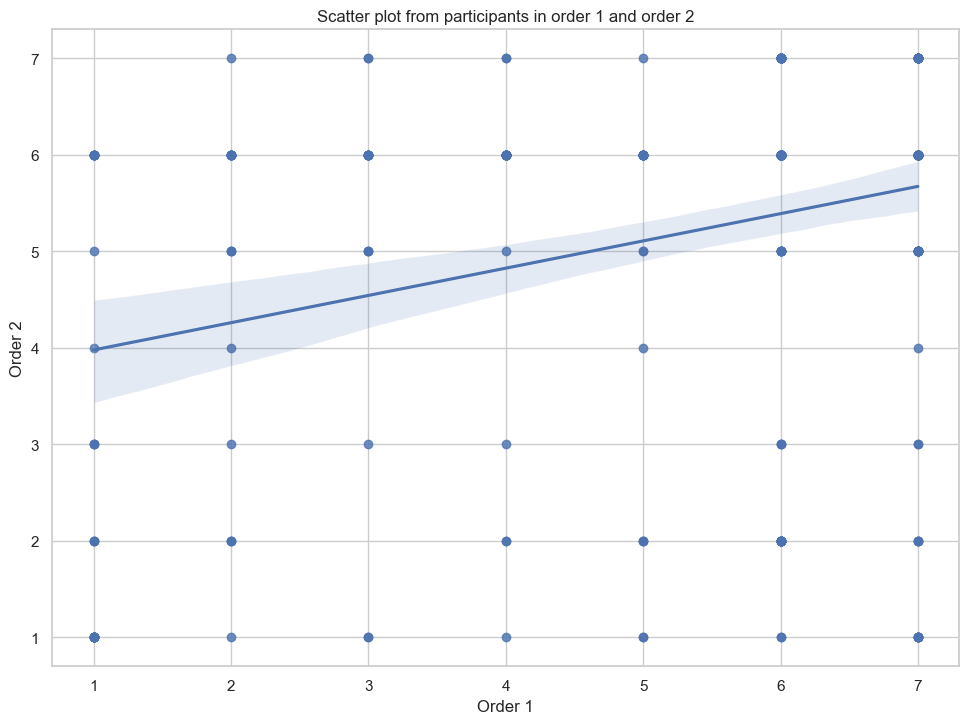

In [11]:
# scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")


# increase size of plot
ax = sns.regplot(x=list(order_1_responses), y=list(order_2_responses))
ax.set_title('Scatter plot from participants in order 1 and order 2')
ax.set_ylabel('Order 2')
ax.set_xlabel('Order 1')

In [12]:
# kendall tau
import scipy.stats as stats
stats.spearmanr(order_1_responses, order_2_responses)

SignificanceResult(statistic=0.2139793871824172, pvalue=0.00010368740571651153)

In [13]:
for method in responses_df.method.unique():
    order_1_responses_tmp = responses_df.loc[
        (responses_df['participant_id'].str.contains('Order_1')) & (
            responses_df['method'] == method)
    ]['response']
    order_2_responses_tmp = responses_df.loc[
        (responses_df['participant_id'].str.contains('Order_2')) & (
            responses_df['method'] == method)
    ]['response']
    print(method)
    print(stats.kendalltau(order_1_responses_tmp, order_2_responses_tmp))

no_edit
SignificanceResult(statistic=-0.06458597362529289, pvalue=0.41803605978602754)
rome
SignificanceResult(statistic=0.12563450703268544, pvalue=0.1036925554492597)
human
SignificanceResult(statistic=-0.22380672142661462, pvalue=0.012273793534617338)


In [14]:
for question_type in responses_df.question_type.unique():
    order_1_responses_tmp = responses_df.loc[
        (responses_df['participant_id'].str.contains('Order_1')) & (
            responses_df['question_type'] == question_type)
    ]['response']
    order_2_responses_tmp = responses_df.loc[
        (responses_df['participant_id'].str.contains('Order_2')) & (
            responses_df['question_type'] == question_type)
    ]['response']
    print(question_type)
    print(stats.kendalltau(order_1_responses_tmp, order_2_responses_tmp))

Edit consistency
SignificanceResult(statistic=-0.05355881840507716, pvalue=0.5810268866720687)
Factual consistency
SignificanceResult(statistic=-0.0024773168672592456, pvalue=0.9792243321416644)
Internal consistency
SignificanceResult(statistic=-0.2535649876304485, pvalue=0.013972446522923534)
Cross passage consistency
SignificanceResult(statistic=-0.14776544021860258, pvalue=0.295931621825137)
Topicality
SignificanceResult(statistic=0.04163966007422146, pvalue=0.777550444329265)
Naturalness
SignificanceResult(statistic=0.2620662876092122, pvalue=0.07303880714243452)


In [15]:
for question in responses_df.question.unique():
    order_1_responses_tmp = responses_df.loc[
        (responses_df['participant_id'].str.contains('Order_1')) & (
            responses_df['question'] == question)
    ]['response']
    order_2_responses_tmp = responses_df.loc[
        (responses_df['participant_id'].str.contains('Order_2')) & (
            responses_df['question'] == question)
    ]['response']
    print(question)
    print(stats.kendalltau(order_1_responses_tmp, order_2_responses_tmp))

The main passage is written as if the new fact is true
SignificanceResult(statistic=-0.3412496667485351, pvalue=0.015560026141650517)
The related passage does not contradict the new fact
SignificanceResult(statistic=0.2208020861621585, pvalue=0.1064344137512761)
Ignoring the new fact, most of the old facts are still true in the main passage.
SignificanceResult(statistic=-0.029528474453845873, pvalue=0.8272962660809616)
Ignoring the new fact, most of the old facts are still true in the related passage.
SignificanceResult(statistic=0.014031465764528133, pvalue=0.9179552500726578)
Ignoring the old and new facts, the main passage does not contradict itself.
SignificanceResult(statistic=-0.2169350126135619, pvalue=0.1427695285023104)
Ignoring the old and new facts, the related passage does not contradict itself.
SignificanceResult(statistic=-0.2932155129579041, pvalue=0.04625874235172905)
Ignoring the old and new facts, the main passage and the related passage do not contradict each other.


In [16]:
import krippendorff
for method in responses_df.method.unique():
    for question in responses_df.question.unique():
        order_1_responses_tmp = responses_df.loc[
            (responses_df['participant_id'].str.contains('Order_1')) & (
                responses_df['question'] == question) & (responses_df['method'] == method)
        ]['response']
        order_2_responses_tmp = responses_df.loc[
            (responses_df['participant_id'].str.contains('Order_2')) & (
                responses_df['question'] == question) & (responses_df['method'] == method)
        ]['response']
        print(method, question)
        print(stats.kendalltau(order_1_responses_tmp, order_2_responses_tmp))
        print(krippendorff.alpha(
            np.array([
                order_1_responses_tmp,
                order_2_responses_tmp
            ]),
            level_of_measurement='interval'
        ))

no_edit The main passage is written as if the new fact is true
SignificanceResult(statistic=-0.3065696697424829, pvalue=0.2299924290616272)
-0.3199023199023199
no_edit The related passage does not contradict the new fact
SignificanceResult(statistic=-0.537037037037037, pvalue=0.030822844370552577)
-0.6001131221719456
no_edit Ignoring the new fact, most of the old facts are still true in the main passage.
SignificanceResult(statistic=0.08362420100070908, pvalue=0.7454680352561859)
0.16204458945078848
no_edit Ignoring the new fact, most of the old facts are still true in the related passage.
SignificanceResult(statistic=0.07580980435789034, pvalue=0.7614697725539176)
0.3190332326283988
no_edit Ignoring the old and new facts, the main passage does not contradict itself.
SignificanceResult(statistic=-0.3448627709002392, pvalue=0.2076208634096227)
-0.15672514619883038
no_edit Ignoring the old and new facts, the related passage does not contradict itself.
SignificanceResult(statistic=-0.2397

In [17]:
# calculate ICC
import pingouin as pg
responses_df['enhanced_sample_id'] = responses_df['sample_id'] + \
    responses_df['method'] + responses_df['question']
pg.intraclass_corr(
    data=responses_df,
    targets='enhanced_sample_id',
    raters='participant_id',
    ratings='response'
)

/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1094: RuntimeWarning: divide by zero encountered in scalar divide
  fval_fac1 = ms_fac1 / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1095: RuntimeWarning: divide by zero encountered in scalar divide
  fval_fac2 = ms_fac2 / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1096: RuntimeWarning: divide by zero encountered in scalar divide
  fval_inter = ms_inter / ms_resid


,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.597671,12.884248,323,2268,0.0,"[0.56, 0.64]"
1,ICC2,Single random raters,0.598546,13.467727,323,2261,0.0,"[0.55, 0.64]"
2,ICC3,Single fixed raters,0.609141,13.467727,323,2261,0.0,"[0.57, 0.65]"
3,ICC1k,Average raters absolute,0.922386,12.884248,323,2268,0.0,"[0.91, 0.93]"
4,ICC2k,Average random raters,0.922646,13.467727,323,2261,0.0,"[0.91, 0.94]"
5,ICC3k,Average fixed raters,0.925748,13.467727,323,2261,0.0,"[0.91, 0.94]"


In [18]:
# calculate ICC
import pingouin as pg

for method in responses_df.method.unique():
    for question in responses_df.question.unique():
        print(method, question)
        print(pg.intraclass_corr(
            data=responses_df.loc[
                (responses_df['question'] == question) & (
                    responses_df['method'] == method)
            ],
            targets='sample_id',
            raters='participant_id',
            ratings='response'
        ))

/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1094: RuntimeWarning: divide by zero encountered in scalar divide
  fval_fac1 = ms_fac1 / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1095: RuntimeWarning: divide by zero encountered in scalar divide
  fval_fac2 = ms_fac2 / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1096: RuntimeWarning: divide by zero encountered in scalar divide
  fval_inter = ms_inter / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1094: RuntimeWarning: divide by zero encountered in scalar divide
  fval_fac1 = ms_fac1 / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1095: RuntimeWarn

no_edit The main passage is written as if the new fact is true
    Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.388330   6.078947   11   84   
1   ICC2     Single random raters  0.444887 -18.280576   11   77   
2   ICC3      Single fixed raters  1.709184 -18.280576   11   77   
3  ICC1k  Average raters absolute  0.835498   6.078947   11   84   
4  ICC2k    Average random raters  0.865074 -18.280576   11   77   
5  ICC3k     Average fixed raters  1.054703 -18.280576   11   77   

           pval         CI95%  
0  3.135782e-07  [0.19, 0.68]  
1  1.000000e+00  [0.11, 0.77]  
2  1.000000e+00  [6.54, 1.17]  
3  3.135782e-07  [0.65, 0.94]  
4  1.000000e+00  [0.48, 0.96]  
5  1.000000e+00  [1.12, 1.02]  
no_edit The related passage does not contradict the new fact
    Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.535484  10.222222   11   84   
1   ICC2     Single random raters  0.54

/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1094: RuntimeWarning: divide by zero encountered in scalar divide
  fval_fac1 = ms_fac1 / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1095: RuntimeWarning: divide by zero encountered in scalar divide
  fval_fac2 = ms_fac2 / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1096: RuntimeWarning: divide by zero encountered in scalar divide
  fval_inter = ms_inter / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1094: RuntimeWarning: divide by zero encountered in scalar divide
  fval_fac1 = ms_fac1 / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1095: RuntimeWarn

    Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.560861  11.217469   11   84   
1   ICC2     Single random raters  0.571756  20.906977   11   77   
2   ICC3      Single fixed raters  0.713333  20.906977   11   77   
3  ICC1k  Average raters absolute  0.910853  11.217469   11   84   
4  ICC2k    Average random raters  0.914390  20.906977   11   77   
5  ICC3k     Average fixed raters  0.952169  20.906977   11   77   

           pval         CI95%  
0  1.738275e-12   [0.35, 0.8]  
1  7.556010e-19  [0.33, 0.81]  
2  7.556010e-19  [0.52, 0.88]  
3  1.738275e-12  [0.81, 0.97]  
4  7.556010e-19   [0.8, 0.97]  
5  7.556010e-19   [0.9, 0.98]  
no_edit The main passage is focused on the subject and the related passage is focused on the related entity
    Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.497143   8.909091   11   84   
1   ICC2     Single random raters  0.533210 -38.862069 

/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1094: RuntimeWarning: divide by zero encountered in scalar divide
  fval_fac1 = ms_fac1 / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1095: RuntimeWarning: divide by zero encountered in scalar divide
  fval_fac2 = ms_fac2 / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1096: RuntimeWarning: divide by zero encountered in scalar divide
  fval_inter = ms_inter / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1094: RuntimeWarning: divide by zero encountered in scalar divide
  fval_fac1 = ms_fac1 / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1095: RuntimeWarn

    Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.501134   9.036364   11   84   
1   ICC2     Single random raters  0.512278  14.262693   11   77   
2   ICC3      Single fixed raters  0.623754  14.262693   11   77   
3  ICC1k  Average raters absolute  0.889336   9.036364   11   84   
4  ICC2k    Average random raters  0.893649  14.262693   11   77   
5  ICC3k     Average fixed raters  0.929887  14.262693   11   77   

           pval         CI95%  
0  2.032879e-10  [0.29, 0.76]  
1  1.647618e-14  [0.29, 0.77]  
2  1.647618e-14  [0.41, 0.84]  
3  2.032879e-10  [0.76, 0.96]  
4  1.647618e-14  [0.76, 0.96]  
5  1.647618e-14  [0.85, 0.98]  
rome Ignoring the old and new facts, the related passage does not contradict itself.
    Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.319130   4.749671   11   84   
1   ICC2     Single random raters  0.354592  13.401487   11   77   
2   ICC3  

/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1094: RuntimeWarning: divide by zero encountered in scalar divide
  fval_fac1 = ms_fac1 / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1095: RuntimeWarning: divide by zero encountered in scalar divide
  fval_fac2 = ms_fac2 / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1096: RuntimeWarning: divide by zero encountered in scalar divide
  fval_inter = ms_inter / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1094: RuntimeWarning: divide by zero encountered in scalar divide
  fval_fac1 = ms_fac1 / ms_resid
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/pingouin/parametric.py:1095: RuntimeWarn

    Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.437100   7.212121   11   84   
1   ICC2     Single random raters  0.484375 -23.800000   11   77   
2   ICC3      Single fixed raters  1.476190 -23.800000   11   77   
3  ICC1k  Average raters absolute  0.861345   7.212121   11   84   
4  ICC2k    Average random raters  0.882562 -23.800000   11   77   
5  ICC3k     Average fixed raters  1.042017 -23.800000   11   77   

           pval         CI95%  
0  1.650906e-08  [0.23, 0.72]  
1  1.000000e+00   [0.12, 0.8]  
2  1.000000e+00   [3.0, 1.13]  
3  1.650906e-08   [0.7, 0.95]  
4  1.000000e+00  [0.52, 0.97]  
5  1.000000e+00  [1.09, 1.01]  


In [19]:
# agreement scores

# calculate agreement within 1, 2, and 3 points
absolute_agreement = np.sum(order_1_responses == np.array(
    order_2_responses)) / len(order_1_responses)
agreement_within_one = np.sum(np.abs(
    order_1_responses - np.array(order_2_responses) <= 1)) / len(order_1_responses)
agreement_within_two = np.sum(np.abs(
    order_1_responses - np.array(order_2_responses) <= 2)) / len(order_1_responses)
agreement_within_three = np.sum(np.abs(
    order_1_responses - np.array(order_2_responses) <= 3)) / len(order_1_responses)

print(
    'Absolute Agreement: ', absolute_agreement
)
print(
    'Agreement within 1 point: ', agreement_within_one
)
print(
    'Agreement within 2 points: ', agreement_within_two
)
print(
    'Agreement within 3 points: ', agreement_within_three
)

Absolute Agreement:  0.3117283950617284
Agreement within 1 point:  0.8209876543209876
Agreement within 2 points:  0.8827160493827161
Agreement within 3 points:  0.9074074074074074


In [20]:
tmp = np.array(
    [
        order_1_responses,
        order_2_responses
    ]
)
krippendorff.alpha(
    tmp,
    level_of_measurement='interval',
    
)

0.29560292850695824

In [21]:
# cronbach alpha
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(
    order_1_responses,
    order_2_responses,
    weights='quadratic'
)

0.2947695035460993

### Factor Analysis and Inter-item correlations


In [22]:

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler

In [23]:
questions = []
for question in responses_df.question.unique():
    questions.append(
        responses_df.loc[
            responses_df['question'] == question
        ]['response'].values
    )

In [24]:
questions_idx = responses_df.question.unique()

In [25]:

X = StandardScaler().fit_transform(np.array(questions))
feature_names = questions_idx

/var/folders/hk/gjvj191n5k7gzt9tg0z8s3km0000gn/T/ipykernel_21561/974806638.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)


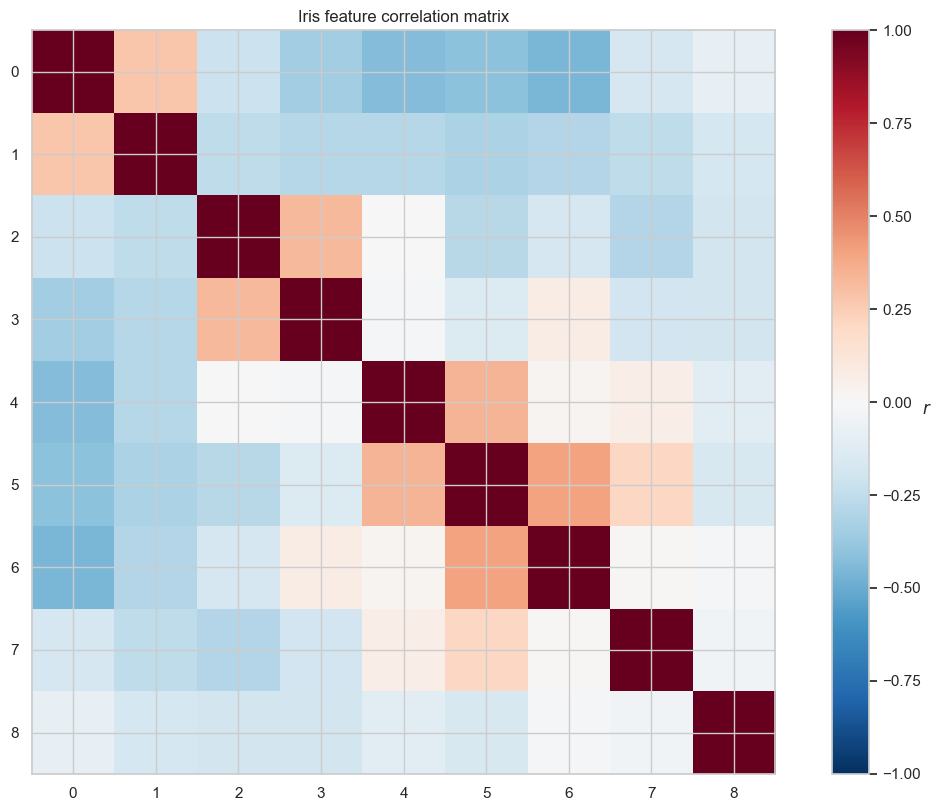

In [26]:
# factor analysis
ax = plt.axes()

im = ax.imshow(np.corrcoef(X), cmap="RdBu_r", vmin=-1, vmax=1)

# ax.set_xticks(np.arange(len(feature_names)))
# ax.set_xticklabels(list(feature_names), rotation=90)
# ax.set_yticks(np.arange(len(feature_names)))
# ax.set_yticklabels(list(feature_names))

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Iris feature correlation matrix")
plt.tight_layout()

In [27]:
for i, question in enumerate(responses_df.question.unique()):
    print(i, question)

0 The main passage is written as if the new fact is true
1 The related passage does not contradict the new fact
2 Ignoring the new fact, most of the old facts are still true in the main passage.
3 Ignoring the new fact, most of the old facts are still true in the related passage.
4 Ignoring the old and new facts, the main passage does not contradict itself.
5 Ignoring the old and new facts, the related passage does not contradict itself.
6 Ignoring the old and new facts, the main passage and the related passage do not contradict each other.
7 The main passage is focused on the subject and the related passage is focused on the related entity
8 Both passages are natural sounding text close to what a human would write.


In [28]:
df = pd.DataFrame(questions).fillna(4)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,6,2,3,2,6,7,6,6,6,7,...,7,6,5,3,4,1,1,6,6,5
1,6,2,3,6,6,6,6,4,4,6,...,7,6,3,2,3,3,1,5,6,5
2,6,6,6,6,6,2,6,2,3,6,...,1,6,1,5,4,5,1,5,2,5
3,6,6,3,6,6,2,6,2,6,6,...,2,6,1,5,4,3,1,6,5,5
4,6,6,6,6,6,6,6,6,6,6,...,2,6,3,5,6,5,6,6,3,6


In [29]:
X.shape

(9, 72)

In [30]:
# cronbach alpha
# 0 The main passage is written as if the new fact is true
# 1 The related passage does not contradict the new fact
# 2 Ignoring the new fact, most of the old facts are still true in the main passage.
# 3 Ignoring the new fact, most of the old facts are still true in the related passage.
# 4 Ignoring the old and new facts, the main passage does not contradict itself.
# 5 Ignoring the old and new facts, the related passage does not contradict itself.
# 6 Ignoring the old and new facts, the main passage and the related passage do not contradict each other.
# 7 The main passage is focused on the subject and the related passage is focused on the related entity
# 8 Both passages are natural sounding text close to what a human would write.

edit_consistency = pg.cronbach_alpha(
    pd.DataFrame(X[3:6, :])
)
edit_consistency

(0.9035875485125286, array([0.635, 0.998]))

In [31]:
# inter-item correlations
# import pingouin as pg
# inter_item_corr_df = pd.DataFrame(X.T, columns=responses_df.question.unique())
# pg.pairwise_corr(
#     inter_item_corr_df,
#     columns=inter_item_corr_df.columns,
#     method='spearman',
#     alternative='greater', padjust='bonf'
# ).sort_values(by=['r'], ascending=False)[:5][['X', 'Y', 'r', 'p-unc']].to_csv(3)

In [32]:
# factor analysis
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation=None, n_factors=8)
fa.fit(X.T)
fa.loadings_.round(2)

array([[-0.8 ,  0.21, -0.07,  0.07, -0.16, -0.43,  0.28,  0.12],
       [-0.65,  0.19, -0.37, -0.31,  0.24,  0.44, -0.19, -0.08],
       [ 0.03, -0.83, -0.01,  0.22,  0.03, -0.23, -0.45, -0.05],
       [ 0.25, -0.74,  0.03, -0.15, -0.28,  0.3 ,  0.43, -0.09],
       [ 0.57,  0.01, -0.3 ,  0.42,  0.54,  0.07,  0.18,  0.26],
       [ 0.7 ,  0.39, -0.26, -0.14,  0.07, -0.26,  0.05, -0.43],
       [ 0.61,  0.13,  0.15, -0.66, -0.1 , -0.1 , -0.14,  0.33],
       [ 0.31,  0.49,  0.01,  0.48, -0.58,  0.26, -0.17,  0.05],
       [-0.05,  0.2 ,  0.91,  0.09,  0.32,  0.1 ,  0.02, -0.11]])

In [33]:
fa.get_factor_variance()

(array([2.42031411, 1.7717122 , 1.14797251, 1.03940677, 0.90607395,
        0.6829253 , 0.58308766, 0.40850751]),
 array([0.26892379, 0.19685691, 0.1275525 , 0.11548964, 0.10067488,
        0.07588059, 0.06478752, 0.04538972]),
 array([0.26892379, 0.4657807 , 0.5933332 , 0.70882284, 0.80949773,
        0.88537832, 0.95016583, 0.99555556]))

In [34]:
fa.get_communalities()

array([0.99616338, 0.99581013, 0.99568344, 0.99543562, 0.99529454,
       0.99535287, 0.99535939, 0.99541462, 0.995486  ])

### Statistical Tests for Significance


ANOVA


In [35]:
# anova
pg.kruskal(
    dv='response',
    between='method',
    data=responses_df
)

,Source,ddof1,H,p-unc
Kruskal,method,2,86.415964,1.717955e-19


In [36]:
import scikit_posthocs as sp

# perform dunn test
sp.posthoc_dunn(
    a=responses_df,
    val_col='response',
    group_col='method',
    p_adjust='bonferroni'
)

,human,no_edit,rome
human,1.000000e+00,1.020791e-11,3.535332e-18
no_edit,1.020791e-11,1.000000e+00,1.900477e-01
rome,3.535332e-18,1.900477e-01,1.000000e+00


Wilxocon test (one sided) for each question and method


In [37]:
import warnings
warnings.filterwarnings("ignore")


for method_1 in responses_df.method.unique():
    for method_2 in responses_df.method.unique():
        if method_1 == method_2:
            continue
        for question_type in responses_df.question_type.unique():
            method_1_responses_tmp = responses_df.loc[
                (responses_df['question_type'] == question_type) & (
                    responses_df['method'] == method_1)
            ]['response']
            method_2_responses_tmp = responses_df.loc[
                (responses_df['question_type'] == question_type) & (
                    responses_df['method'] == method_2)
            ]['response']

            effect_df = pg.wilcoxon(
                method_1_responses_tmp,
                method_2_responses_tmp,
                alternative='less'
            )
            if effect_df['p-val'].values[0] < 0.05:
                print(
                    f"{method_1} is significantly less than {method_2} for {question_type}")
                print(effect_df)
            

no_edit is significantly less than rome for Edit consistency
          W-val alternative     p-val  RBC      CLES
Wilcoxon  166.5        less  0.004405 -0.5  0.655816
no_edit is significantly less than human for Edit consistency
          W-val alternative         p-val  RBC      CLES
Wilcoxon    0.0        less  2.497343e-07 -1.0  0.803602
no_edit is significantly less than human for Factual consistency
          W-val alternative     p-val      RBC      CLES
Wilcoxon  115.0        less  0.004214 -0.53629  0.645616
no_edit is significantly less than human for Internal consistency
          W-val alternative     p-val       RBC      CLES
Wilcoxon   12.5        less  0.000644 -0.853801  0.628038
no_edit is significantly less than human for Cross passage consistency
          W-val alternative    p-val       RBC      CLES
Wilcoxon    6.5        less  0.00569 -0.833333  0.684896
no_edit is significantly less than human for Topicality
          W-val alternative     p-val       RBC      CL

## Annotation Analysis


### Characterization of data collected


In [38]:
import json
import pandas as pd

gpt_35_annotations_human_path = '../results/annotations_llama2_chat_human_edit_pretest_annotation_gpt-3.5-turbo-0613.json'
gpt_35_annotations_human = json.load(open(gpt_35_annotations_human_path))

gpt_35_annotations_no_edit_path = '../results/annotations_llama2_chat_no_edit_pretest_annotation_gpt-3.5-turbo-0613.json'
gpt_35_annotations_no_edit = json.load(open(gpt_35_annotations_no_edit_path))

gpt_35_annotations_edit_path = '../results/annotations_llama2_chat_rome_edit_pretest_annotation_gpt-3.5-turbo-0613.json'
gpt_35_annotations_edit = json.load(open(gpt_35_annotations_edit_path))

gpt_35_df = pd.DataFrame(
    gpt_35_annotations_human + gpt_35_annotations_no_edit + gpt_35_annotations_edit
)

gpt_4_annotations_human_path = '../results/annotations_llama2_chat_human_edit_pretest_annotation_gpt-4.json'
gpt_4_annotations_human = json.load(open(gpt_4_annotations_human_path))

gpt_4_annotations_no_edit_path = '../results/annotations_llama2_chat_no_edit_pretest_annotation_gpt-4.json'
gpt_4_annotations_no_edit = json.load(open(gpt_4_annotations_no_edit_path))

gpt_4_annotations_edit_path = '../results/annotations_llama2_chat_rome_edit_pretest_annotation_gpt-4.json'
gpt_4_annotations_edit = json.load(open(gpt_4_annotations_edit_path))

gpt_4_df = pd.DataFrame(
    gpt_4_annotations_human + gpt_4_annotations_no_edit + gpt_4_annotations_edit
)

In [39]:
import json

with open('../data/annotation_data/longform_eval_first_3_samples_paragraph_annotations (2).json') as f:
    pretest = json.load(f)

intervention_map = {
    'human': 'llama2_chat_human_edit_pretest_annotation',
    'no_edit': 'llama2_chat_no_edit_pretest_annotation',
    'rome': 'llama2_chat_rome_edit_pretest_annotation'
}

anno_question_type = {
    'new_fact_and_main_passage': 'New fact is true',
    'new_fact_and_related_passage': 'New fact is true',
    'old_fact_and_main_passage': 'Old fact is true',
    'old_fact_and_related_passage': 'Old fact is true',
    'ground_truth_and_related_passage': 'Ground truth is true',
    'ground_truth_and_main_passage': 'Ground truth is true',
}

raters = {
    1: [],
    2: []
}
rating_to_number = {
    'supports': 2,
    'neutral': 1,
    'contradicts': 0
}
agreements = {
    1: 0,
    2: 0,
    3: 0,
    4: 0
}
agreements_by_class = {
    'contradicts': {
        1: 0,
        2: 0,
        3: 0,
        4: 0
    },
    'neutral': {
        1: 0,
        2: 0,
        3: 0,
        4: 0
    },
    'supports': {
        1: 0,
        2: 0,
        3: 0,
        4: 0
    }
}

ratings = []
for example in pretest['examples']:
    agreements[
        len(example['classifications'])
    ] += 1
    for rating in example['classifications']:
        for rater in rating['classified_by']:
            anon_id = rater['annotator_id']
            if anon_id not in raters:
                raters[anon_id] = []

            agreements_by_class[rating['classname']
                                ][len(example['classifications'])] += 1
            # added now just to simulate another rater
            raters[2].append(
                gpt_35_df.loc[
                    (gpt_35_df['content'] == example['content'])
                ]['classification'].values[0]
            )
            raters[1].append(
                rating['classname']
            )
            # raters[3].append(
            #     gpt_4_df.loc[
            #         (gpt_4_df['content'] == example['content'])
            #     ]['classification'].values[0]
            # )
            ratings.append({
                "rater": anon_id,
                "sample_id": example['metadata']['sample'],
                "classification": rating['classname'],
                "method": example['metadata']['intervention'],
                "label": example['metadata']['label'],
                'question_type': anno_question_type[
                    example['metadata']['label']
                ],
                "highlighted_sentences": [
                    anno['value'] for anno in
                    example['annotations']
                ]
            })
            # ratings.append({
            #     "rater": anon_id + 1,
            #     "sample_id": example['metadata']['sample'],
            #     "classification": gpt_35_df.loc[
            #         (gpt_35_df['content'] == example['content'])
            #     ]['classification'].values[0],
            #     "method": example['metadata']['intervention'],
            #     "label": example['metadata']['label'],
            #     'question_type': anno_question_type[
            #         example['metadata']['label']
            #     ],
            #     "highlighted_sentences": []
            # })
            # ratings.append({
            #     "rater": anon_id + 2,
            #     "classification": gpt_4_df.loc[
            #         (gpt_35_df['content'] == example['content'])
            #     ]['classification'].values[0],
            #     "method": example['metadata']['intervention'],
            #     "label": example['metadata']['label'],
            #     'question_type': anno_question_type[
            #         example['metadata']['label']
            #     ]
            # })


annos_df = pd.DataFrame(ratings)

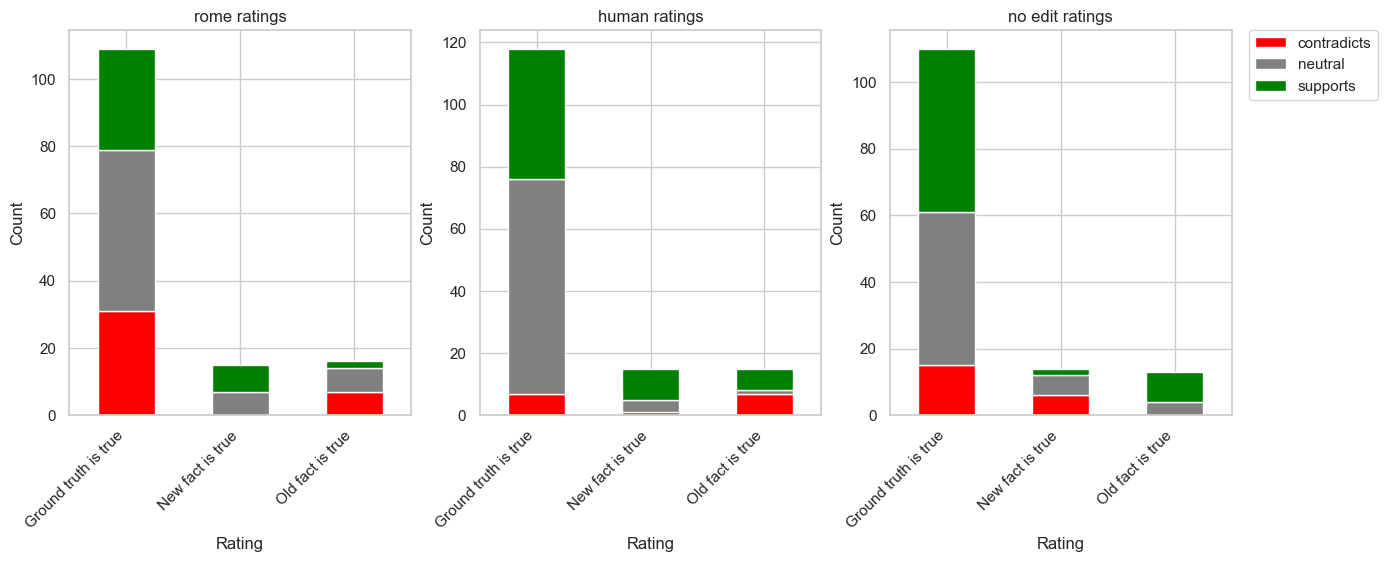

In [40]:
# bar graph of rating per class per method
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# create three subplots for each method on one plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, method in enumerate(annos_df['method'].unique()):
    ax = annos_df.loc[
        annos_df['method'] == method
    ].pivot_table(
        index=['question_type'],
        columns=['classification'],
        values='rater',
        aggfunc='count'
    ).plot(
        kind='bar',
        ax=axs[i],
        stacked=True,
        color=[
            'red', 'grey', 'green'
        ]
    )
    ax.set_title(f"{method.replace('_', ' ')} ratings")
    ax.set_xlabel('Rating')
    ax.set_ylabel('Count')
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    # move legend outside of plot

    # delete other legends
    if i < 2:
        ax.get_legend().remove()
    else:
        ax.legend(
            bbox_to_anchor=(1.05, 1),
            loc='upper left',
            borderaxespad=0.
        )

In [41]:
def row_wise_normalise(df):
    return df.div(df.sum(axis=1), axis=0)


count_df = annos_df.pivot_table(
    index=['method', 'question_type'],
    columns=['classification'],
    values='rater',
    aggfunc='count'
)

count_df = row_wise_normalise(count_df)
(count_df.fillna(0).round(2) * 100).round(0).astype(str) + '%'

classification               contradicts neutral supports
method  question_type                                    
human   Ground truth is true        6.0%   58.0%    36.0%
        New fact is true            7.0%   27.0%    67.0%
        Old fact is true           47.0%    7.0%    47.0%
no_edit Ground truth is true       14.0%   42.0%    45.0%
        New fact is true           43.0%   43.0%    14.0%
        Old fact is true            0.0%   31.0%    69.0%
rome    Ground truth is true       28.0%   44.0%    28.0%
        New fact is true            0.0%   47.0%    53.0%
        Old fact is true           44.0%   44.0%    12.0%

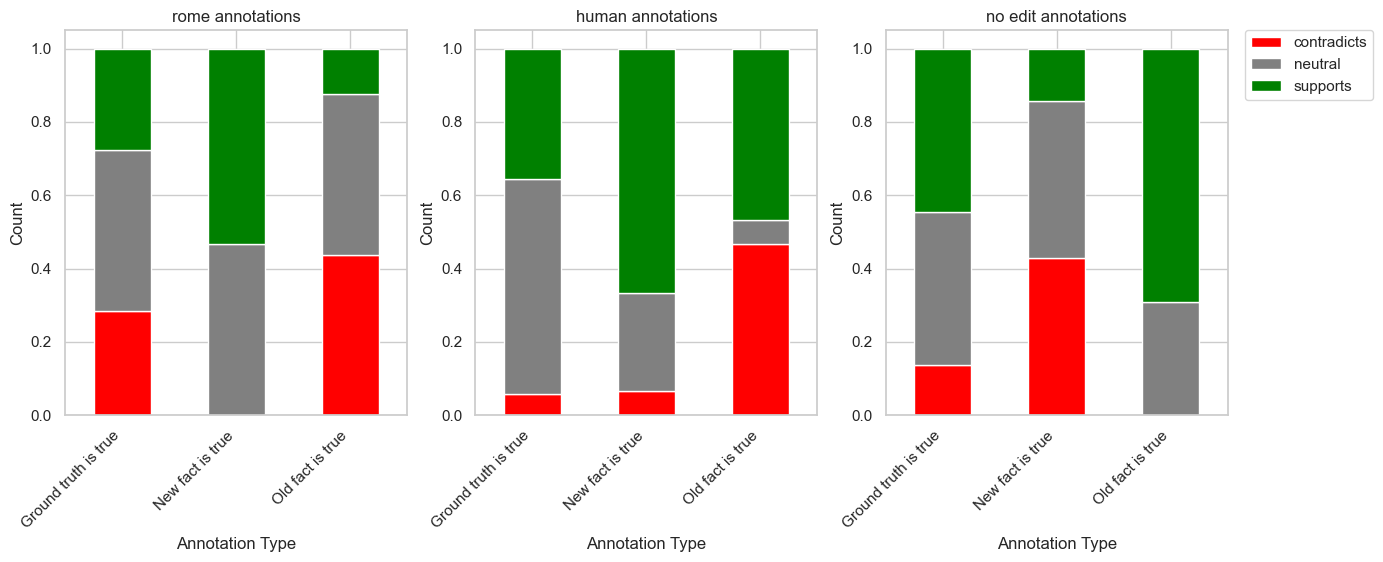

In [42]:
# bar graph of rating per class per method that is proportional
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# create three subplots for each method on one plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, method in enumerate(annos_df['method'].unique()):
    tmp_df = annos_df.loc[
        annos_df['method'] == method
    ].pivot_table(
        index=['question_type'],
        columns=['classification'],
        values='rater',
        aggfunc='count'
    )
    ax = row_wise_normalise(tmp_df).plot(
        kind='bar',
        ax=axs[i],
        stacked=True,
        color=[
            'red', 'grey', 'green'
        ]
    )
    ax.set_title(f"{method.replace('_', ' ')} annotations")
    ax.set_xlabel('Annotation Type')
    ax.set_ylabel('Count')
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    if i < 2:
        ax.get_legend().remove()
    else:
        ax.legend(
            bbox_to_anchor=(1.05, 1),
            loc='upper left',
            borderaxespad=0.
        )

# save plot
fig = ax.get_figure()
fig.savefig('../results/annotation_results.png',
            dpi=300, bbox_inches='tight')

In [43]:
# Characterize highlighted sentences by type and count
annos_df['highlighted_sentences_len'] = annos_df['highlighted_sentences'].apply(
    lambda x: len(x)
)
annos_df.pivot_table(
    index=['method', 'question_type'],
    columns=['classification'],
    values='highlighted_sentences_len',
    aggfunc='sum'
).round(2).fillna(0)[[
    'supports', 'contradicts'
]]

classification                supports  contradicts
method  question_type                              
human   Ground truth is true      94.0         15.0
        New fact is true          25.0          3.0
        Old fact is true          17.0         14.0
no_edit Ground truth is true     104.0         29.0
        New fact is true          10.0         15.0
        Old fact is true          17.0          0.0
rome    Ground truth is true      66.0         64.0
        New fact is true          33.0          0.0
        Old fact is true           4.0         20.0

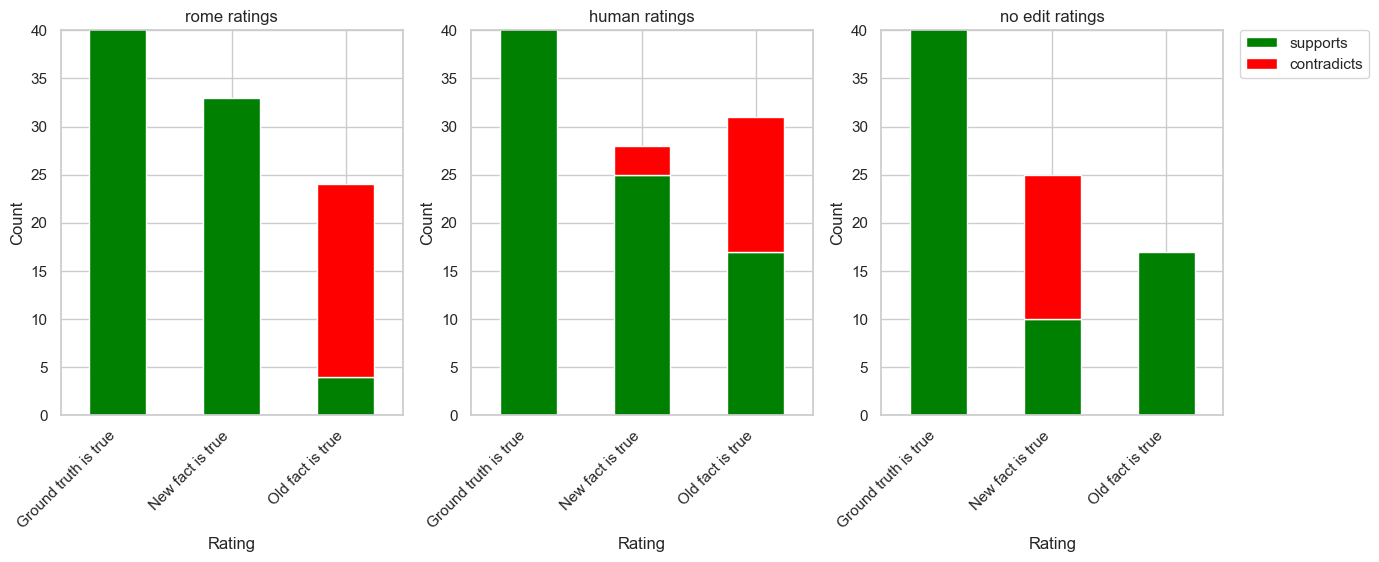

In [44]:
# bar graph of rating per class per method that is proportional
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# create three subplots for each method on one plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, method in enumerate(annos_df['method'].unique()):
    tmp_df = annos_df.loc[
        annos_df['method'] == method
    ].pivot_table(
        index=['question_type'],
        columns=['classification'],
        values='highlighted_sentences_len',
        aggfunc='sum'
    )[[
        'supports', 'contradicts'
    ]]

    ax = tmp_df.plot(
        kind='bar',
        ax=axs[i],
        stacked=True,
        color=[
            'green', 'red'
        ]
    )
    ax.set_title(f"{method.replace('_', ' ')} ratings")
    ax.set_xlabel('Rating')
    ax.set_ylabel('Count')
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    # set y axis to be range 0 to 40
    ax.set_ylim([0, 40])
    if i < 2:
        ax.get_legend().remove()
    else:
        ax.legend(
            bbox_to_anchor=(1.05, 1),
            loc='upper left',
            borderaxespad=0.
        )

In [45]:
row_wise_normalise(annos_df.pivot_table(
    index=['method', 'question_type'],
    columns=['classification'],
    values='highlighted_sentences_len',
    aggfunc='sum'
).round(2).fillna(0))[
    ['supports', 'contradicts']
]

classification                supports  contradicts
method  question_type                              
human   Ground truth is true  0.764228     0.121951
        New fact is true      0.781250     0.093750
        Old fact is true      0.515152     0.424242
no_edit Ground truth is true  0.693333     0.193333
        New fact is true      0.370370     0.555556
        Old fact is true      0.894737     0.000000
rome    Ground truth is true  0.458333     0.444444
        New fact is true      0.868421     0.000000
        Old fact is true      0.142857     0.714286

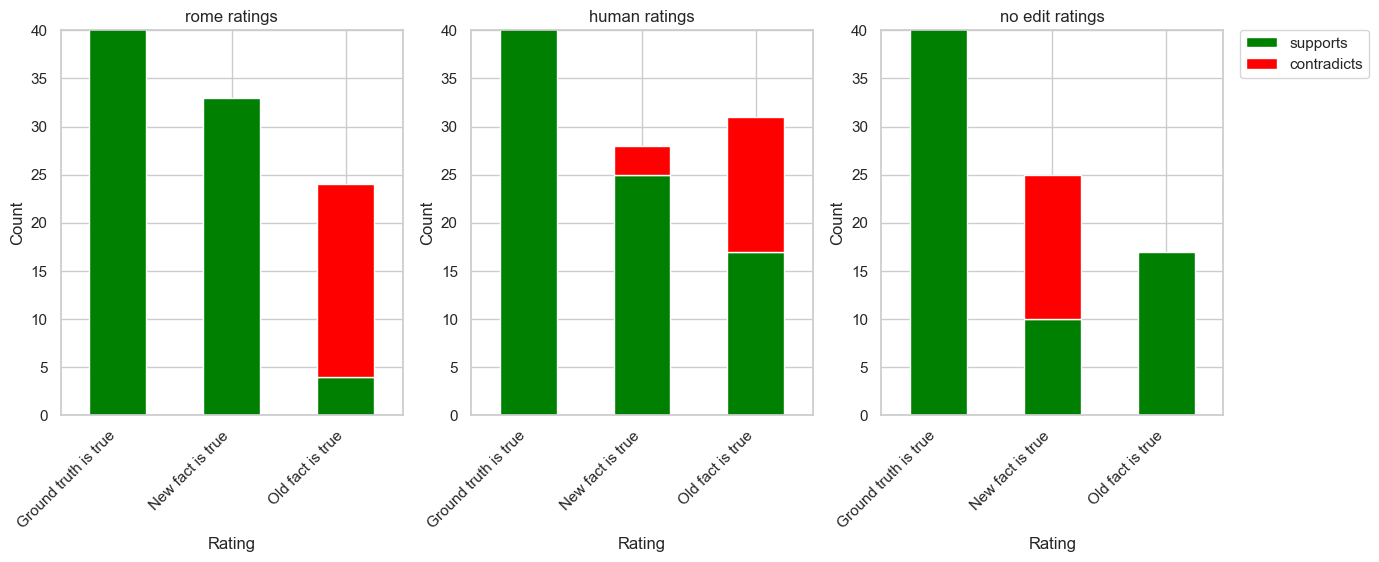

In [46]:
# bar graph of rating per class per method that is proportional
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# create three subplots for each method on one plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, method in enumerate(annos_df['method'].unique()):
    tmp_df = annos_df.loc[
        annos_df['method'] == method
    ].pivot_table(
        index=['question_type'],
        columns=['classification'],
        values='highlighted_sentences_len',
        aggfunc='sum'
    )[[
        'supports', 'contradicts'
    ]]

    ax = tmp_df.plot(
        kind='bar',
        ax=axs[i],
        stacked=True,
        color=[
            'green', 'red'
        ]
    )
    ax.set_title(f"{method.replace('_', ' ')} ratings")
    ax.set_xlabel('Rating')
    ax.set_ylabel('Count')
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    # set y axis to be range 0 to 40
    ax.set_ylim([0, 40])
    if i < 2:
        ax.get_legend().remove()
    else:
        ax.legend(
            bbox_to_anchor=(1.05, 1),
            loc='upper left',
            borderaxespad=0.
        )

### Inter rater reliability


In [47]:
# cohens kappa
# this will only apply to the sample test unless we do two raters
import krippendorff as kd
from sklearn.metrics import cohen_kappa_score

ck = cohen_kappa_score(
    raters[1],
    raters[2]
)

# change to numbers for krippendorff
rater_1 = [rating_to_number[r] for r in raters[1]]
rater_2 = [rating_to_number[r] for r in raters[2]]
k = kd.alpha([
    rater_1,
    rater_2
])

print(f"""
Coehn's Kappa: {ck}
Krippendorff's Alpha: {k}  
""")


Coehn's Kappa: 0.23832196232568503
Krippendorff's Alpha: 0.3605162468232338  



In [48]:
# calculate agreement between rater_1 and rater_2
from sklearn.metrics import accuracy_score
accuracy_score(rater_1, rater_2)

0.45176470588235296

### Statistical significance


In [49]:
import numpy as np
from scipy.stats import chi2_contingency

# Sample predicted labels for two machine learning systems
for method_1 in annos_df.method.unique():
    for method_2 in annos_df.method.unique():
        if method_1 == method_2:
            continue
        for question_type in annos_df.question_type.unique():
            system1_labels = annos_df.loc[
                (annos_df['method'] == method_1) & (
                    annos_df['question_type'] == question_type)
            ]['classification'].values
            system1_labels = [
                rating_to_number[anno] for anno in system1_labels
            ]
            system2_labels = annos_df.loc[
                (annos_df['method'] == method_2) & (
                    annos_df['question_type'] == question_type)
            ]['classification'].values
            system2_labels = [
                rating_to_number[anno] for anno in system2_labels
            ]

            # Create a contingency table
            contingency_table = np.array(
                [np.bincount(system1_labels), np.bincount(system2_labels)])

            # Perform the Chi-squared test
            chi2, p, _, _ = chi2_contingency(contingency_table)

            # Output the results

            # Compare the p-values to a significance level (e.g., 0.05)
            alpha = 0.05
            if p < alpha:
                print(
                    f"Results for {method_1} and {method_2} for {question_type}")
                # print(f"Chi-squared statistic: {chi2}")
                # print(f"P-value for Chi-squared test: {p}")
                # print(
                #     "Chi-squared test indicates a significant difference between the systems.")

Results for rome and human for Old fact is true
Results for rome and human for Ground truth is true
Results for rome and no_edit for New fact is true
Results for rome and no_edit for Old fact is true
Results for rome and no_edit for Ground truth is true
Results for human and rome for Old fact is true
Results for human and rome for Ground truth is true
Results for human and no_edit for New fact is true
Results for human and no_edit for Old fact is true
Results for human and no_edit for Ground truth is true
Results for no_edit and rome for New fact is true
Results for no_edit and rome for Old fact is true
Results for no_edit and rome for Ground truth is true
Results for no_edit and human for New fact is true
Results for no_edit and human for Old fact is true
Results for no_edit and human for Ground truth is true


## Convergent Measures Analysis

Between survey and annotation
Count of annotations and survey score correlations


In [50]:

# hve to think through merging on sample_id and question

responses_df.question.unique()

survey_q_to_anno_q = {
    # I should also try old_fact_and
    'The main passage is written as if the new fact is true': 'new_fact_and_main_passage',
    'The related passage does not contradict the new fact': 'new_fact_and_related_passage',
    'Ignoring the new fact, most of the old facts are still true in the main passage.': 'ground_truth_and_main_passage',
    'Ignoring the new fact, most of the old facts are still true in the related passage.': 'ground_truth_and_related_passage',
}
anno_q_to_survey_q = {
    v: k for k, v in survey_q_to_anno_q.items()
}
responses_filtered_df = responses_df.loc[
    responses_df['question'].isin(
        list(survey_q_to_anno_q.keys())
    )
]
responses_filtered_df['anno_question'] = responses_filtered_df['question'].apply(
    lambda x: survey_q_to_anno_q[x]
)
annos_rename = annos_df.rename(columns={'label': 'anno_question'})
# merge on sample_id, method and question
merged_df = pd.merge(
    responses_filtered_df,
    annos_rename,
    on=['sample_id', 'method', 'anno_question'],
)
merged_df.dropna(subset=['classification'], inplace=True)
merged_df['highlighted_sentences_len'] = merged_df['highlighted_sentences'].apply(
    lambda x: len(x)
)
rating_to_number = {
    'supports': 3,
    'neutral': 2,
    'contradicts': 1
}
merged_df['classification'] = merged_df.apply(
    # * (x['highlighted_sentences_len'] + 1), multiplier for highlighted sentences
    lambda x: rating_to_number[x['classification']],
    axis=1
)
merged_df['support'] = merged_df['classification'].apply(
    lambda x: 1 if x == 2 else 0
)
merged_df['contradict'] = merged_df['classification'].apply(
    lambda x: 1 if x == -1 else 0
)
merged_df['neutral'] = merged_df['classification'].apply(
    lambda x: 1 if x == 1 else 0
)



In [51]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

# fit ordinal model
model = OrderedModel(
    merged_df['response'], merged_df['classification'],
    distr='logit'
)
result = model.fit(method='bfgs', disp=False)
print(result.summary())


                             OrderedModel Results                             
Dep. Variable:               response   Log-Likelihood:                -1235.1
Model:                   OrderedModel   AIC:                             2484.
Method:            Maximum Likelihood   BIC:                             2517.
Date:                Thu, 09 Nov 2023                                         
Time:                        09:03:50                                         
No. Observations:                 762                                         
Df Residuals:                     755                                         
Df Model:                           1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
classification     0.1472      0.096      1.532      0.126      -0.041       0.336
1/2               -2.6237      0.268    

In [52]:
preds = [np.argmax(x) for x in result.predict()]
preds

[5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,


SignificanceResult(statistic=0.04725787262795527, pvalue=0.12941423174787928)
Edit consistency
SignificanceResult(statistic=0.25084598773387595, pvalue=0.006918489868950537)
Factual consistency
SignificanceResult(statistic=0.0042974094816352355, pvalue=0.8970389939842045)
rome
SignificanceResult(statistic=0.03371373986866554, pvalue=0.5387831150397011)
no_edit
SignificanceResult(statistic=0.021233677583844937, pvalue=0.7010799652094952)
human
SignificanceResult(statistic=0.09250462744988207, pvalue=0.09859877146158902)
Edit consistency rome
SignificanceResult(statistic=0.02741748006397414, pvalue=0.876031412352407)
Edit consistency no_edit
SignificanceResult(statistic=0.2877772315344771, pvalue=0.0778120851070316)
Edit consistency human
SignificanceResult(statistic=-0.2969569354582493, pvalue=0.10096923281765587)
Factual consistency rome
SignificanceResult(statistic=-0.014502263281119102, pvalue=0.8055232209048337)
Factual consistency no_edit
SignificanceResult(statistic=-0.03061054896

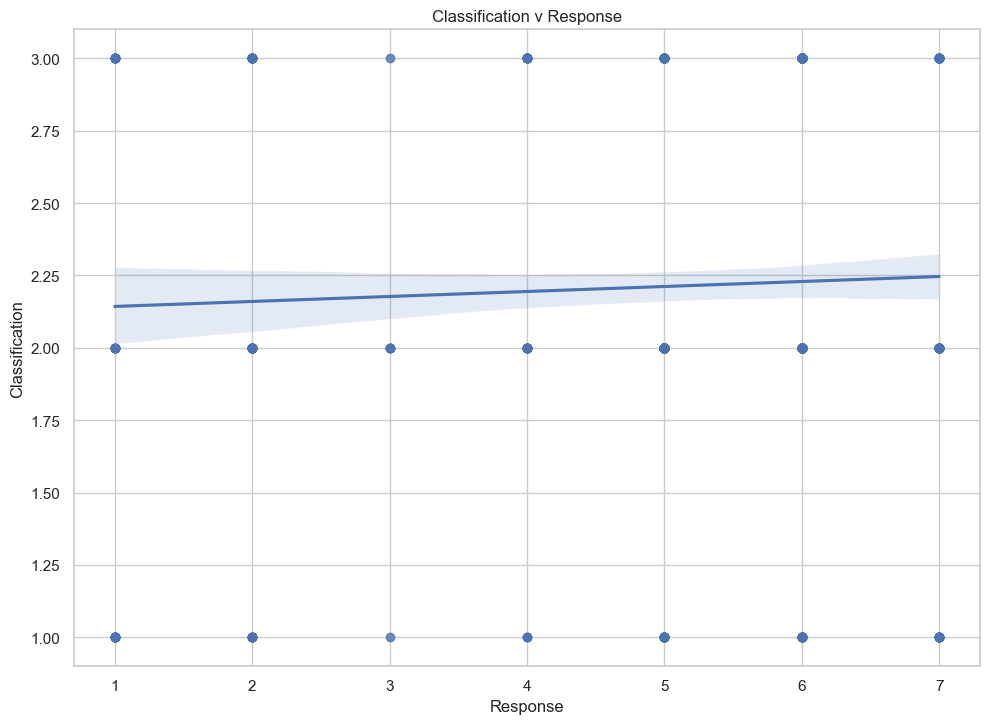

In [53]:
# scatter plot on classification v response
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_theme(style="whitegrid")

# increase size of plot
ax = sns.regplot(x=merged_df['response'], y=merged_df['classification'])
ax.set_title('Classification v Response')
ax.set_ylabel('Classification')
ax.set_xlabel('Response')


# kendall tau
print(
    stats.kendalltau(merged_df['response'], merged_df['classification'])
)

for question_type in merged_df.question_type_x.unique():
    print(question_type)
    print(stats.kendalltau(merged_df.loc[merged_df['question_type_x'] == question_type]
          ['response'], merged_df.loc[merged_df['question_type_x'] == question_type]['classification']))

for method in merged_df.method.unique():
    print(method)
    print(stats.kendalltau(merged_df.loc[merged_df['method'] == method]
          ['response'], merged_df.loc[merged_df['method'] == method]['classification']))

for question_type in merged_df.question_type_x.unique():
    for method in merged_df.method.unique():
        print(question_type, method)
        print(stats.kendalltau(merged_df.loc[(merged_df['question_type_x'] == question_type) & (merged_df['method'] == method)]['response'], merged_df.loc[(
            merged_df['question_type_x'] == question_type) & (merged_df['method'] == method)]['classification']))

# Human and Machine Data Analysis

Answer the question of how well the machine data correlates with the human data

Machine survey and human survey IAA
Machine annotation and human annotation IAA
Machine Survey and Machine Annotation Convergent Measures


## Machine Survey and Human Survey


In [54]:
label_to_question = {
    'new_fact_main_passage': 'The main passage is written as if the new fact is true',
    'new_fact_related_passage': 'The related passage does not contradict the new fact',
    'main_passage_old_facts': 'Ignoring the new fact, most of the old facts are still true in the main passage.',
    'related_passage_old_facts': 'Ignoring the new fact, most of the old facts are still true in the related passage.',
    'main_passage_consistency': 'Ignoring the old and new facts, the main passage does not contradict itself.',
    'related_passage_consistency': 'Ignoring the old and new facts, the related passage does not contradict itself.',
    'cross_passage_consistency': 'Ignoring the old and new facts, the main passage and the related passage do not contradict each other.',
    'topicality': 'The main passage is focused on the subject and the related passage is focused on the related entity',
    'fluency': 'Both passages are natural sounding text close to what a human would write.'
}
question_to_label = {
    v: k for k, v in label_to_question.items()
}

# open and correlate scores with GPT 3.5 results
rome = '../results/broken_out_survey_llama2_chat_rome_edit_pilot_survey_gpt-3.5-turbo-1106_shots_0.json'
no_edit = '../results/broken_out_survey_llama2_chat_no_edit_pilot_survey_gpt-3.5-turbo-1106_shots_0.json'
human = '../results/broken_out_survey_llama2_chat_human_edit_pilot_survey_gpt-3.5-turbo-1106_shots_0.json'

rome_8_shots = '../results/broken_out_survey_llama2_chat_rome_edit_pilot_survey_gpt-3.5-turbo-1106_shots_8.json'
no_edit_8_shots = '../results/broken_out_survey_llama2_chat_no_edit_pilot_survey_gpt-3.5-turbo-1106_shots_8.json'
human_8_shots = '../results/broken_out_survey_llama2_chat_human_edit_pilot_survey_gpt-3.5-turbo-1106_shots_8.json'


gpt35_survey_dfs = []
for results, method in [(human, 'human'), (rome, 'rome'), (no_edit, 'no_edit')]:
    with open(results, 'r') as f:
        data = json.load(f)
        for sample_id, sample in data.items():
            if sample_id not in responses_df.sample_id.unique():
                continue
            for label, scores in sample.items():
                for score in scores:
                    gpt35_survey_dfs.append({
                        'method': method,
                        'question': label_to_question[label],
                        'response': score,
                        'question_type': question_types[label_to_question[label]],
                        'intervention': results.split('/')[-1].split('_')[3],
                        'model': 'gpt-3.5-turbo-1106',
                        'participant_id': 'gpt-3.5-turbo-1106',
                        'sample_id': sample_id
                    })
survey_df_gpt35 = pd.DataFrame(gpt35_survey_dfs)
# sort by sample_id, method, question
survey_df_gpt35.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)

gpt35_survey_dfs_8_shot = []
for results, method in [(human_8_shots, 'human'), (rome_8_shots, 'rome'), (no_edit_8_shots, 'no_edit')]:
    with open(results, 'r') as f:
        data = json.load(f)
        for sample_id, sample in data.items():
            if sample_id not in responses_df.sample_id.unique():
                continue
            for label, scores in sample.items():
                for score in scores:
                    gpt35_survey_dfs_8_shot.append({
                        'method': method,
                        'question': label_to_question[label],
                        'response': score,
                        'question_type': question_types[label_to_question[label]],
                        'intervention': results.split('/')[-1].split('_')[3],
                        'model': 'gpt-3.5-turbo-1106',
                        'participant_id': 'gpt-3.5-turbo-1106',
                        'sample_id': sample_id
                    })
survey_df_gpt35_8_shot = pd.DataFrame(gpt35_survey_dfs_8_shot)
# sort by sample_id, method, question
survey_df_gpt35_8_shot.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)

# open and correlate scores with GPT 4 results
rome = '../results/broken_out_survey_llama2_chat_rome_edit_pilot_survey_gpt-4.json'
no_edit = '../results/broken_out_survey_llama2_chat_no_edit_pilot_survey_gpt-4.json'
human = '../results/broken_out_survey_llama2_chat_human_edit_pilot_survey_gpt-4.json'

rome_8_shot = '../results/broken_out_survey_llama2_chat_rome_edit_pilot_survey_gpt-4_shots_8.json'
no_edit_8_shot = '../results/broken_out_survey_llama2_chat_no_edit_pilot_survey_gpt-4_shots_8.json'
human_8_shot = '../results/broken_out_survey_llama2_chat_human_edit_pilot_survey_gpt-4_shots_8.json'

gpt4_survey_dfs = []
for results, method in [(human, 'human'), (rome, 'rome'), (no_edit, 'no_edit')]:
    with open(results, 'r') as f:
        data = json.load(f)
        for sample_id, sample in data.items():
            if sample_id not in responses_df.sample_id.unique():
                continue
            for label, scores in sample.items():
                for score in scores:
                    gpt4_survey_dfs.append({
                        'method': method,
                        'question': label_to_question[label],
                        'question_type': question_types[label_to_question[label]],
                        'response': score,
                        'intervention': results.split('/')[-1].split('_')[3],
                        'model': 'gpt-4',
                        'participant_id': 'gpt-4',
                        'sample_id': sample_id
                    })
survey_df_gpt4 = pd.DataFrame(gpt4_survey_dfs)
# sort by sample_id, method, question
survey_df_gpt4.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)

gpt4_survey_dfs_8_shot = []
for results, method in [(human_8_shot, 'human'), (rome_8_shot, 'rome'), (no_edit_8_shot, 'no_edit')]:
    with open(results, 'r') as f:
        data = json.load(f)
        for sample_id, sample in data.items():
            if sample_id not in responses_df.sample_id.unique():
                continue
            for label, scores in sample.items():
                for score in scores:
                    gpt4_survey_dfs_8_shot.append({
                        'method': method,
                        'question': label_to_question[label],
                        'question_type': question_types[label_to_question[label]],
                        'response': score,
                        'intervention': results.split('/')[-1].split('_')[3],
                        'model': 'gpt-4',
                        'participant_id': 'gpt-4',
                        'sample_id': sample_id
                    })

survey_df_gpt4_8_shot = pd.DataFrame(gpt4_survey_dfs_8_shot)
# sort by sample_id, method, question
survey_df_gpt4_8_shot.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)

# open and correlate scores with Llama2 results
rome = '../results/broken_out_survey_llama2_chat_rome_edit_pilot_survey_meta-llama_Llama-2-7b-chat-hf_shots_0.json'
no_edit = '../results/broken_out_survey_llama2_chat_no_edit_pilot_survey_meta-llama_Llama-2-7b-chat-hf_shots_0.json'
human = '../results/broken_out_survey_llama2_chat_human_edit_pilot_survey_meta-llama_Llama-2-7b-chat-hf_shots_0.json'

rome_8_shot = '../results/broken_out_survey_llama2_chat_rome_edit_pilot_survey_meta-llama_Llama-2-7b-chat-hf_shots_8.json'
no_edit_8_shot = '../results/broken_out_survey_llama2_chat_no_edit_pilot_survey_meta-llama_Llama-2-7b-chat-hf_shots_8.json'
human_8_shot = '../results/broken_out_survey_llama2_chat_human_edit_pilot_survey_meta-llama_Llama-2-7b-chat-hf_shots_8.json'

llama2_survey_dfs = []
for results, method in [(human, 'human'), (rome, 'rome'), (no_edit, 'no_edit')]:
    with open(results, 'r') as f:
        data = json.load(f)
        for sample_id, sample in data.items():
            if sample_id not in responses_df.sample_id.unique():
                continue
            for label, scores in sample.items():
                for score in scores:
                    llama2_survey_dfs.append({
                        'method': method,
                        'question': label_to_question[label],
                        'question_type': question_types[label_to_question[label]],
                        'response': score,
                        'intervention': results.split('/')[-1].split('_')[3],
                        'model': 'gpt-4',
                        'participant_id': 'gpt-4',
                        'sample_id': sample_id
                    })
survey_df_llama2 = pd.DataFrame(llama2_survey_dfs)
# sort by sample_id, method, question
survey_df_llama2.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)

llama2_survey_dfs_8_shot = []
for results, method in [(human_8_shot, 'human'), (rome_8_shot, 'rome'), (no_edit_8_shot, 'no_edit')]:
    with open(results, 'r') as f:
        data = json.load(f)
        for sample_id, sample in data.items():
            if sample_id not in responses_df.sample_id.unique():
                continue
            for label, scores in sample.items():
                for score in scores:
                    llama2_survey_dfs_8_shot.append({
                        'method': method,
                        'question': label_to_question[label],
                        'question_type': question_types[label_to_question[label]],
                        'response': score,
                        'intervention': results.split('/')[-1].split('_')[3],
                        'model': 'gpt-4',
                        'participant_id': 'gpt-4',
                        'sample_id': sample_id
                    })

survey_df_llama2_8_shot = pd.DataFrame(llama2_survey_dfs_8_shot)
# sort by sample_id, method, question
survey_df_llama2_8_shot.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)

### Characterization of data collected


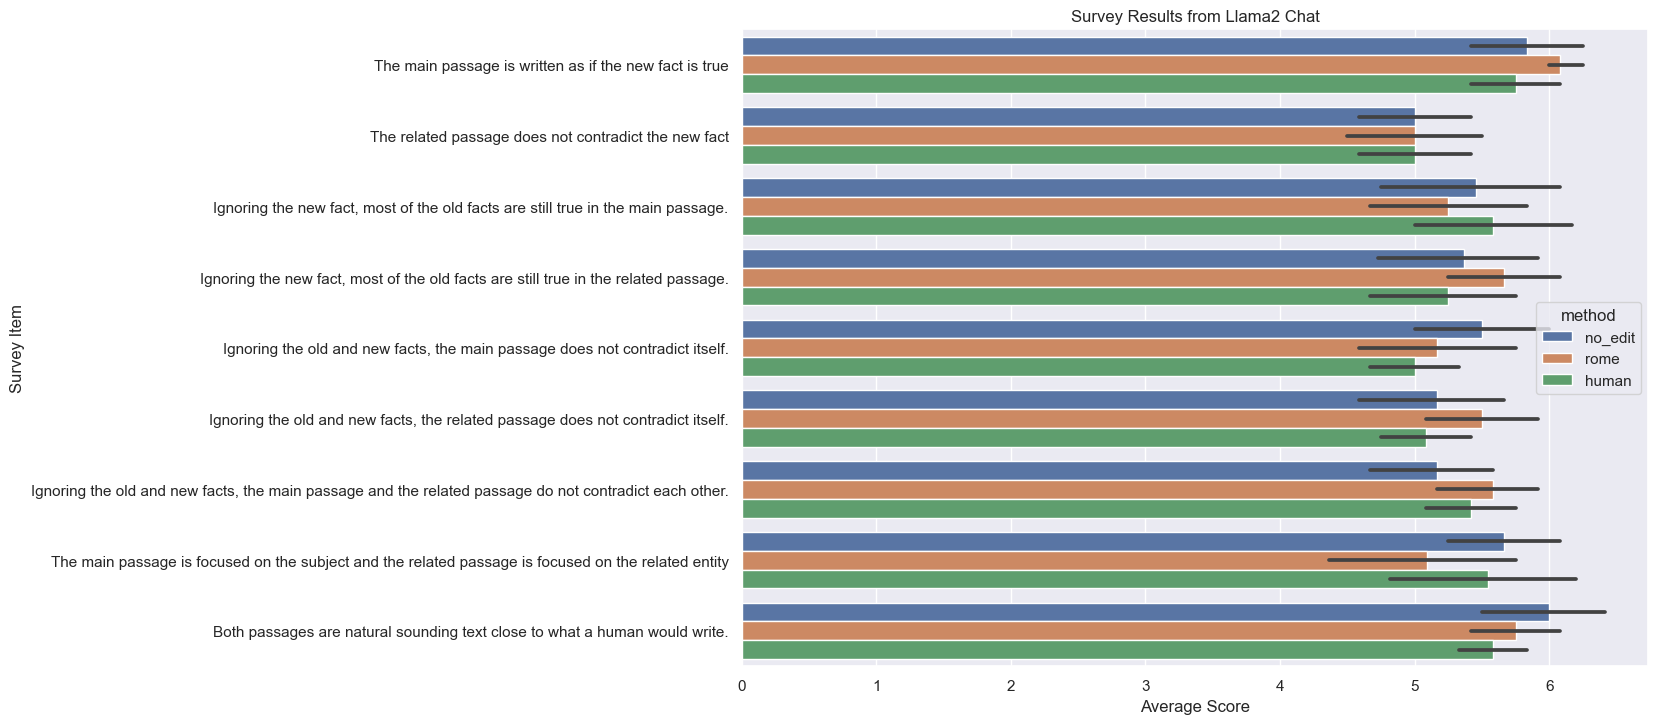

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# increase size of plot
sns.set(rc={'figure.figsize': (11.7, 8.27)})
ax = sns.barplot(x='response', y='question', hue='method', data=survey_df_llama2,
                 orient='h', order=question_order, hue_order=method_order)
ax.set_title('Survey Results from Llama2 Chat')
ax.set_ylabel('Survey Item')
ax.set_xlabel('Average Score')

# save plot
fig = ax.get_figure()
fig.savefig('../results/survey_llama2_chat_0_shot_results_pilot.png',
            dpi=300, bbox_inches='tight')

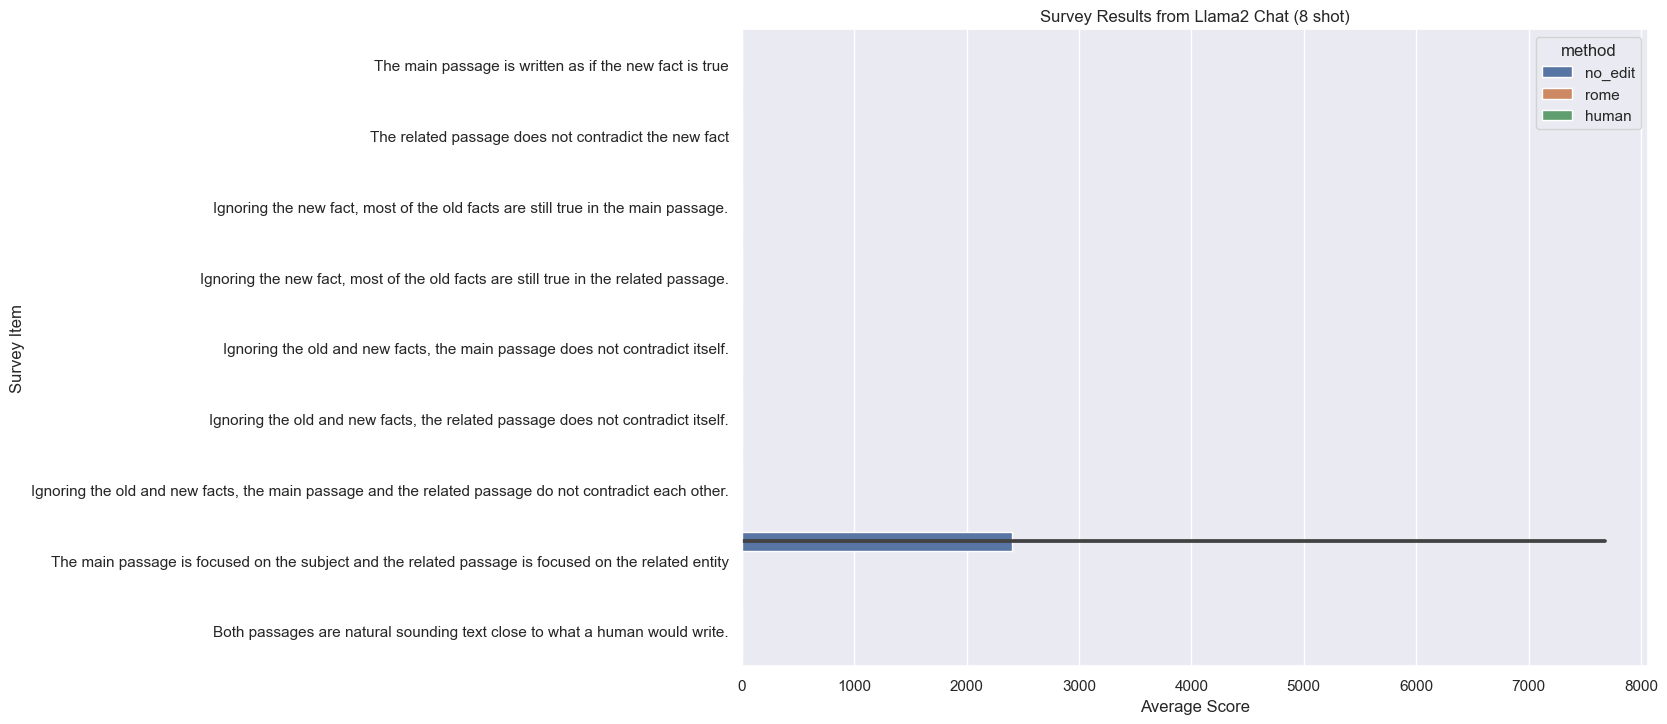

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# increase size of plot
sns.set(rc={'figure.figsize': (11.7, 8.27)})
ax = sns.barplot(x='response', y='question', hue='method', data=survey_df_llama2_8_shot,
                 orient='h', order=question_order, hue_order=method_order)
ax.set_title('Survey Results from Llama2 Chat (8 shot)')
ax.set_ylabel('Survey Item')
ax.set_xlabel('Average Score')

# save plot
fig = ax.get_figure()
fig.savefig('../results/survey_llama2_chat_8_shot_results_pilot.png',
            dpi=300, bbox_inches='tight')

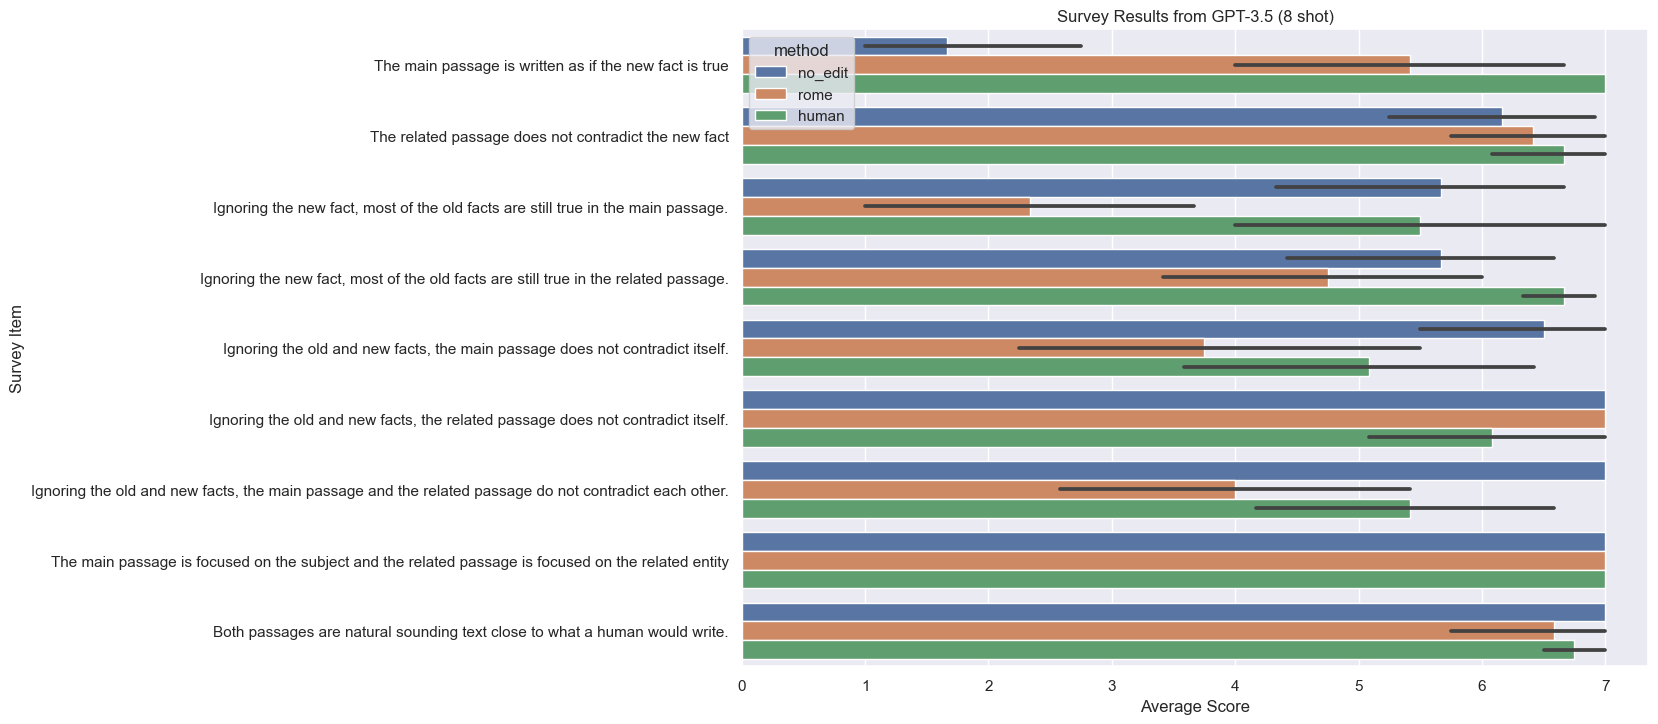

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# increase size of plot
sns.set(rc={'figure.figsize': (11.7, 8.27)})
ax = sns.barplot(x='response', y='question', hue='method', data=survey_df_gpt35,
                 orient='h', order=question_order, hue_order=method_order)
ax.set_title('Survey Results from GPT-3.5 (8 shot)')
ax.set_ylabel('Survey Item')
ax.set_xlabel('Average Score')

# save plot
fig = ax.get_figure()
fig.savefig('../results/survey_gpt35_8_shot_results_pilot.png',
            dpi=300, bbox_inches='tight')

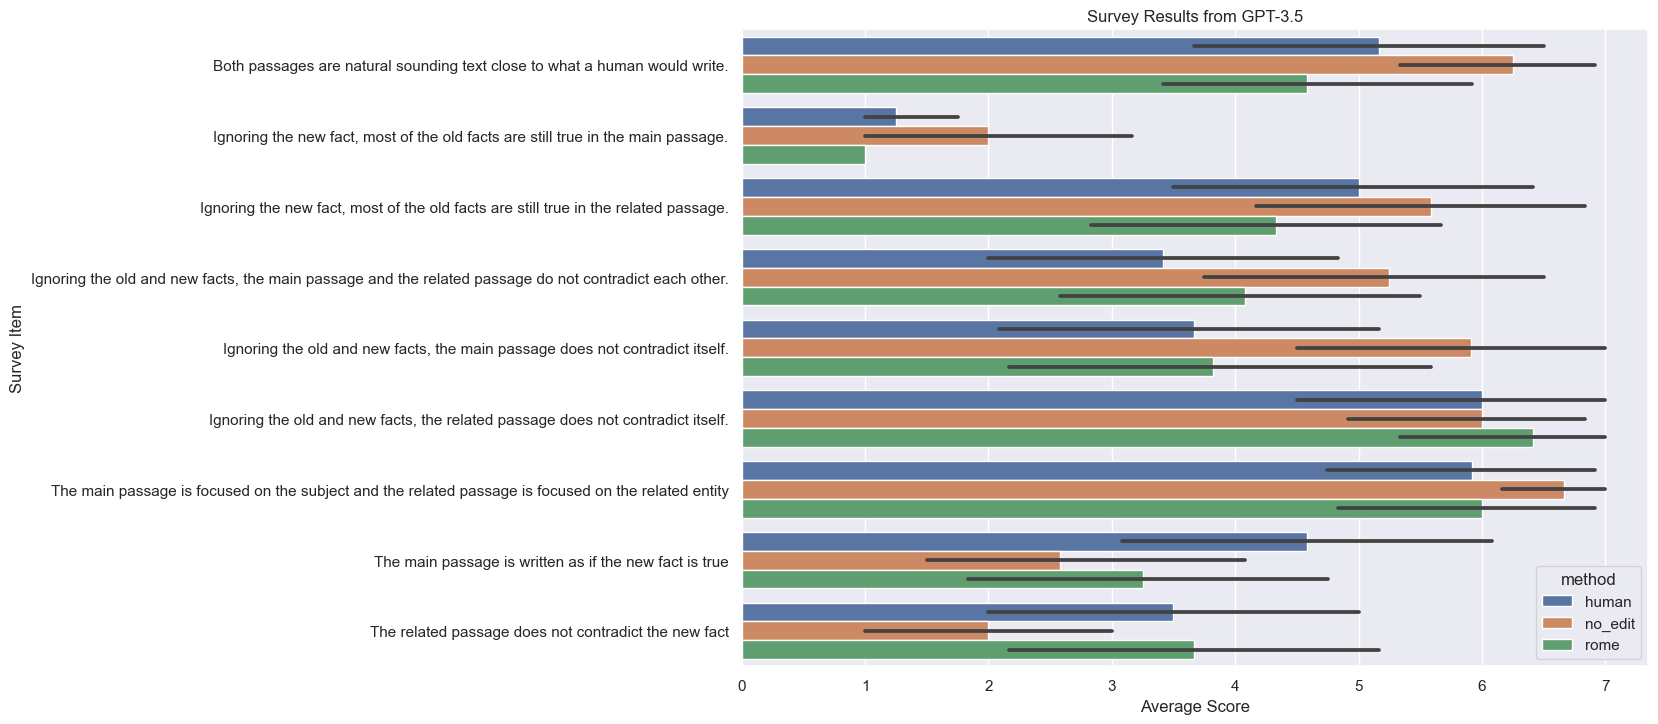

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# increase size of plot
sns.set(rc={'figure.figsize': (11.7, 8.27)})
ax = sns.barplot(x='response', y='question', hue='method',
                 data=survey_df_gpt35_8_shot, orient='h')
ax.set_title('Survey Results from GPT-3.5')
ax.set_ylabel('Survey Item')
ax.set_xlabel('Average Score')

# save plot
fig = ax.get_figure()
fig.savefig('../results/survey_gpt35_results_pilot.png',
            dpi=300, bbox_inches='tight')

In [59]:
import numpy as np
from scipy.stats import iqr
# get median and iqr
pvt = survey_df_gpt35.pivot_table(index=['question_type'], columns=[
                                  'method'], values='response', aggfunc=[np.mean, np.std])

pvt = pvt.round(1).astype(str)
pvt = pvt['mean'] + '±' + pvt['std']
pvt.to_csv('../results/survey_gpt35_results_table_question_type.csv')
pvt

method,human,no_edit,rome
question_type,,,
Cross passage consistency,5.4±2.4,7.0±0.0,4.0±2.7
Edit consistency,6.8±0.6,3.9±2.8,5.9±2.0
Factual consistency,6.1±2.0,5.7±2.0,3.5±2.7
Internal consistency,5.6±2.3,6.8±1.2,5.4±2.6
Naturalness,6.8±0.5,7.0±0.0,6.6±1.4
Topicality,7.0±0.0,7.0±0.0,7.0±0.0


In [60]:
import numpy as np
from scipy.stats import iqr
# get median and iqr
pvt = survey_df_llama2_8_shot.pivot_table(index=['question_type'], columns=[
                                  'method'], values='response', aggfunc=[np.mean, np.std])
pvt2 = responses_df.pivot_table(index=['question_type'], columns=[
                                'method'], values='response', aggfunc=[np.mean, np.std])
pvt = pvt.round(1)
pvt = pvt['mean'] - pvt2['mean']
pvt['total_diff'] = pvt.sum(axis=1)
pvt.round(1)

method,human,no_edit,rome,total_diff
question_type,,,,
Cross passage consistency,-0.5,-0.4,0.5,-0.4
Edit consistency,-0.8,1.4,0.9,1.5
Factual consistency,-1.0,0.0,1.7,0.7
Internal consistency,-1.2,0.1,0.3,-0.8
Naturalness,-1.0,0.3,0.6,-0.1
Topicality,-0.8,2399.0,-1.0,2397.3


In [61]:
print(pvt['total_diff'].sum().round(1))

2398.2


In [62]:
import numpy as np
from scipy.stats import iqr
# get median and iqr
pvt = survey_df_llama2.pivot_table(index=['question_type'], columns=[
                                  'method'], values='response', aggfunc=[np.mean, np.std])
pvt2 = responses_df.pivot_table(index=['question_type'], columns=[
                                'method'], values='response', aggfunc=[np.mean, np.std])
pvt = pvt.round(1)
pvt = pvt['mean'] - pvt2['mean']
pvt['total_diff'] = pvt.sum(axis=1)
pvt.round(1)

method,human,no_edit,rome,total_diff
question_type,,,,
Cross passage consistency,-0.9,-0.1,1.4,0.4
Edit consistency,-0.8,1.9,0.6,1.6
Factual consistency,-0.3,0.4,2.0,2.1
Internal consistency,-1.1,-0.2,0.1,-1.2
Naturalness,-0.8,0.3,1.6,1.1
Topicality,-0.7,0.1,-0.5,-1.0


In [63]:
print(pvt['total_diff'].sum().round(1))

3.0


In [64]:
import numpy as np
from scipy.stats import iqr
# get median and iqr
pvt = survey_df_gpt35.pivot_table(index=['question_type'], columns=[
                                  'method'], values='response', aggfunc=[np.mean, np.std])
pvt2 = responses_df.pivot_table(index=['question_type'], columns=[
                                'method'], values='response', aggfunc=[np.mean, np.std])
pvt = pvt.round(1)
pvt = pvt['mean'] - pvt2['mean']
pvt['total_diff'] = pvt.sum(axis=1)
pvt.round(1)

method,human,no_edit,rome,total_diff
question_type,,,,
Cross passage consistency,-0.9,1.7,-0.2,0.6
Edit consistency,0.5,0.4,1.0,1.9
Factual consistency,0.3,0.7,0.0,1.1
Internal consistency,-0.5,1.3,0.2,1.0
Naturalness,0.4,1.3,2.4,4.1
Topicality,0.8,1.4,1.4,3.7


In [65]:
print(pvt['total_diff'].sum().round(1))

12.4


In [66]:
import numpy as np
from scipy.stats import iqr
# get median and iqr
pvt = survey_df_gpt35_8_shot.pivot_table(index=['question_type'], columns=[
                                         'method'], values='response', aggfunc=[np.mean, np.std])
pvt2 = responses_df.pivot_table(index=['question_type'], columns=[
                                'method'], values='response', aggfunc=[np.mean, np.std])
pvt = pvt.round(1)
pvt = pvt['mean'] - pvt2['mean']
pvt['total_diff'] = pvt.sum(axis=1)
pvt.round(1)

method,human,no_edit,rome,total_diff
question_type,,,,
Cross passage consistency,-2.9,-0.1,-0.1,-3.1
Edit consistency,-2.2,-1.2,-1.4,-4.9
Factual consistency,-2.6,-1.2,-0.8,-4.6
Internal consistency,-1.3,0.5,-0.0,-0.8
Naturalness,-1.2,0.5,0.4,-0.3
Topicality,-0.3,1.1,0.4,1.3


In [67]:
print(pvt['total_diff'].sum().round(1))

-12.4


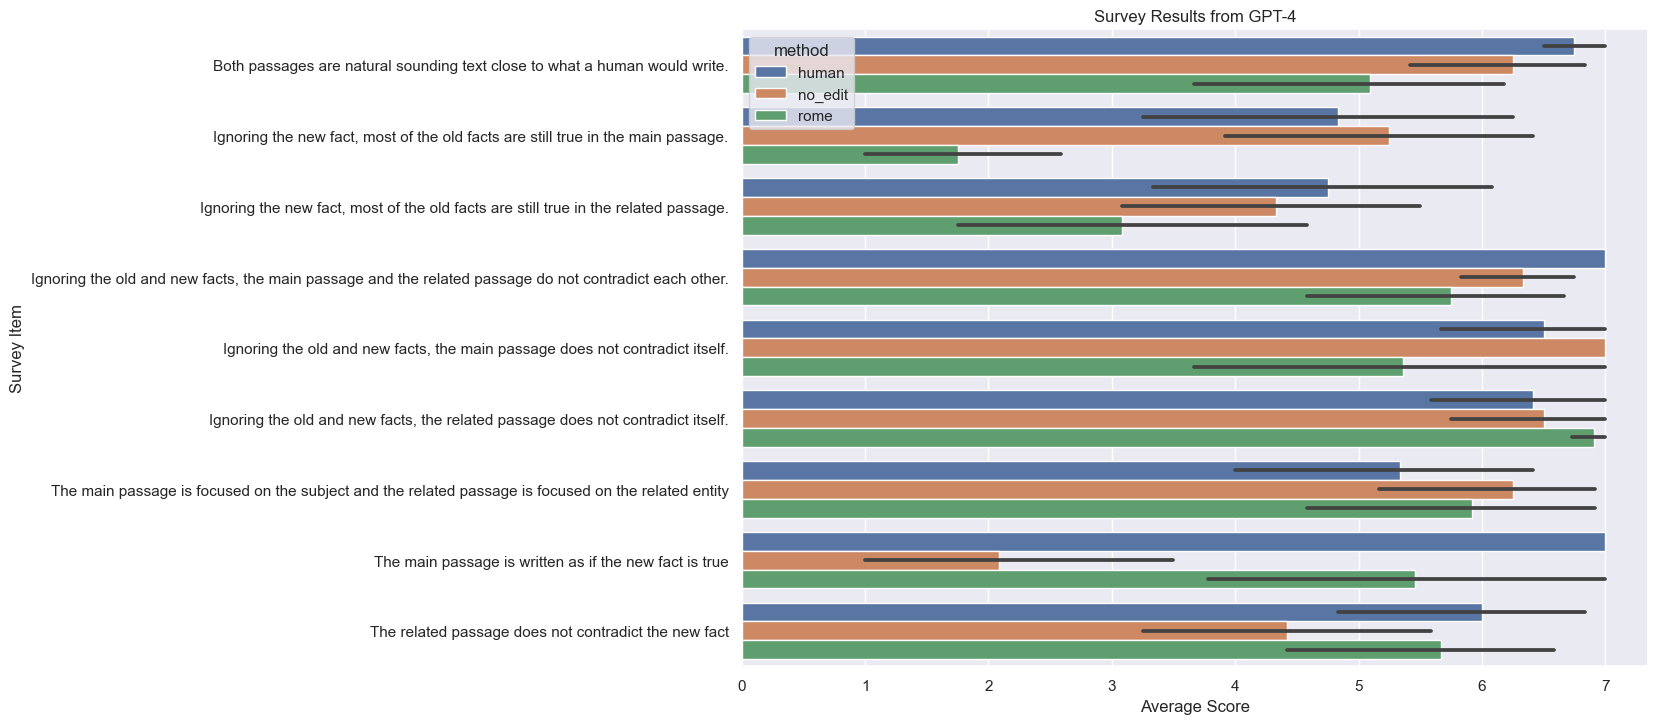

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# increase size of plot
sns.set(rc={'figure.figsize': (11.7, 8.27)})
ax = sns.barplot(x='response', y='question', hue='method',
                 data=survey_df_gpt4, orient='h')
ax.set_title('Survey Results from GPT-4')
ax.set_ylabel('Survey Item')
ax.set_xlabel('Average Score')

# save plot
fig = ax.get_figure()
fig.savefig('../results/survey_gpt4_results_pilot.png',
            dpi=300, bbox_inches='tight')

In [69]:
import numpy as np
from scipy.stats import iqr
# get median and iqr
pvt = survey_df_gpt4.pivot_table(index=['question_type'], columns=[
                                 'method'], values='response', aggfunc=[np.mean, np.std])
pvt2 = responses_df.pivot_table(index=['question_type'], columns=[
                                'method'], values='response', aggfunc=[np.mean, np.std])
pvt = pvt.round(1)
pvt = pvt['mean'] - pvt2['mean']
pvt['total_diff'] = pvt.sum(axis=1)
pvt.round(1)

method,human,no_edit,rome,total_diff
question_type,,,,
Cross passage consistency,0.7,1.0,1.6,3.3
Edit consistency,0.2,-0.3,0.7,0.6
Factual consistency,-1.0,-0.2,-1.1,-2.2
Internal consistency,0.4,1.3,0.9,2.6
Naturalness,0.4,0.5,0.9,1.8
Topicality,-0.9,0.6,0.3,0.1


In [70]:
print(pvt['total_diff'].sum().round(1))

6.2


In [71]:
import numpy as np
from scipy.stats import iqr
# get median and iqr
pvt = survey_df_gpt4_8_shot.pivot_table(index=['question_type'], columns=[
                                        'method'], values='response', aggfunc=[np.mean, np.std])
pvt2 = responses_df.pivot_table(index=['question_type'], columns=[
                                'method'], values='response', aggfunc=[np.mean, np.std])
pvt = pvt.round(1)
pvt = pvt['mean'] - pvt2['mean']
pvt['total_diff'] = pvt.sum(axis=1)
pvt.round(1)

method,human,no_edit,rome,total_diff
question_type,,,,
Cross passage consistency,-0.1,0.2,-0.0,0.1
Edit consistency,-0.0,-1.4,-0.4,-1.9
Factual consistency,-0.2,-0.8,-1.2,-2.1
Internal consistency,0.1,1.2,1.1,2.4
Naturalness,0.2,0.7,2.4,3.3
Topicality,0.2,1.4,-0.4,1.3


In [72]:
print(pvt['total_diff'].sum().round(1))

3.1


In [73]:
import numpy as np
from scipy.stats import iqr
# get median and iqr
pvt = survey_df_gpt4.pivot_table(index=['question_type'], columns=[
                                 'method'], values='response', aggfunc=[np.mean, np.std])

pvt = pvt.round(1).astype(str)
pvt = pvt['mean'] + '±' + pvt['std']
pvt.to_csv('../results/survey_gpt4_results_table_question_type.csv')
pvt

method,human,no_edit,rome
question_type,,,
Cross passage consistency,7.0±0.0,6.3±0.9,5.8±1.9
Edit consistency,6.5±1.4,3.2±2.5,5.6±2.3
Factual consistency,4.8±2.7,4.8±2.3,2.4±2.2
Internal consistency,6.5±1.4,6.8±0.8,6.1±2.1
Naturalness,6.8±0.5,6.2±1.4,5.1±2.3
Topicality,5.3±2.3,6.2±1.7,5.9±2.1


### Inter rater reliability


Text(0.5, 0, 'GPT 3.5')

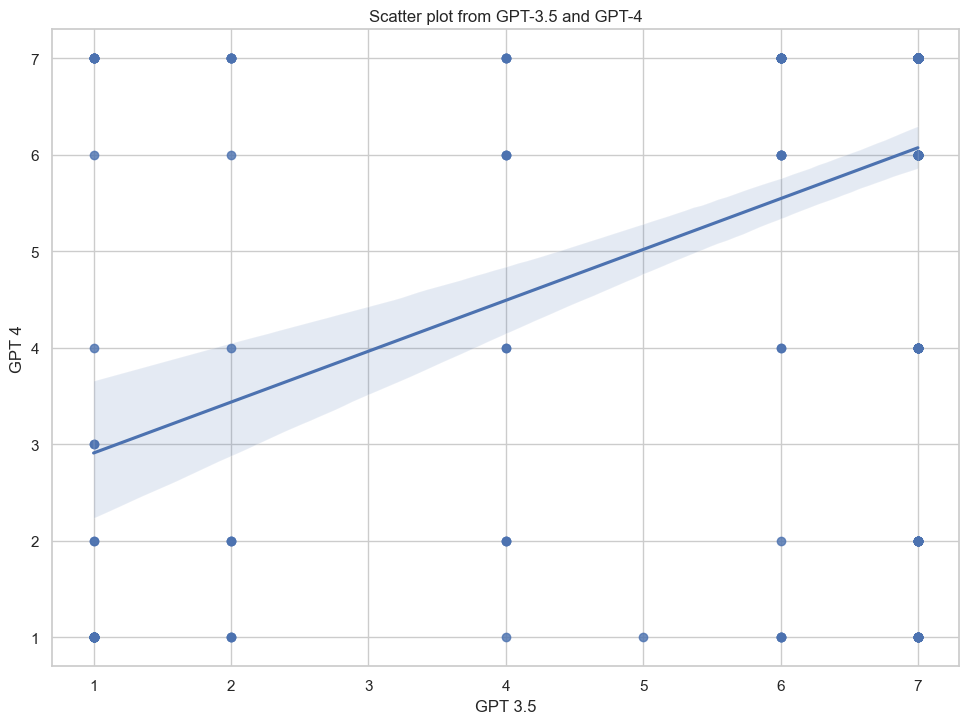

In [74]:
# scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# participants in order 1
order_1_responses = survey_df_gpt35['response'].fillna(4)
order_2_responses = survey_df_gpt4['response'].fillna(4)
# increase size of plot
ax = sns.regplot(x=list(order_1_responses), y=list(order_2_responses))
ax.set_title('Scatter plot from GPT-3.5 and GPT-4')
ax.set_ylabel('GPT 4')
ax.set_xlabel('GPT 3.5')

In [75]:
# kendall tau
import scipy.stats as stats
order_1_responses_tmp = survey_df_gpt35.loc[
    (survey_df_gpt35['method'] == method)
]['response'].fillna(4)
order_2_responses_tmp = survey_df_gpt4.loc[
    (survey_df_gpt4['method'] == method)
]['response'].fillna(4)
stats.kendalltau(order_1_responses_tmp, order_2_responses_tmp)

SignificanceResult(statistic=0.5016837786915448, pvalue=4.4380566537977074e-09)

In [76]:
for method in responses_df.method.unique():
    order_1_responses_tmp = survey_df_gpt35.loc[
        (survey_df_gpt35['method'] == method)
    ]['response'].fillna(4)
    order_2_responses_tmp = survey_df_gpt4.loc[
        (survey_df_gpt4['method'] == method)
    ]['response'].fillna(4)
    print(method)
    print(stats.kendalltau(order_1_responses_tmp, order_2_responses_tmp))

no_edit
SignificanceResult(statistic=0.5016837786915448, pvalue=4.4380566537977074e-09)
rome
SignificanceResult(statistic=0.4336824767689965, pvalue=2.2360264245681746e-07)
human
SignificanceResult(statistic=0.05098781827537788, pvalue=0.5649673754111577)


In [77]:
for question_type in responses_df.question_type.unique():
    order_1_responses_tmp = survey_df_gpt35.loc[
        (survey_df_gpt35['question_type'] == question_type)
    ]['response'].fillna(4)
    order_2_responses_tmp = survey_df_gpt4.loc[
        (survey_df_gpt4['question_type'] == question_type)
    ]['response'].fillna(4)
    print(question_type)
    print(stats.kendalltau(order_1_responses_tmp, order_2_responses_tmp))

Edit consistency
SignificanceResult(statistic=0.5858771719037947, pvalue=2.091461354160601e-08)
Factual consistency
SignificanceResult(statistic=0.4729590813004275, pvalue=2.659558457094455e-06)
Internal consistency
SignificanceResult(statistic=0.13320257941966382, pvalue=0.22963051130691525)
Cross passage consistency
SignificanceResult(statistic=0.26578292201733034, pvalue=0.08365192632309988)
Topicality
SignificanceResult(statistic=nan, pvalue=nan)
Naturalness
SignificanceResult(statistic=-0.15042186387142636, pvalue=0.34413167319646565)


In [78]:
for method in responses_df.method.unique():
    for question in responses_df.question.unique():
        order_1_responses_tmp = survey_df_gpt35.loc[
            (survey_df_gpt35['question'] == question) & (
                survey_df_gpt35['method'] == method)
        ]['response'].fillna(4)
        order_2_responses_tmp = survey_df_gpt4.loc[
            (survey_df_gpt4['question'] == question) & (
                survey_df_gpt4['method'] == method)
        ]['response'].fillna(4)
        print(method, question)
        print(stats.kendalltau(order_1_responses_tmp, order_2_responses_tmp))

no_edit The main passage is written as if the new fact is true
SignificanceResult(statistic=0.9655172413793104, pvalue=0.0007356855853352973)
no_edit The related passage does not contradict the new fact
SignificanceResult(statistic=0.14091341769030624, pvalue=0.5985075887678257)
no_edit Ignoring the new fact, most of the old facts are still true in the main passage.
SignificanceResult(statistic=0.6676322629936194, pvalue=0.00998654030166871)
no_edit Ignoring the new fact, most of the old facts are still true in the related passage.
SignificanceResult(statistic=0.15762208124782012, pvalue=0.5394258874209292)
no_edit Ignoring the old and new facts, the main passage does not contradict itself.
SignificanceResult(statistic=nan, pvalue=nan)
no_edit Ignoring the old and new facts, the related passage does not contradict itself.
SignificanceResult(statistic=nan, pvalue=nan)
no_edit Ignoring the old and new facts, the main passage and the related passage do not contradict each other.
Significa

In [79]:
# calculate ICC
import pingouin as pg

merged_df = pd.concat([survey_df_gpt35, survey_df_gpt4])
merged_df['sample_id'] = merged_df['sample_id'] + \
    merged_df['method'] + merged_df['question']
pg.intraclass_corr(
    data=merged_df,
    targets='sample_id',
    raters='model',
    ratings='response'
)

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.504722,3.038134,323,324,9.393546e-23,"[0.42, 0.58]"
1,ICC2,Single random raters,0.507282,3.103242,323,323,1.792216e-23,"[0.42, 0.58]"
2,ICC3,Single fixed raters,0.512581,3.103242,323,323,1.792216e-23,"[0.43, 0.59]"
3,ICC1k,Average raters absolute,0.670851,3.038134,323,324,9.393546e-23,"[0.59, 0.74]"
4,ICC2k,Average random raters,0.673108,3.103242,323,323,1.792216e-23,"[0.59, 0.74]"
5,ICC3k,Average fixed raters,0.677756,3.103242,323,323,1.792216e-23,"[0.6, 0.74]"


In [80]:
# calculate ICC
import pingouin as pg

for method in merged_df.method.unique():
    for question in merged_df.question.unique():
        print(method, question)
        print(pg.intraclass_corr(
            data=merged_df.loc[
                (merged_df['question'] == question) & (
                    merged_df['method'] == method)
            ],
            targets='sample_id',
            raters='model',
            ratings='response'
        ))

human Both passages are natural sounding text close to what a human would write.
    Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute -0.294118  0.545455   11   12  0.837559   
1   ICC2     Single random raters -0.375000  0.500000   11   11  0.867138   
2   ICC3      Single fixed raters -0.333333  0.500000   11   11  0.867138   
3  ICC1k  Average raters absolute -0.833333  0.545455   11   12  0.837559   
4  ICC2k    Average random raters -1.200000  0.500000   11   11  0.867138   
5  ICC3k     Average fixed raters -1.000000  0.500000   11   11  0.867138   

            CI95%  
0    [-0.72, 0.3]  
1   [-0.88, 0.29]  
2   [-0.75, 0.27]  
3   [-5.09, 0.47]  
4  [-14.13, 0.45]  
5   [-5.95, 0.42]  
human Ignoring the new fact, most of the old facts are still true in the main passage.
    Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.797186  8.861244   11   12  0.000352  

    Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.450915  2.642424   11   12  0.054748   
1   ICC2     Single random raters  0.466019  2.945946   11   11  0.043410   
2   ICC3      Single fixed raters  0.493151  2.945946   11   11  0.043410   
3  ICC1k  Average raters absolute  0.621560  2.642424   11   12  0.054748   
4  ICC2k    Average random raters  0.635762  2.945946   11   11  0.043410   
5  ICC3k     Average fixed raters  0.660550  2.945946   11   11  0.043410   

           CI95%  
0   [-0.11, 0.8]  
1   [-0.06, 0.8]  
2  [-0.08, 0.82]  
3  [-0.26, 0.89]  
4  [-0.12, 0.89]  
5   [-0.18, 0.9]  
no_edit Both passages are natural sounding text close to what a human would write.
    Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute -0.088737  0.836991   11   12  0.612458   
1   ICC2     Single random raters  0.000000  1.000000   11   11  0.500000   
2   ICC3     

In [81]:
# agreement scores

# calculate agreement within 1, 2, and 3 points
absolute_agreement = np.sum(order_1_responses == np.array(
    order_2_responses)) / len(order_1_responses)
agreement_within_one = np.sum(np.abs(
    order_1_responses - np.array(order_2_responses) <= 1)) / len(order_1_responses)
agreement_within_two = np.sum(np.abs(
    order_1_responses - np.array(order_2_responses) <= 2)) / len(order_1_responses)
agreement_within_three = np.sum(np.abs(
    order_1_responses - np.array(order_2_responses) <= 3)) / len(order_1_responses)

print(
    'Absolute Agreement: ', absolute_agreement
)
print(
    'Agreement within 1 point: ', agreement_within_one
)
print(
    'Agreement within 2 points: ', agreement_within_two
)
print(
    'Agreement within 3 points: ', agreement_within_three
)

Absolute Agreement:  0.5771604938271605
Agreement within 1 point:  0.845679012345679
Agreement within 2 points:  0.8611111111111112
Agreement within 3 points:  0.9104938271604939


### Statistical significance


In [82]:
import warnings
warnings.filterwarnings("ignore")

for method_1 in survey_df_gpt35.method.unique():
    for method_2 in survey_df_gpt35.method.unique():
        if method_1 == method_2:
            continue
        for question_type in survey_df_gpt35.question_type.unique():
            method_1_responses_tmp = survey_df_gpt35.loc[
                (survey_df_gpt35['question_type'] == question_type) & (
                    survey_df_gpt35['method'] == method_1)
            ]['response']
            method_2_responses_tmp = survey_df_gpt35.loc[
                (survey_df_gpt35['question_type'] == question_type) & (
                    survey_df_gpt35['method'] == method_2)
            ]['response']

            effect_df = pg.wilcoxon(
                method_1_responses_tmp,
                method_2_responses_tmp,
                alternative='less'
            )
            if effect_df['p-val'].values[0] < 0.05:
                print(
                    f"{method_1} is significantly less than {method_2} for {question_type}")
                print(effect_df)

human is significantly less than no_edit for Cross passage consistency
          W-val alternative    p-val  RBC      CLES
Wilcoxon    0.0        less  0.02838 -1.0  0.708333
human is significantly less than no_edit for Internal consistency
          W-val alternative     p-val       RBC      CLES
Wilcoxon    1.5        less  0.012177 -0.916667  0.640625


ValueError: zero_method 'wilcox' and 'pratt' do not work if x - y is zero for all elements.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

for method_1 in survey_df_gpt35_8_shot.method.unique():
    for method_2 in survey_df_gpt35_8_shot.method.unique():
        if method_1 == method_2:
            continue
        for question_type in survey_df_gpt35_8_shot.question_type.unique():
            method_1_responses_tmp = survey_df_gpt35_8_shot.loc[
                (survey_df_gpt35_8_shot['question_type'] == question_type) & (
                    survey_df_gpt35_8_shot['method'] == method_1)
            ]['response']
            method_2_responses_tmp = survey_df_gpt35_8_shot.loc[
                (survey_df_gpt35_8_shot['question_type'] == question_type) & (
                    survey_df_gpt35_8_shot['method'] == method_2)
            ]['response']

            effect_df = pg.wilcoxon(
                method_1_responses_tmp,
                method_2_responses_tmp,
                alternative='less'
            )
            if effect_df['p-val'].values[0] < 0.05:
                print(
                    f"{method_1} is significantly less than {method_2} for {question_type}")
                print(effect_df)

no_edit is significantly less than human for Edit consistency
          W-val alternative     p-val       RBC      CLES
Wilcoxon    5.0        less  0.005897 -0.848485  0.651042
no_edit is significantly less than rome for Edit consistency
          W-val alternative     p-val       RBC      CLES
Wilcoxon   30.5        less  0.046794 -0.491667  0.626736
rome is significantly less than no_edit for Factual consistency
          W-val alternative     p-val       RBC      CLES
Wilcoxon   16.0        less  0.037866 -0.589744  0.618056


In [ ]:
import warnings
warnings.filterwarnings("ignore")

for method_1 in survey_df_gpt4.method.unique():
    for method_2 in survey_df_gpt4.method.unique():
        if method_1 == method_2:
            continue
        for question_type in survey_df_gpt4.question_type.unique():
            method_1_responses_tmp = survey_df_gpt4.loc[
                (survey_df_gpt4['question_type'] == question_type) & (
                    survey_df_gpt4['method'] == method_1)
            ]['response']
            method_2_responses_tmp = survey_df_gpt4.loc[
                (survey_df_gpt4['question_type'] == question_type) & (
                    survey_df_gpt4['method'] == method_2)
            ]['response']

            effect_df = pg.wilcoxon(
                method_1_responses_tmp,
                method_2_responses_tmp,
                alternative='less'
            )
            if effect_df['p-val'].values[0] < 0.05:
                print(
                    f"{method_1} is significantly less than {method_2} for {question_type}")
                print(effect_df)

no_edit is significantly less than human for Cross passage consistency
          W-val alternative     p-val  RBC  CLES
Wilcoxon    0.0        less  0.013134 -1.0  0.75
no_edit is significantly less than human for Edit consistency
          W-val alternative     p-val       RBC      CLES
Wilcoxon    9.5        less  0.000418 -0.888889  0.822306
no_edit is significantly less than rome for Edit consistency
          W-val alternative     p-val       RBC     CLES
Wilcoxon   19.5        less  0.003214 -0.745098  0.76276
rome is significantly less than human for Naturalness
          W-val alternative     p-val       RBC      CLES
Wilcoxon    7.0        less  0.033181 -0.688889  0.764463
rome is significantly less than human for Factual consistency
          W-val alternative     p-val       RBC      CLES
Wilcoxon   18.5        less  0.001756 -0.783626  0.737847
rome is significantly less than human for Cross passage consistency
          W-val alternative     p-val  RBC  CLES
Wilcoxon    0

In [ ]:
import warnings
warnings.filterwarnings("ignore")

for method_1 in survey_df_gpt4_8_shot.method.unique():
    for method_2 in survey_df_gpt4_8_shot.method.unique():
        if method_1 == method_2:
            continue
        for question_type in survey_df_gpt4_8_shot.question_type.unique():
            method_1_responses_tmp = survey_df_gpt4_8_shot.loc[
                (survey_df_gpt4_8_shot['question_type'] == question_type) & (
                    survey_df_gpt4_8_shot['method'] == method_1)
            ]['response']
            method_2_responses_tmp = survey_df_gpt4_8_shot.loc[
                (survey_df_gpt4_8_shot['question_type'] == question_type) & (
                    survey_df_gpt4_8_shot['method'] == method_2)
            ]['response']

            effect_df = pg.wilcoxon(
                method_1_responses_tmp,
                method_2_responses_tmp,
                alternative='less'
            )
            if effect_df['p-val'].values[0] < 0.05:
                print(
                    f"{method_1} is significantly less than {method_2} for {question_type}")
                print(effect_df)

human is significantly less than no_edit for Topicality
          W-val alternative     p-val  RBC  CLES
Wilcoxon    0.0        less  0.013134 -1.0  0.75
no_edit is significantly less than human for Factual consistency
          W-val alternative    p-val       RBC      CLES
Wilcoxon   14.5        less  0.00498 -0.758333  0.703125
no_edit is significantly less than human for Edit consistency
          W-val alternative     p-val       RBC    CLES
Wilcoxon    4.0        less  0.000024 -0.968379  0.9375
no_edit is significantly less than rome for Edit consistency
          W-val alternative   p-val       RBC     CLES
Wilcoxon   27.5        less  0.0019 -0.738095  0.77691
rome is significantly less than human for Factual consistency
          W-val alternative     p-val       RBC      CLES
Wilcoxon    7.0        less  0.000034 -0.949275  0.891493
rome is significantly less than human for Cross passage consistency
          W-val alternative     p-val       RBC      CLES
Wilcoxon   10.0   

### Inter rater reliability between human and machine


In [ ]:
import krippendorff

survey = {
    'gpt4_8_shot': survey_df_gpt4_8_shot,
    'gpt35_8_shot': survey_df_gpt35_8_shot,
    'gpt4': survey_df_gpt4,
    'gpt35': survey_df_gpt35,
    'llama2': survey_df_llama2,
    'llama2_8_shot': survey_df_llama2_8_shot
}
results = []
for method, df in survey.items():
    merged_df = pd.merge(
        df,
        responses_df,
        on=['sample_id', 'method', 'question']
    ).fillna(4)
    # merged_df = merged_df.loc[
    #     (merged_df['question_type_x'].isin([
    #         'Factual consistency',
    #         'Edit consistency'
    #     ]))
    # ]

    tmp = np.swapaxes(merged_df[['response_x', 'response_y']].values, 0, 1)
    results.append({
        'method': method,
        'alpha': krippendorff.alpha(
            tmp
        ),
        'cohen': cohen_kappa_score(
            merged_df['response_x'],
            merged_df['response_y'],
        ),
        'spearman': stats.spearmanr(
            merged_df['response_x'],
            merged_df['response_y']
        )[0],
        'absolute_agreement': np.sum(merged_df['response_x'] == merged_df['response_y']) / len(merged_df['response_x']),
        'agreement_within_one': np.sum(np.abs(
            merged_df['response_x'] - merged_df['response_y'] <= 1)) / len(merged_df['response_x'])
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by=['alpha']).set_index('method').round(2)

,alpha,cohen,spearman,absolute_agreement,agreement_within_one
method,,,,,
llama2_8_shot,-0.00,0.00,-0.01,0.21,0.80
llama2,0.02,0.01,0.03,0.24,0.77
gpt35_8_shot,0.14,0.05,0.16,0.21,0.85
gpt35,0.21,0.03,0.21,0.23,0.77
gpt4,0.24,0.06,0.21,0.26,0.80
gpt4_8_shot,0.37,0.06,0.29,0.25,0.83


SignificanceResult(statistic=0.029628602899430378, pvalue=0.4514918553342189)

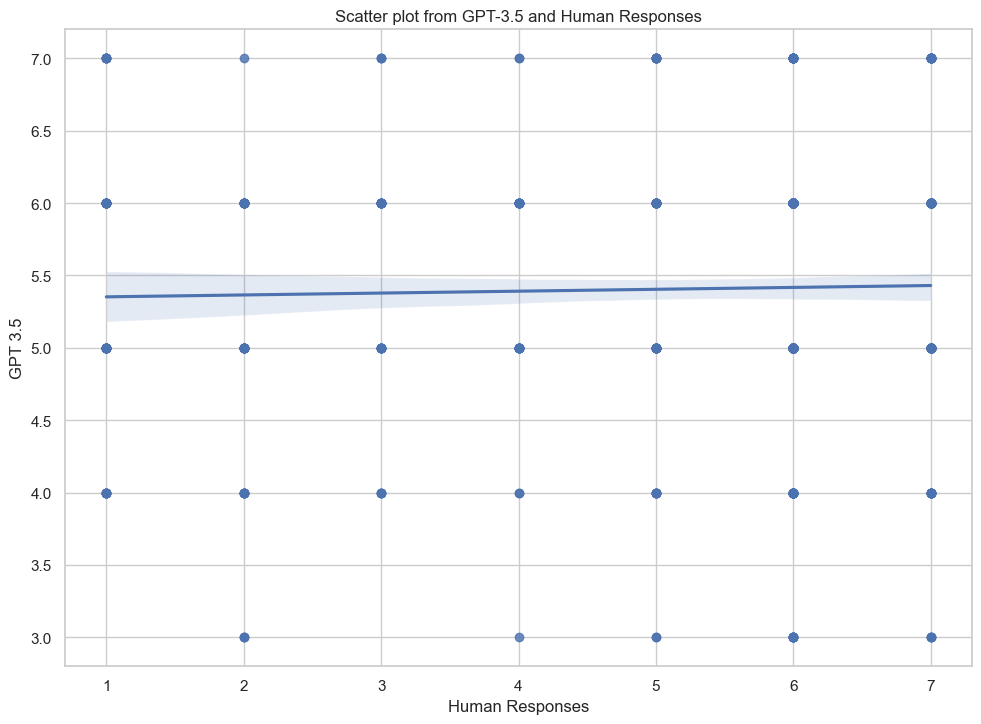

In [ ]:
# scatter plot
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# participants in order 1
responses_df.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)
order_1_responses = list(
    responses_df[responses_df['participant_id'].str.contains(
        'Order_1')]['response']
) + list(
    responses_df[responses_df['participant_id'].str.contains(
        'Order_2')]['response']
)
survey_df_llama2.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)
llama2_responses = list(survey_df_llama2['response'].fillna(
    4)) + list(survey_df_llama2['response'].fillna(4))
# increase size of plot
ax = sns.regplot(x=list(order_1_responses), y=list(llama2_responses))
ax.set_title('Scatter plot from GPT-3.5 and Human Responses')
ax.set_ylabel('GPT 3.5')
ax.set_xlabel('Human Responses')

# kendall tau
stats.spearmanr(order_1_responses, llama2_responses)

SignificanceResult(statistic=0.20521456597999402, pvalue=1.3641435221963795e-07)

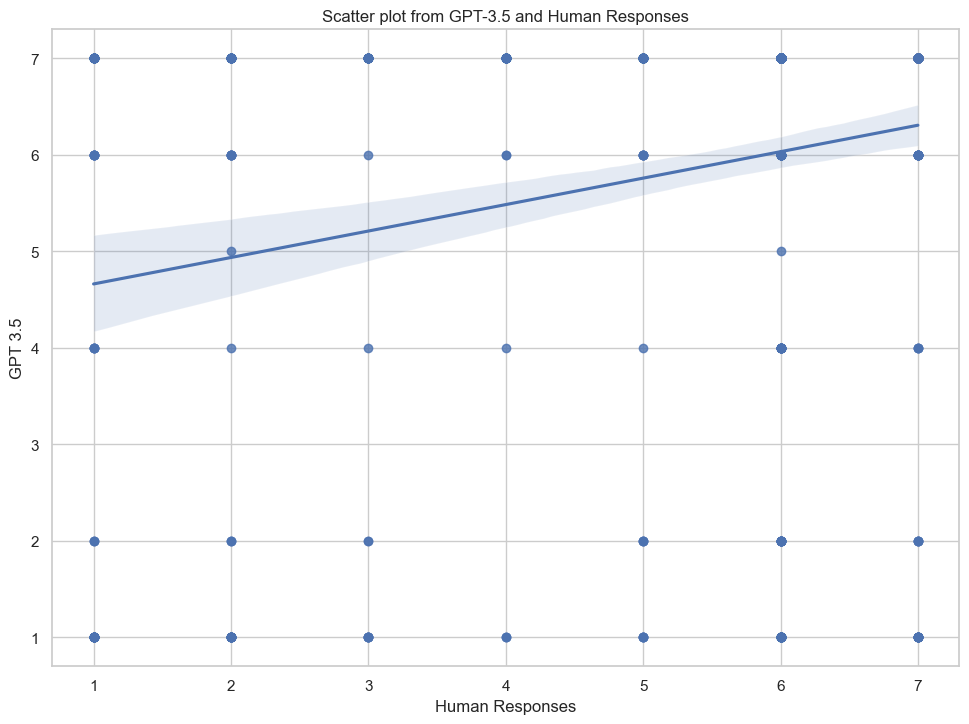

In [ ]:
# scatter plot
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# participants in order 1
responses_df.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)
order_1_responses = list(
    responses_df[responses_df['participant_id'].str.contains(
        'Order_1')]['response']
) + list(
    responses_df[responses_df['participant_id'].str.contains(
        'Order_2')]['response']
)
survey_df_gpt35.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)
gpt35_responses = list(survey_df_gpt35['response'].fillna(
    4)) + list(survey_df_gpt35['response'].fillna(4))
# increase size of plot
ax = sns.regplot(x=list(order_1_responses), y=list(gpt35_responses))
ax.set_title('Scatter plot from GPT-3.5 and Human Responses')
ax.set_ylabel('GPT 3.5')
ax.set_xlabel('Human Responses')

# kendall tau
stats.spearmanr(order_1_responses, gpt35_responses)

SignificanceResult(statistic=0.16261057705045295, pvalue=3.194898123782545e-05)

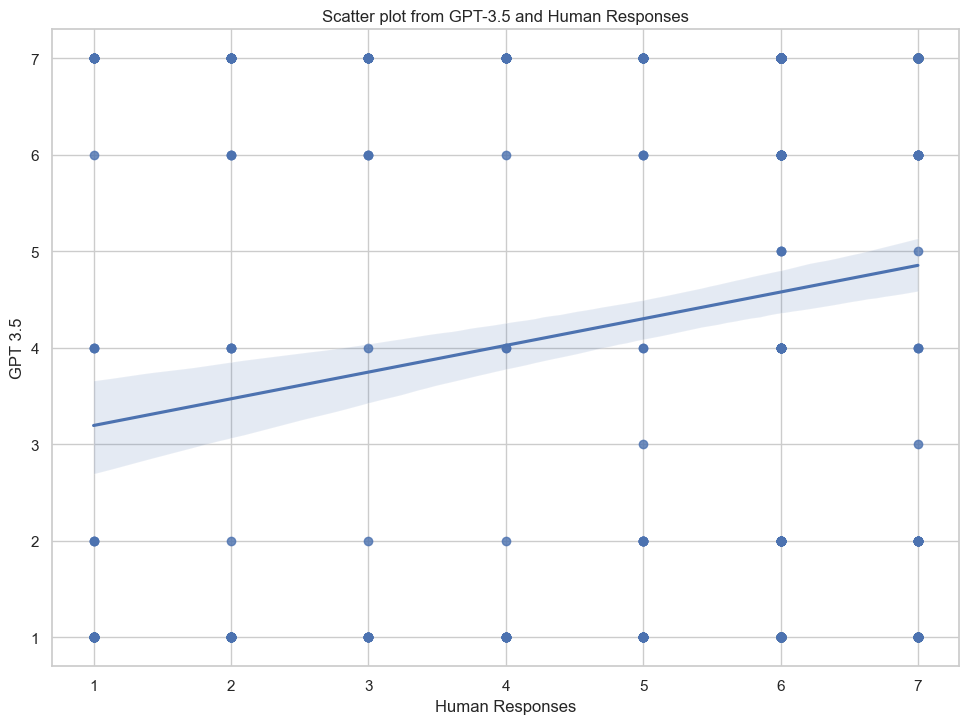

In [ ]:
# scatter plot
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# participants in order 1
responses_df.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)
order_1_responses = list(
    responses_df[responses_df['participant_id'].str.contains(
        'Order_1')]['response']
) + list(
    responses_df[responses_df['participant_id'].str.contains(
        'Order_2')]['response']
)
survey_df_gpt35_8_shot.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)
gpt35_responses = list(survey_df_gpt35_8_shot['response'].fillna(
    4)) + list(survey_df_gpt35_8_shot['response'].fillna(4))
# increase size of plot
ax = sns.regplot(x=list(order_1_responses), y=list(gpt35_responses))
ax.set_title('Scatter plot from GPT-3.5 and Human Responses')
ax.set_ylabel('GPT 3.5')
ax.set_xlabel('Human Responses')

# kendall tau
stats.spearmanr(order_1_responses, gpt35_responses)

SignificanceResult(statistic=0.20539385365994364, pvalue=1.3296075255403583e-07)

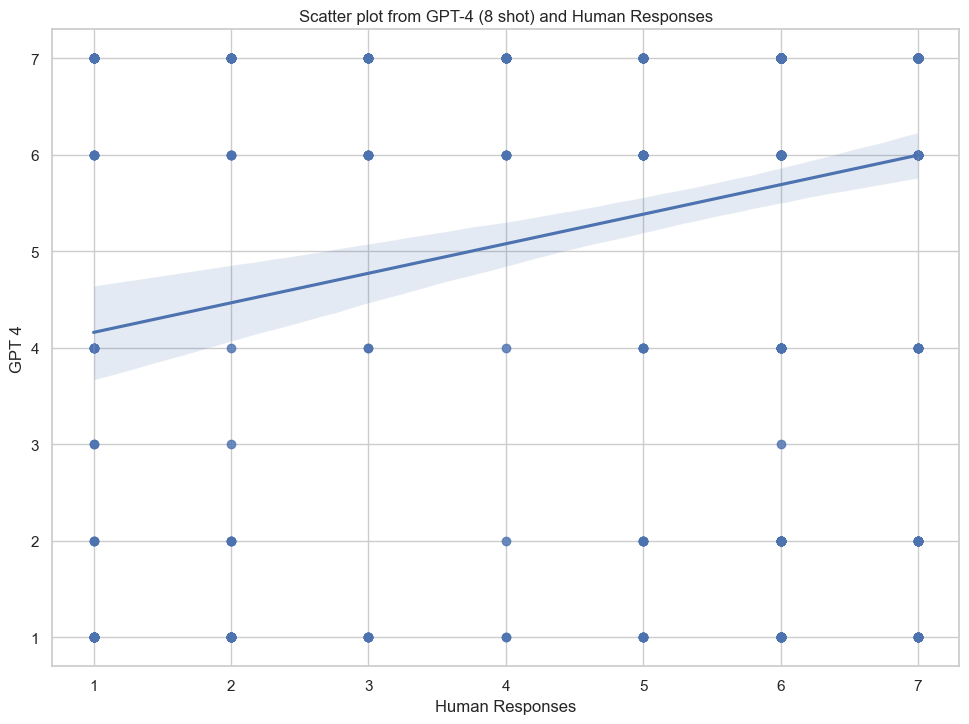

In [ ]:
# scatter plot
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# participants in order 1
responses_df.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)
order_1_responses = list(
    responses_df[responses_df['participant_id'].str.contains(
        'Order_1')]['response']
) + list(
    responses_df[responses_df['participant_id'].str.contains(
        'Order_2')]['response']
)
survey_df_gpt4.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)
gpt4_responses = list(survey_df_gpt4['response'].fillna(
    4)) + list(survey_df_gpt4['response'].fillna(4))
# increase size of plot
ax = sns.regplot(x=list(order_1_responses), y=list(gpt4_responses))
ax.set_title('Scatter plot from GPT-4 (8 shot) and Human Responses')
ax.set_ylabel('GPT 4')
ax.set_xlabel('Human Responses')

# kendall tau
stats.spearmanr(order_1_responses, gpt4_responses)

SignificanceResult(statistic=0.29268307534079824, pvalue=2.888359399300238e-14)

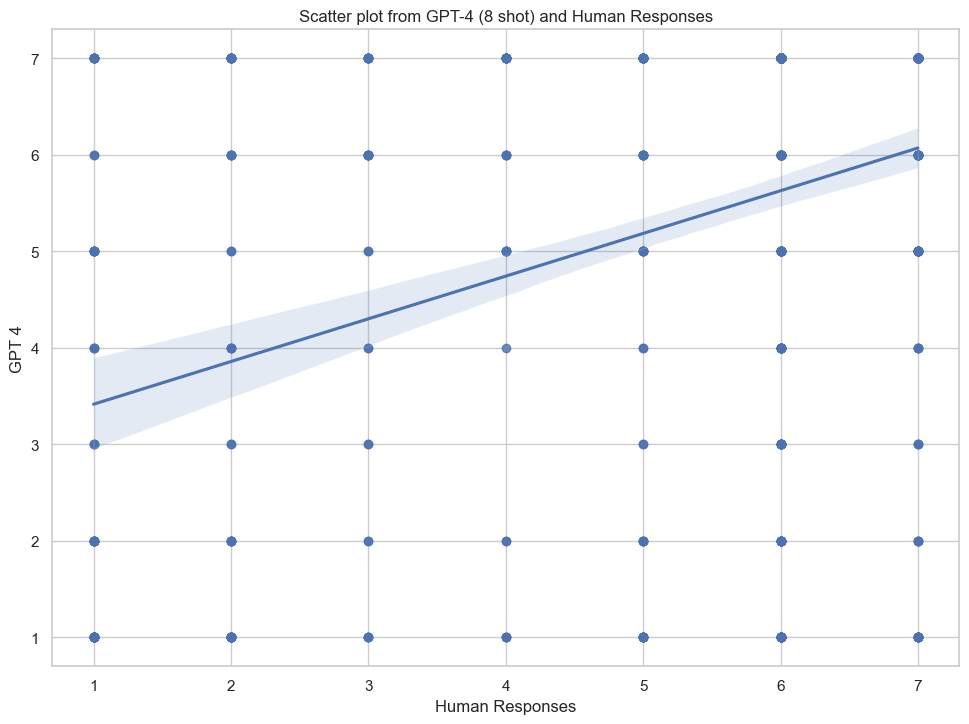

In [ ]:
# scatter plot
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# participants in order 1
responses_df.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)
order_1_responses = list(
    responses_df[responses_df['participant_id'].str.contains(
        'Order_1')]['response']
) + list(
    responses_df[responses_df['participant_id'].str.contains(
        'Order_2')]['response']
)
survey_df_gpt4_8_shot.sort_values(
    by=['sample_id', 'method', 'question'],
    inplace=True
)
gpt4_responses = list(survey_df_gpt4_8_shot['response'].fillna(
    4)) + list(survey_df_gpt4_8_shot['response'].fillna(4))
# increase size of plot
ax = sns.regplot(x=list(order_1_responses), y=list(gpt4_responses))
ax.set_title('Scatter plot from GPT-4 (8 shot) and Human Responses')
ax.set_ylabel('GPT 4')
ax.set_xlabel('Human Responses')

# kendall tau
stats.spearmanr(order_1_responses, gpt4_responses)

#### Spearman Correlations between human and machine by method


In [ ]:
survey = {
    'gpt4_8_shot': survey_df_gpt4_8_shot,
    'gpt35_8_shot': survey_df_gpt35_8_shot,
    'gpt4': survey_df_gpt4,
    'gpt35': survey_df_gpt35,
    'llama2': survey_df_llama2,
    'llama2_8_shot': survey_df_llama2_8_shot
}
results = []
for method, df in survey.items():
    merged_df = pd.merge(
        df,
        responses_df,
        on=['sample_id', 'method', 'question']
    ).fillna(4)
    corr_table = merged_df[['response_x', 'response_y']].corr(
        method='spearman'
    )
    results.append({
        'method': method,
        'correlation': corr_table['response_x']['response_y']
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by=['method']).set_index('method')

,correlation
method,
gpt35,0.205215
gpt35_8_shot,0.162611
gpt4,0.205394
gpt4_8_shot,0.292683
llama2,0.029629
llama2_8_shot,-0.007195


In [ ]:
survey = {
    'gpt4_8_shot': survey_df_gpt4_8_shot,
    'gpt35_8_shot': survey_df_gpt35_8_shot,
    'gpt4': survey_df_gpt4,
    'gpt35': survey_df_gpt35,
    'llama2': survey_df_llama2,
    'llama2_8_shot': survey_df_llama2_8_shot
}
results = []
for method, df in survey.items():
    merged_df = pd.merge(
        df,
        responses_df,
        on=['sample_id', 'method', 'question']
    ).fillna(4)
    merged_df = merged_df.loc[
        merged_df['question_type_x'].isin(
            ['Edit consistency', 'Factual consistency'])
    ]
    corr_table = merged_df[['response_x', 'response_y']].corr(
        method='spearman'
    )
    results.append({
        'method': method,
        'correlation': corr_table['response_x']['response_y']
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by=['method']).set_index('method')

,correlation
method,
gpt35,0.283627
gpt35_8_shot,0.124436
gpt4,0.290136
gpt4_8_shot,0.451378
llama2,0.102938
llama2_8_shot,0.017520


In [ ]:
survey = {
    'gpt4_8_shot': survey_df_gpt4_8_shot,
    'gpt35_8_shot': survey_df_gpt35_8_shot,
    'gpt4': survey_df_gpt4,
    'gpt35': survey_df_gpt35,
    'llama2': survey_df_llama2,
    'llama2_8_shot': survey_df_llama2_8_shot
}
results = []
for method, df in survey.items():
    merged_df = pd.merge(
        df,
        responses_df,
        on=['sample_id', 'method', 'question']
    ).fillna(4)
    for question_type_x in merged_df.question_type_x.unique():
        merged_tmp = merged_df.loc[merged_df['question_type_x']
                                   == question_type_x]
        corr_table = merged_tmp[['response_x', 'response_y']].corr(
            method='spearman'
        )
        results.append({
            'method': method,
            'question_type_x': question_type_x,
            'correlation': corr_table['response_x']['response_y']
        })

results_df = pd.DataFrame(results)
results_df.sort_values(by=['correlation']).set_index('method')

,question_type_x,correlation
method,,
llama2_8_shot,Internal consistency,-0.167130
gpt4,Topicality,-0.127545
llama2,Internal consistency,-0.104886
llama2,Cross passage consistency,-0.080936
gpt35,Naturalness,-0.077664
llama2_8_shot,Factual consistency,-0.050047
llama2_8_shot,Topicality,-0.043911
llama2_8_shot,Naturalness,-0.029405
gpt35_8_shot,Topicality,-0.024071


In [ ]:
merged_df = pd.merge(
    responses_df,
    survey_df_gpt4_8_shot,
    on=['sample_id', 'method', 'question'],
).fillna(4)

In [ ]:
agreements = []
for method in merged_df.method.unique():
    for question_type in merged_df.question_type_x.unique():
        for participant in merged_df.participant_id_x.unique():
            res_x = merged_df.loc[
                (merged_df['method'] == method) & (
                    merged_df['question_type_x'] == question_type)
                & (merged_df['participant_id_x'] == participant)
            ]['response_x'],
            res_y = merged_df.loc[
                (merged_df['method'] == method) & (
                    merged_df['question_type_x'] == question_type)
                & (merged_df['participant_id_x'] == participant)
            ]['response_y']
            # disagreements
            agreements.append({
                'method': method,
                'question_type': question_type,
                'participant': participant,
                'disagreements_abs': np.sum(np.abs(np.array(res_x) - np.array(res_y)) > 1),
                'disagreements_1': np.sum(np.abs(np.array(res_x) - np.array(res_y)) > 2),
                'disagreements_2': np.sum(np.abs(np.array(res_x) - np.array(res_y)) > 3),
                'disagreements_degree': np.sum(np.abs(np.array(res_x) - np.array(res_y)))
            })
agreements_df = pd.DataFrame(agreements)
agreements_df.groupby(['participant']).sum(
).sort_values(by=['disagreements_degree'])

,method,question_type,disagreements_abs,disagreements_1,disagreements_2,disagreements_degree
participant,,,,,,
Group_4_Order_1_0,humanhumanhumanhumanhumanhumanno_editno_editno...,NaturalnessFactual consistencyCross passage co...,21,10,7,80
Group_3_Order_2_0,humanhumanhumanhumanhumanhumanno_editno_editno...,NaturalnessFactual consistencyCross passage co...,20,10,6,91
Group_4_Order_2_0,humanhumanhumanhumanhumanhumanno_editno_editno...,NaturalnessFactual consistencyCross passage co...,29,16,8,124
Group_2_Order_2_0,humanhumanhumanhumanhumanhumanno_editno_editno...,NaturalnessFactual consistencyCross passage co...,26,19,15,134
Group_1_Order_1_0,humanhumanhumanhumanhumanhumanno_editno_editno...,NaturalnessFactual consistencyCross passage co...,30,22,15,143
Group_3_Order_1_0,humanhumanhumanhumanhumanhumanno_editno_editno...,NaturalnessFactual consistencyCross passage co...,37,22,11,143
Group_1_Order_2_0,humanhumanhumanhumanhumanhumanno_editno_editno...,NaturalnessFactual consistencyCross passage co...,28,21,18,148
Group_2_Order_1_0,humanhumanhumanhumanhumanhumanno_editno_editno...,NaturalnessFactual consistencyCross passage co...,41,31,21,188


In [ ]:
for method in merged_df.method.unique():
    print(
        method,
        stats.kendalltau(
            merged_df.loc[merged_df['method'] == method]['response_x'],
            merged_df.loc[merged_df['method'] == method]['response_y']
        )
    )

human SignificanceResult(statistic=0.09152558880434059, pvalue=0.1352275331645319)
no_edit SignificanceResult(statistic=0.22058352737087064, pvalue=6.795639668983208e-05)
rome SignificanceResult(statistic=0.20808309527968885, pvalue=0.0001518526373604114)


In [ ]:
for question_type in merged_df.question_type_x.unique():
    print(
        question_type,
        stats.spearmanr(
            merged_df.loc[merged_df['question_type_x']
                          == question_type]['response_x'],
            merged_df.loc[merged_df['question_type_x']
                          == question_type]['response_y']
        )
    )

Naturalness SignificanceResult(statistic=-0.019861148144081693, pvalue=0.8684762707794367)
Factual consistency SignificanceResult(statistic=0.3254576306593421, pvalue=6.880657975661612e-05)
Cross passage consistency SignificanceResult(statistic=0.15282709627726584, pvalue=0.199972799878243)
Internal consistency SignificanceResult(statistic=-0.021454420327053917, pvalue=0.7985388099786771)
Topicality SignificanceResult(statistic=0.0006555771997675462, pvalue=0.9956392638710131)
Edit consistency SignificanceResult(statistic=0.5359487749512512, pvalue=4.442694539761649e-12)


In [ ]:
for method in merged_df.method.unique():
    for question_type in merged_df.question_type_x.unique():
        print(
            method, question_type,
            stats.spearmanr(
                merged_df.loc[(merged_df['method'] == method) & (
                    merged_df['question_type_x'] == question_type)]['response_x'],
                merged_df.loc[(merged_df['method'] == method) & (
                    merged_df['question_type_x'] == question_type)]['response_y']
            )
        )

human Naturalness SignificanceResult(statistic=-0.44136741475237473, pvalue=0.030843756430335257)
human Factual consistency SignificanceResult(statistic=0.0355975726481378, pvalue=0.8101734578015256)
human Cross passage consistency SignificanceResult(statistic=0.26478965731628235, pvalue=0.2111480180020136)
human Internal consistency SignificanceResult(statistic=0.09922857259425687, pvalue=0.5022122045866018)
human Topicality SignificanceResult(statistic=-0.027162229766013016, pvalue=0.899742675696659)
human Edit consistency SignificanceResult(statistic=0.16131143123617683, pvalue=0.2733714674235263)
no_edit Naturalness SignificanceResult(statistic=0.3744638735912176, pvalue=0.07141911742133547)
no_edit Factual consistency SignificanceResult(statistic=-0.09895713302525859, pvalue=0.503388047058835)
no_edit Cross passage consistency SignificanceResult(statistic=0.06447651155972485, pvalue=0.7646971756887242)
no_edit Internal consistency SignificanceResult(statistic=-0.20697786924443165,

In [ ]:
merged_df = pd.merge(
    responses_df,
    survey_df_gpt35_8_shot,
    on=['sample_id', 'method', 'question'],
)
merged_df[['response_x', 'response_y']].corr()

,response_x,response_y
response_x,1.000000,0.185686
response_y,0.185686,1.000000


In [ ]:
for method in merged_df.method.unique():
    print(
        method,
        stats.kendalltau(
            merged_df.loc[merged_df['method'] == method]['response_x'],
            merged_df.loc[merged_df['method'] == method]['response_y']
        )
    )

human SignificanceResult(statistic=0.13103993010947151, pvalue=0.034731413882103115)
no_edit SignificanceResult(statistic=nan, pvalue=nan)
rome SignificanceResult(statistic=nan, pvalue=nan)


In [ ]:
for question_type in merged_df.question_type_x.unique():
    print(
        question_type,
        stats.kendalltau(
            merged_df.loc[merged_df['question_type_x']
                          == question_type]['response_x'],
            merged_df.loc[merged_df['question_type_x']
                          == question_type]['response_y']
        )
    )

Naturalness SignificanceResult(statistic=0.19222135115630892, pvalue=0.058940748491619156)
Factual consistency SignificanceResult(statistic=0.06851368479673774, pvalue=0.33256489956189184)
Cross passage consistency SignificanceResult(statistic=0.11910628034607823, pvalue=0.2346935196581298)
Internal consistency SignificanceResult(statistic=nan, pvalue=nan)
Topicality SignificanceResult(statistic=-0.019994532854787993, pvalue=0.8501568023462664)
Edit consistency SignificanceResult(statistic=0.13559273767605318, pvalue=0.05874384532496747)


In [ ]:
for method in merged_df.method.unique():
    for question_type in merged_df.question_type_x.unique():
        print(
            method, question_type,
            stats.kendalltau(
                merged_df.loc[(merged_df['method'] == method) & (
                    merged_df['question_type_x'] == question_type)]['response_x'],
                merged_df.loc[(merged_df['method'] == method) & (
                    merged_df['question_type_x'] == question_type)]['response_y']
            )
        )

human Naturalness SignificanceResult(statistic=0.28690229202651557, pvalue=0.14624384494527126)
human Factual consistency SignificanceResult(statistic=0.06235623266813626, pvalue=0.6312892681248985)
human Cross passage consistency SignificanceResult(statistic=0.1911956113941019, pvalue=0.31766423143775535)
human Internal consistency SignificanceResult(statistic=0.19198921756141818, pvalue=0.16381066877895933)
human Topicality SignificanceResult(statistic=0.30177075385277896, pvalue=0.11579635283289183)
human Edit consistency SignificanceResult(statistic=0.05540297681009755, pvalue=0.6870933533437666)
no_edit Naturalness SignificanceResult(statistic=-0.08257228238447704, pvalue=0.6581296011618021)
no_edit Factual consistency SignificanceResult(statistic=-0.0889324988761762, pvalue=0.47153204904139945)
no_edit Cross passage consistency SignificanceResult(statistic=0.3622159533005094, pvalue=0.04224202677672154)
no_edit Internal consistency SignificanceResult(statistic=nan, pvalue=nan)
no

#### Krippendorf Alpha between human and machine by method


In [ ]:
import krippendorff

survey = {
    'gpt4_8_shot': survey_df_gpt4_8_shot,
    'gpt35_8_shot': survey_df_gpt35_8_shot,
    'gpt4': survey_df_gpt4,
    'gpt35': survey_df_gpt35,
    'llama2': survey_df_llama2,
    'llama2_8_shot': survey_df_llama2_8_shot
}
results = []
for method, df in survey.items():
    merged_df = pd.merge(
        df,
        responses_df,
        on=['sample_id', 'method', 'question']
    ).fillna(4)

    tmp = np.swapaxes(merged_df[['response_x', 'response_y']].values, 0, 1)
    results.append({
        'method': method,
        'alpha': krippendorff.alpha(
            tmp
        )
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by=['alpha']).set_index('method')

,alpha
method,
llama2_8_shot,-0.000842
llama2,0.017481
gpt35_8_shot,0.135542
gpt35,0.207249
gpt4,0.242980
gpt4_8_shot,0.370969


In [ ]:
survey = {
    'gpt4_8_shot': survey_df_gpt4_8_shot,
    'gpt35_8_shot': survey_df_gpt35_8_shot,
    'gpt4': survey_df_gpt4,
    'gpt35': survey_df_gpt35,
    'llama2': survey_df_llama2,
    'llama2_8_shot': survey_df_llama2_8_shot
}
results = []
for method, df in survey.items():
    merged_df = pd.merge(
        df,
        responses_df,
        on=['sample_id', 'method', 'question']
    ).fillna(4)
    for question_type_x in merged_df.question.unique():
        merged_tmp = merged_df.loc[merged_df['question']
                                   == question_type_x]
        tmp = np.swapaxes(
            merged_tmp[['response_x', 'response_y']].values, 0, 1)
        results.append({
            'method': method,
            'question_type_x': question_type_x,
            'alpha': krippendorff.alpha(
                tmp,
                level_of_measurement='interval'
            ),
            'spearman': stats.spearmanr(
                merged_tmp['response_x'],
                merged_tmp['response_y']
            )[0],
        })

results_df = pd.DataFrame(results)
results_df.sort_values(by=['alpha']).set_index('method').to_csv('../results/krippendorff_alpha_human_and_machine.csv')


In [ ]:
survey = {
    'gpt4_8_shot': survey_df_gpt4_8_shot,
    'gpt35_8_shot': survey_df_gpt35_8_shot,
    'gpt4': survey_df_gpt4,
    'gpt35': survey_df_gpt35,
    'llama2': survey_df_llama2,
    'llama2_8_shot': survey_df_llama2_8_shot
}
results = []
for method, df in survey.items():
    merged_df = pd.merge(
        df,
        responses_df,
        on=['sample_id', 'method', 'question']
    ).fillna(4)
    for question_type_x in merged_df.question_type_x.unique():
        merged_tmp = merged_df.loc[merged_df['question_type_x']
                                   == question_type_x]
        tmp = np.swapaxes(
            merged_tmp[['response_x', 'response_y']].values, 0, 1)
        results.append({
            'method': method,
            'question_type_x': question_type_x,
            'alpha': krippendorff.alpha(
                tmp,
                level_of_measurement='interval'
            ),
            'spearman': stats.spearmanr(
                merged_tmp['response_x'],
                merged_tmp['response_y']
            )[0]
        })

results_df = pd.DataFrame(results)
results_df.sort_values(by=['alpha']).set_index('method')

,question_type_x,alpha,spearman
method,,,
gpt35,Topicality,-0.276786,NaN
gpt4,Topicality,-0.171202,-0.127545
gpt4_8_shot,Naturalness,-0.140987,-0.019861
gpt4_8_shot,Topicality,-0.093028,0.000656
gpt35,Naturalness,-0.090446,-0.077664
gpt35_8_shot,Topicality,-0.085520,-0.024071
llama2_8_shot,Internal consistency,-0.078170,-0.167130
llama2,Internal consistency,-0.076591,-0.104886
llama2,Cross passage consistency,-0.062728,-0.080936


#### ICC


In [ ]:
survey = {
    'gpt4_8_shot': survey_df_gpt4_8_shot,
    'gpt35_8_shot': survey_df_gpt35_8_shot,
    'gpt4': survey_df_gpt4,
    'gpt35': survey_df_gpt35
}
results = []
for method, df in survey.items():
    responses_df_tmp = responses_df.copy()
    responses_df_tmp['participant_id'] = 0
    merged_df = pd.concat([df.fillna(4), responses_df_tmp])
    merged_df['sample_id'] = merged_df['sample_id'] + \
        merged_df['method'] + merged_df['question']

    icc_df = pg.intraclass_corr(
        data=merged_df,
        targets='sample_id',
        raters='participant_id',
        ratings='response'
    )
    results.append({
        'method': method,
        'ICC': icc_df['ICC'].values[0]
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by=['ICC']).set_index('method')

,ICC
method,
gpt35_8_shot,0.080647
gpt35,0.238686
gpt4,0.267473
gpt4_8_shot,0.429516


In [ ]:
survey = {
    'gpt4_8_shot': survey_df_gpt4_8_shot,
    'gpt35_8_shot': survey_df_gpt35_8_shot,
    'gpt4': survey_df_gpt4,
    'gpt35': survey_df_gpt35
}
results = []
for method, df in survey.items():
    responses_df_tmp = responses_df.copy()
    responses_df_tmp['participant_id'] = 0
    merged_df = pd.concat([df.fillna(4), responses_df_tmp])
    merged_df['sample_id'] = merged_df['sample_id'] + \
        merged_df['method'] + merged_df['question']
    for question_type in merged_df.question_type.unique():
        merged_tmp = merged_df.loc[merged_df['question_type'] == question_type]
        icc_df = pg.intraclass_corr(
            data=merged_tmp,
            targets='sample_id',
            raters='participant_id',
            ratings='response'
        )
        results.append({
            'method': method,
            'question_type': question_type,
            'ICC': icc_df['ICC'].values[0]
        })

results_df = pd.DataFrame(results)
results_df.sort_values(by=['ICC']).set_index('method')

,question_type,ICC
method,,
gpt4,Topicality,-0.261708
gpt35_8_shot,Topicality,-0.100209
gpt35_8_shot,Internal consistency,-0.080319
gpt35_8_shot,Factual consistency,-0.080190
gpt4_8_shot,Topicality,-0.063607
gpt35,Internal consistency,-0.016127
gpt35,Topicality,-0.013917
gpt4,Internal consistency,-0.012544
gpt4_8_shot,Internal consistency,0.035755


In [ ]:
# calculate ICC
import pingouin as pg

responses_df_tmp = responses_df.copy()
responses_df_tmp['participant_id'] = 0
merged_df = pd.concat([survey_df_gpt35.fillna(4), responses_df_tmp])
merged_df['sample_id'] = merged_df['sample_id'] + \
    merged_df['method'] + merged_df['question']
pg.intraclass_corr(
    data=merged_df,
    targets='sample_id',
    raters='participant_id',
    ratings='response'
)

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.238686,1.627038,323,324,6.702487e-06,"[0.13, 0.34]"
1,ICC2,Single random raters,0.256939,1.739274,323,323,3.936026e-07,"[0.15, 0.36]"
2,ICC3,Single fixed raters,0.269880,1.739274,323,323,3.936026e-07,"[0.17, 0.37]"
3,ICC1k,Average raters absolute,0.385386,1.627038,323,324,6.702487e-06,"[0.24, 0.51]"
4,ICC2k,Average random raters,0.408833,1.739274,323,323,3.936026e-07,"[0.26, 0.53]"
5,ICC3k,Average fixed raters,0.425047,1.739274,323,323,3.936026e-07,"[0.28, 0.54]"


In [ ]:
# calculate ICC
import pingouin as pg

responses_df_tmp = responses_df.copy()
responses_df_tmp['participant_id'] = 0
merged_df = pd.concat([survey_df_gpt4.fillna(4), responses_df_tmp])
merged_df['sample_id'] = merged_df['sample_id'] + \
    merged_df['method'] + merged_df['question']
pg.intraclass_corr(
    data=merged_df,
    targets='sample_id',
    raters='participant_id',
    ratings='response'
)

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.267473,1.730273,323,324,4.857953e-07,"[0.16, 0.37]"
1,ICC2,Single random raters,0.269444,1.743114,323,323,3.562117e-07,"[0.17, 0.37]"
2,ICC3,Single fixed raters,0.270902,1.743114,323,323,3.562117e-07,"[0.17, 0.37]"
3,ICC1k,Average raters absolute,0.422057,1.730273,323,324,4.857953e-07,"[0.28, 0.54]"
4,ICC2k,Average random raters,0.424507,1.743114,323,323,3.562117e-07,"[0.28, 0.54]"
5,ICC3k,Average fixed raters,0.426314,1.743114,323,323,3.562117e-07,"[0.29, 0.54]"


#### Agreement


In [ ]:
survey = {
    'gpt4_8_shot': survey_df_gpt4_8_shot,
    'gpt35_8_shot': survey_df_gpt35_8_shot,
    'gpt4': survey_df_gpt4,
    'gpt35': survey_df_gpt35
}
results = []
for method, df in survey.items():
    merged_df = pd.merge(
        df,
        responses_df,
        on=['sample_id', 'method', 'question']
    ).fillna(4)

    order_1_responses = merged_df['response_x']
    order_2_responses = merged_df['response_y']

    absolute_agreement = np.sum(order_1_responses == np.array(
        order_2_responses)) / len(order_1_responses)
    agreement_within_one = np.sum(np.abs(
        order_1_responses - np.array(order_2_responses) <= 1)) / len(order_1_responses)
    agreement_within_two = np.sum(np.abs(
        order_1_responses - np.array(order_2_responses) <= 2)) / len(order_1_responses)
    results.append({
        'method': method,
        'absolute_agreement': absolute_agreement,
        'agreement_within_one': agreement_within_one,
        'agreement_within_two': agreement_within_two,
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by=['agreement_within_two']).set_index('method')

,absolute_agreement,agreement_within_one,agreement_within_two
method,,,
gpt35,0.234568,0.766975,0.833333
gpt4,0.263889,0.800926,0.854938
gpt4_8_shot,0.245370,0.834877,0.891975
gpt35_8_shot,0.208333,0.848765,0.896605


In [ ]:
survey = {
    'gpt4_8_shot': survey_df_gpt4_8_shot,
    'gpt35_8_shot': survey_df_gpt35_8_shot,
    'gpt4': survey_df_gpt4,
    'gpt35': survey_df_gpt35
}
results = []
for method, df in survey.items():
    merged_df = pd.merge(
        df,
        responses_df,
        on=['sample_id', 'method', 'question']
    ).fillna(4)

    for question_type_x in merged_df.question_type_x.unique():
        merged_tmp = merged_df.loc[merged_df['question_type_x'] == question_type_x]
        order_1_responses = merged_tmp['response_x']
        order_2_responses = merged_tmp['response_y']

        absolute_agreement = np.sum(order_1_responses == np.array(order_2_responses)) / len(order_1_responses)
        agreement_within_one = np.sum(np.abs(order_1_responses - np.array(order_2_responses) <= 1)) / len(order_1_responses)
        agreement_within_two = np.sum(np.abs(order_1_responses - np.array(order_2_responses) <= 2)) / len(order_1_responses)
        results.append({
            'method': method,
            'question_type_x': question_type_x,
            'absolute_agreement': absolute_agreement,
            'agreement_within_one': agreement_within_one,
            'agreement_within_two': agreement_within_two,
        })

results_df = pd.DataFrame(results)
results_df.sort_values(by=['agreement_within_two']).set_index('method')

,question_type_x,absolute_agreement,agreement_within_one,agreement_within_two
method,,,,
gpt4,Cross passage consistency,0.250000,0.736111,0.777778
gpt35,Edit consistency,0.326389,0.743056,0.805556
gpt35,Factual consistency,0.215278,0.722222,0.805556
gpt35,Cross passage consistency,0.194444,0.763889,0.819444
gpt35,Naturalness,0.194444,0.763889,0.819444
gpt4,Edit consistency,0.326389,0.798611,0.840278
gpt4_8_shot,Naturalness,0.194444,0.805556,0.847222
gpt4_8_shot,Cross passage consistency,0.236111,0.805556,0.847222
gpt4,Internal consistency,0.187500,0.812500,0.861111


In [ ]:
# agreement scores

# calculate agreement within 1, 2, and 3 points
merged_df = pd.merge(
    responses_df,
    survey_df_gpt35,
    on=['sample_id', 'method', 'question'],
).fillna(4)

order_1_responses = merged_df['response_x']
order_2_responses = merged_df['response_y']

absolute_agreement = np.sum(order_1_responses == np.array(
    order_2_responses)) / len(order_1_responses)
agreement_within_one = np.sum(np.abs(
    order_1_responses - np.array(order_2_responses) <= 1)) / len(order_1_responses)
agreement_within_two = np.sum(np.abs(
    order_1_responses - np.array(order_2_responses) <= 2)) / len(order_1_responses)
agreement_within_three = np.sum(np.abs(
    order_1_responses - np.array(order_2_responses) <= 3)) / len(order_1_responses)

print(
    'Absolute Agreement: ', absolute_agreement
)
print(
    'Agreement within 1 point: ', agreement_within_one
)
print(
    'Agreement within 2 points: ', agreement_within_two
)
print(
    'Agreement within 3 points: ', agreement_within_three
)

Absolute Agreement:  0.2345679012345679
Agreement within 1 point:  0.8611111111111112
Agreement within 2 points:  0.8904320987654321
Agreement within 3 points:  0.9074074074074074


In [ ]:
# agreement scores

# calculate agreement within 1, 2, and 3 points
merged_df = pd.merge(
    responses_df,
    survey_df_gpt4,
    on=['sample_id', 'method', 'question'],
).fillna(4)

order_1_responses = merged_df['response_x']
order_2_responses = merged_df['response_y']

absolute_agreement = np.sum(order_1_responses == np.array(
    order_2_responses)) / len(order_1_responses)
agreement_within_one = np.sum(np.abs(
    order_1_responses - np.array(order_2_responses) <= 1)) / len(order_1_responses)
agreement_within_two = np.sum(np.abs(
    order_1_responses - np.array(order_2_responses) <= 2)) / len(order_1_responses)
agreement_within_three = np.sum(np.abs(
    order_1_responses - np.array(order_2_responses) <= 3)) / len(order_1_responses)

print(
    'Absolute Agreement: ', absolute_agreement
)
print(
    'Agreement within 1 point: ', agreement_within_one
)
print(
    'Agreement within 2 points: ', agreement_within_two
)
print(
    'Agreement within 3 points: ', agreement_within_three
)

Absolute Agreement:  0.2638888888888889
Agreement within 1 point:  0.8179012345679012
Agreement within 2 points:  0.8564814814814815
Agreement within 3 points:  0.8827160493827161


## Machine Annotation and Human Annotation


### Characterization of data collected


In [ ]:
import json
import pandas as pd

gpt_35_annotations_human_path = '../results/annotations_llama2_chat_human_edit_first_3_annotation_gpt-3.5-turbo-0613_0.json'
gpt_35_annotations_human = json.load(open(gpt_35_annotations_human_path))

gpt_35_annotations_no_edit_path = '../results/annotations_llama2_chat_no_edit_first_3_annotation_gpt-3.5-turbo-0613_0.json'
gpt_35_annotations_no_edit = json.load(open(gpt_35_annotations_no_edit_path))

gpt_35_annotations_edit_path = '../results/annotations_llama2_chat_rome_edit_first_3_annotation_gpt-3.5-turbo-0613_0.json'
gpt_35_annotations_edit = json.load(open(gpt_35_annotations_edit_path))

gpt_35_df = pd.DataFrame(
    gpt_35_annotations_human + gpt_35_annotations_no_edit + gpt_35_annotations_edit
)

gpt35_annotations_human_8_shot_path = '../results/annotations_llama2_chat_human_edit_first_3_annotation_gpt-3.5-turbo-0613_8.json'
gpt35_annotations_human_8_shot = json.load(open(gpt35_annotations_human_8_shot_path))

gpt35_annotations_no_edit_8_shot_path = '../results/annotations_llama2_chat_no_edit_first_3_annotation_gpt-3.5-turbo-0613_8.json'
gpt35_annotations_no_edit_8_shot = json.load(open(gpt35_annotations_no_edit_8_shot_path))

gpt35_annotations_edit_8_shot_path = '../results/annotations_llama2_chat_rome_edit_first_3_annotation_gpt-3.5-turbo-0613_8.json'
gpt35_annotations_edit_8_shot = json.load(open(gpt35_annotations_edit_8_shot_path))

gpt_35_df_8_shot = pd.DataFrame(
    gpt35_annotations_human_8_shot + gpt35_annotations_no_edit_8_shot + gpt35_annotations_edit_8_shot
)


gpt_4_annotations_human_path = '../results/annotations_llama2_chat_human_edit_first_3_annotation_gpt-4_0.json'
gpt_4_annotations_human = json.load(open(gpt_4_annotations_human_path))

gpt_4_annotations_no_edit_path = '../results/annotations_llama2_chat_no_edit_first_3_annotation_gpt-4_0.json'
gpt_4_annotations_no_edit = json.load(open(gpt_4_annotations_no_edit_path))

gpt_4_annotations_edit_path = '../results/annotations_llama2_chat_rome_edit_first_3_annotation_gpt-4_0.json'
gpt_4_annotations_edit = json.load(open(gpt_4_annotations_edit_path))

gpt_4_df = pd.DataFrame(
    gpt_4_annotations_human + gpt_4_annotations_no_edit + gpt_4_annotations_edit
)

gpt4_annotations_human_8_shot_path = '../results/annotations_llama2_chat_human_edit_first_3_annotation_gpt-4_8.json'
gpt4_annotations_human_8_shot = json.load(open(gpt4_annotations_human_8_shot_path))

gpt4_annotations_no_edit_8_shot_path = '../results/annotations_llama2_chat_no_edit_first_3_annotation_gpt-4_8.json'
gpt4_annotations_no_edit_8_shot = json.load(open(gpt4_annotations_no_edit_8_shot_path))

gpt4_annotations_edit_8_shot_path = '../results/annotations_llama2_chat_rome_edit_first_3_annotation_gpt-4_8.json'
gpt4_annotations_edit_8_shot = json.load(open(gpt4_annotations_edit_8_shot_path))

gpt_4_df_8_shot = pd.DataFrame(
    gpt4_annotations_human_8_shot + gpt4_annotations_no_edit_8_shot + gpt4_annotations_edit_8_shot
)

llama2_annotations_human_path = '../results/annotations_llama2_chat_human_edit_first_3_annotation_meta-llamaLlama-2-7b-chat-hf_shots_0.json'
llama2_annotations_human = json.load(open(llama2_annotations_human_path))

llama2_annotations_no_edit_path = '../results/annotations_llama2_chat_no_edit_first_3_annotation_meta-llamaLlama-2-7b-chat-hf_shots_0.json'
llama2_annotations_no_edit = json.load(open(llama2_annotations_no_edit_path))

llama2_annotations_edit_path = '../results/annotations_llama2_chat_rome_edit_first_3_annotation_meta-llamaLlama-2-7b-chat-hf_shots_0.json'
llama2_annotations_edit = json.load(open(llama2_annotations_edit_path))

llama2_df = pd.DataFrame(
    llama2_annotations_human + llama2_annotations_no_edit + llama2_annotations_edit
)

llama2_annotations_human_8_shot_path = '../results/annotations_llama2_chat_human_edit_first_3_annotation_meta-llamaLlama-2-7b-chat-hf_shots_8.json'
llama2_annotations_human_8_shot = json.load(open(llama2_annotations_human_8_shot_path))

llama2_annotations_no_edit_8_shot_path = '../results/annotations_llama2_chat_no_edit_first_3_annotation_meta-llamaLlama-2-7b-chat-hf_shots_8.json'
llama2_annotations_no_edit_8_shot = json.load(open(llama2_annotations_no_edit_8_shot_path))

llama2_annotations_edit_8_shot_path = '../results/annotations_llama2_chat_rome_edit_first_3_annotation_meta-llamaLlama-2-7b-chat-hf_shots_8.json'
llama2_annotations_edit_8_shot = json.load(open(llama2_annotations_edit_8_shot_path))

llama2_df_8_shot = pd.DataFrame(
    llama2_annotations_human_8_shot + llama2_annotations_no_edit_8_shot + llama2_annotations_edit_8_shot
)




In [ ]:
import json

with open('../data/annotation_data/longform_eval_first_3_samples_paragraph_annotations (2).json') as f:
    pretest = json.load(f)

intervention_map = {
    'human': 'llama2_chat_human_edit_pretest_annotation',
    'no_edit': 'llama2_chat_no_edit_pretest_annotation',
    'rome': 'llama2_chat_rome_edit_pretest_annotation'
}

anno_question_type = {
    'new_fact_and_main_passage': 'New fact is true',
    'new_fact_and_related_passage': 'New fact is true',
    'old_fact_and_main_passage': 'Old fact is true',
    'old_fact_and_related_passage': 'Old fact is true',
    'ground_truth_and_related_passage': 'Ground truth is true',
    'ground_truth_and_main_passage': 'Ground truth is true',
}

machine_annotations = {
    'gpt35': gpt_35_df,
    'gpt4': gpt_4_df,
    'llama2': llama2_df,
    'gpt35_8_shot': gpt_35_df_8_shot,
    'gpt4_8_shot': gpt_4_df_8_shot,
    'llama2_8_shot': llama2_df_8_shot
}

raters = {
}
rating_to_number = {
    'supports': 2,
    'neutral': 1,
    'contradicts': 0
}
agreements = {
    1: 0,
    2: 0,
    3: 0,
    4: 0
}
agreements_by_class = {
    'contradicts': {
        1: 0,
        2: 0,
        3: 0,
        4: 0
    },
    'neutral': {
        1: 0,
        2: 0,
        3: 0,
        4: 0
    },
    'supports': {
        1: 0,
        2: 0,
        3: 0,
        4: 0
    }
}

ratings = []
for example in pretest['examples']:
    agreements[
        len(example['classifications'])
    ] += 1
    for rating in example['classifications']:
        for rater in rating['classified_by']:
            anon_id = rater['annotator_id']
            if anon_id not in raters:
                raters[anon_id] = []

            agreements_by_class[rating['classname']
                                ][len(example['classifications'])] += 1
            raters[anon_id].append(
                rating['classname']
            )
            for machine_method, machine_df in machine_annotations.items():
                if machine_method not in raters:
                    raters[machine_method] = []
                try:
                    raters[machine_method].append(
                        machine_df.loc[
                            (machine_df['content'] == example['content'])
                        ]['classification'].values[0]
                    )
                except:
                    raters[machine_method].append(
                        "neutral"
                    )
            
            ratings.append({
                "rater": anon_id,
                "sample_id": example['metadata']['sample'],
                "example_id": example['example_id'],
                "classification": rating['classname'],
                "method": example['metadata']['intervention'],
                "label": example['metadata']['label'],
                "content": example['content'],
                'question_type': anno_question_type[
                    example['metadata']['label']
                ],
                "highlighted_sentences": [
                    anno['value'] for anno in
                    example['annotations']
                ]
            })
            for machine_method, machine_df in machine_annotations.items():
                try:
                    ratings.append({
                        "rater": machine_method,
                        "sample_id": example['metadata']['sample'],
                        "example_id": example['example_id'],
                        "content": example['content'],
                        "classification": machine_df.loc[
                            (machine_df['content'] == example['content'])
                        ]['classification'].values[0],
                        "method": example['metadata']['intervention'],
                        "label": example['metadata']['label'],
                        'question_type': anno_question_type[
                            example['metadata']['label']
                        ],
                        "highlighted_sentences": machine_df.loc[
                            (machine_df['content'] == example['content'])
                        ]['highlighted_sentences'].values[0]
                    })
                except:
                    ratings.append({
                        "rater": machine_method,
                        "sample_id": example['metadata']['sample'],
                        "example_id": example['example_id'],
                        "classification": "neutral",
                        "content": example['content'],
                        "method": example['metadata']['intervention'],
                        "label": example['metadata']['label'],
                        'question_type': anno_question_type[
                            example['metadata']['label']
                        ],
                        "highlighted_sentences": []
                    })


annos_df = pd.DataFrame(ratings)

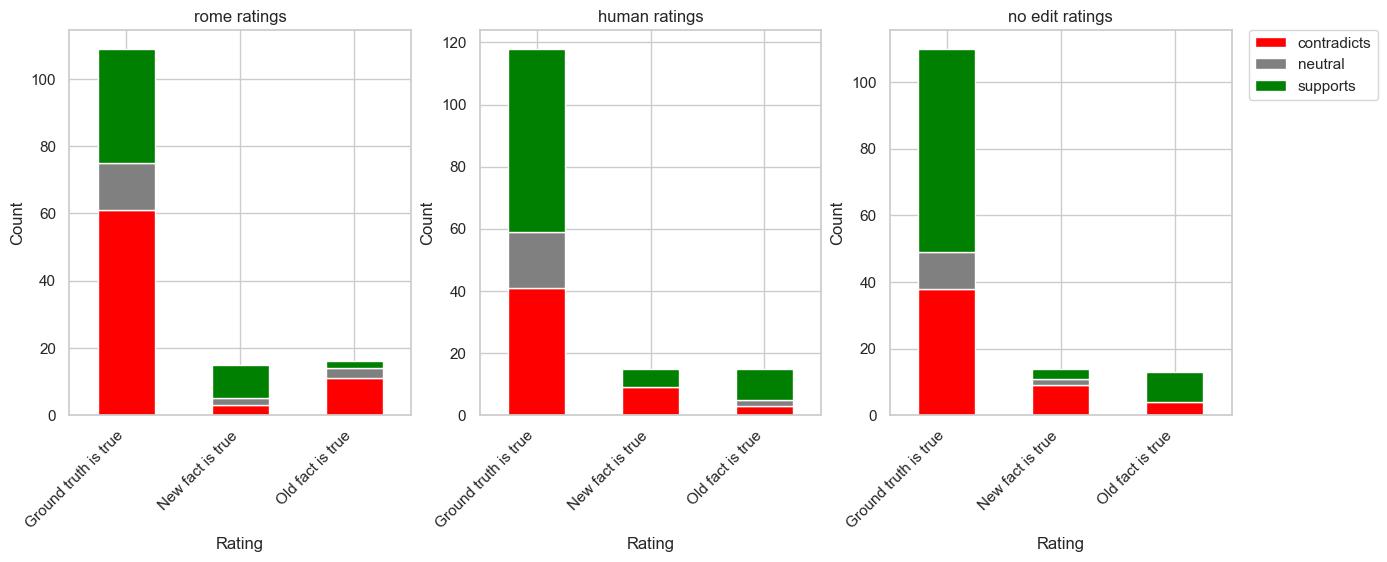

In [ ]:
# bar graph of rating per class per method
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# create three subplots for each method on one plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

annos_df_tmp = annos_df.loc[
    (annos_df['rater'] == 'gpt35')
]
for i, method in enumerate(annos_df_tmp['method'].unique()):
    ax = annos_df_tmp.loc[
        annos_df_tmp['method'] == method
    ].pivot_table(
        index=['question_type'],
        columns=['classification'],
        values='rater',
        aggfunc='count'
    ).plot(
        kind='bar',
        ax=axs[i],
        stacked=True,
        color=[
            'red', 'grey', 'green'
        ]
    )
    ax.set_title(f"{method.replace('_', ' ')} ratings")
    ax.set_xlabel('Rating')
    ax.set_ylabel('Count')
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    # move legend outside of plot

    # delete other legends
    if i < 2:
        ax.get_legend().remove()
    else:
        ax.legend(
            bbox_to_anchor=(1.05, 1),
            loc='upper left',
            borderaxespad=0.
        )

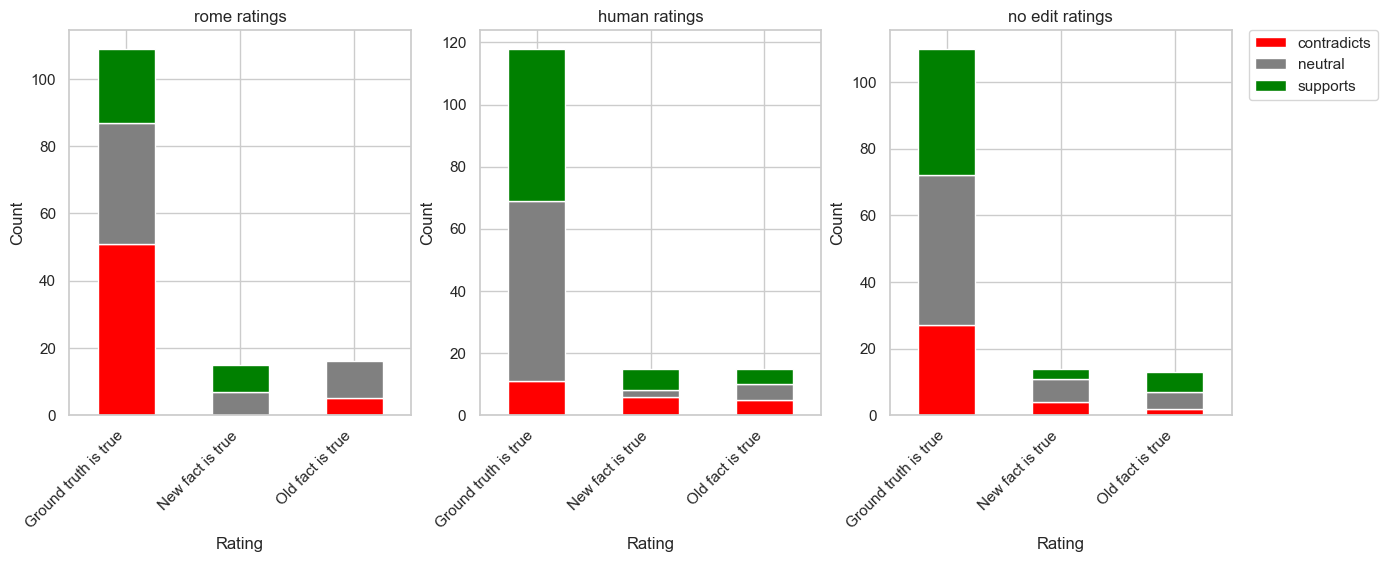

In [ ]:
# bar graph of rating per class per method
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# create three subplots for each method on one plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

annos_df_tmp = annos_df.loc[
    (annos_df['rater'] == 'gpt4')
]
for i, method in enumerate(annos_df_tmp['method'].unique()):
    ax = annos_df_tmp.loc[
        annos_df_tmp['method'] == method
    ].pivot_table(
        index=['question_type'],
        columns=['classification'],
        values='rater',
        aggfunc='count'
    ).plot(
        kind='bar',
        ax=axs[i],
        stacked=True,
        color=[
            'red', 'grey', 'green'
        ]
    )
    ax.set_title(f"{method.replace('_', ' ')} ratings")
    ax.set_xlabel('Rating')
    ax.set_ylabel('Count')
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    # move legend outside of plot

    # delete other legends
    if i < 2:
        ax.get_legend().remove()
    else:
        ax.legend(
            bbox_to_anchor=(1.05, 1),
            loc='upper left',
            borderaxespad=0.
        )

In [ ]:
def row_wise_normalise(df):
    return df.div(df.sum(axis=1), axis=0)


annos_df_tmp = annos_df.loc[
    (annos_df['rater'] == 'gpt35')
]
count_df = annos_df_tmp.pivot_table(
    index=['method', 'question_type'],
    columns=['classification'],
    values='rater',
    aggfunc='count'
)

count_df = row_wise_normalise(count_df)
count_df.fillna(0).round(2)

classification                contradicts  neutral  supports
method  question_type                                       
human   Ground truth is true         0.35     0.15      0.50
        New fact is true             0.60     0.00      0.40
        Old fact is true             0.20     0.13      0.67
no_edit Ground truth is true         0.35     0.10      0.55
        New fact is true             0.64     0.14      0.21
        Old fact is true             0.31     0.00      0.69
rome    Ground truth is true         0.56     0.13      0.31
        New fact is true             0.20     0.13      0.67
        Old fact is true             0.69     0.19      0.12

In [ ]:
def row_wise_normalise(df):
    return df.div(df.sum(axis=1), axis=0)


annos_df_tmp = annos_df.loc[
    (annos_df['rater'] == 'gpt35')
]
count_df = annos_df_tmp.pivot_table(
    index=['method', 'question_type'],
    columns=['classification'],
    values='rater',
    aggfunc='count'
)

count_df = row_wise_normalise(count_df)
count_df.fillna(0).round(2)

classification                contradicts  neutral  supports
method  question_type                                       
human   Ground truth is true         0.35     0.15      0.50
        New fact is true             0.60     0.00      0.40
        Old fact is true             0.20     0.13      0.67
no_edit Ground truth is true         0.35     0.10      0.55
        New fact is true             0.64     0.14      0.21
        Old fact is true             0.31     0.00      0.69
rome    Ground truth is true         0.56     0.13      0.31
        New fact is true             0.20     0.13      0.67
        Old fact is true             0.69     0.19      0.12

In [ ]:
# Characterize highlighted sentences by type and count
annos_df['highlighted_sentences_len'] = annos_df['highlighted_sentences'].fillna('').apply(
    lambda x: len(x)
)
annos_df_tmp = annos_df.loc[
    (annos_df['rater'] == 'gpt4')
]
annos_df_tmp.pivot_table(
    index=['method', 'question_type'],
    columns=['classification'],
    values='highlighted_sentences_len',
    aggfunc='sum'
).round(2).fillna(0)[[
    'supports', 'contradicts'
]]

classification                supports  contradicts
method  question_type                              
human   Ground truth is true      63.0          8.0
        New fact is true          14.0          6.0
        Old fact is true           8.0          7.0
no_edit Ground truth is true      53.0         30.0
        New fact is true           3.0          4.0
        Old fact is true           6.0          2.0
rome    Ground truth is true      28.0         78.0
        New fact is true          19.0          0.0
        Old fact is true           0.0         10.0

In [ ]:
# Characterize highlighted sentences by type and count
annos_df['highlighted_sentences_len'] = annos_df['highlighted_sentences'].fillna('').apply(
    lambda x: len(x)
)
annos_df_tmp = annos_df.loc[
    (annos_df['rater'] =='gpt4')
]
annos_df_tmp.pivot_table(
    index=['method', 'question_type'],
    columns=['classification'],
    values='highlighted_sentences_len',
    aggfunc='sum'
).round(2).fillna(0)[[
    'supports', 'contradicts'
]]

classification                supports  contradicts
method  question_type                              
human   Ground truth is true      63.0          8.0
        New fact is true          14.0          6.0
        Old fact is true           8.0          7.0
no_edit Ground truth is true      53.0         30.0
        New fact is true           3.0          4.0
        Old fact is true           6.0          2.0
rome    Ground truth is true      28.0         78.0
        New fact is true          19.0          0.0
        Old fact is true           0.0         10.0

### Inter rater reliability


In [83]:
import krippendorff
import numpy as np
from sklearn.metrics import  precision_score, recall_score

reliability = []
for rater in ['gpt35', 'gpt4', 'llama2', 'gpt35_8_shot', 'gpt4_8_shot', 'llama2_8_shot']:
    merged_df = pd.merge(
        annos_df.loc[
            annos_df['rater'] == 1
        ],
        annos_df.loc[
            annos_df['rater'] == rater
        ],
        on=['example_id']
    ).fillna(4)
    merged_df['classification_x'] = merged_df['classification_x'].apply(
        lambda x: rating_to_number[x]
    )
    merged_df['classification_y'] = merged_df['classification_y'].apply(
        lambda x: rating_to_number[x]
    )
    reliability.append({
        'rater': rater,
        'krippendorff': krippendorff.alpha(
            merged_df[['classification_x', 'classification_y']].swapaxes(
                0, 1
            )
        ),
        'cohen_kappa_score': cohen_kappa_score(
            merged_df['classification_x'],
            merged_df['classification_y']
        ),
        'accuracy_score': accuracy_score(
            merged_df['classification_x'],
            merged_df['classification_y']
        ),
        'precision_score': precision_score(
            merged_df['classification_x'],
            merged_df['classification_y'],
            average='micro'
        ),
        'recall_score': recall_score(
            merged_df['classification_x'],
            merged_df['classification_y'],
            average='micro'
        ),
    })
reliability_df = pd.DataFrame(reliability)
reliability_df.sort_values(by=['krippendorff']).set_index('rater')

KeyError: 'example_id'

In [ ]:
import krippendorff
import numpy as np
reliability = []
for rater in ['gpt35', 'gpt4', 'llama2', 'gpt35_8_shot', 'gpt4_8_shot', 'llama2_8_shot']:
    for question_type in annos_df['question_type'].unique():
        merged_df = pd.merge(
            annos_df.loc[
                annos_df['rater'] == 1
            ],
            annos_df.loc[
                annos_df['rater'] == rater
            ],
            on=['example_id']
        ).fillna(4).loc[
            annos_df['question_type'] == question_type
        ]
        merged_df['classification_x'] = merged_df['classification_x'].apply(
            lambda x: rating_to_number[x]
        )
        merged_df['classification_y'] = merged_df['classification_y'].apply(
            lambda x: rating_to_number[x]
        )
        reliability.append({
            'rater': rater,
            'question_type': question_type,
            'krippendorff': krippendorff.alpha(
                merged_df[['classification_x', 'classification_y']].swapaxes(
                    0, 1
                )
            ),
            'cohen_kappa_score': cohen_kappa_score(
                merged_df['classification_x'],
                merged_df['classification_y']
            ),
            'accuracy_score': accuracy_score(
                merged_df['classification_x'],
                merged_df['classification_y']
            )
        })
reliability_df = pd.DataFrame(reliability)
reliability_df.sort_values(by=['krippendorff']).set_index('rater')

,question_type,krippendorff,cohen_kappa_score,accuracy_score
rater,,,,
llama2,Old fact is true,-0.543571,0.000000,0.190476
llama2,Ground truth is true,-0.006917,0.050357,0.485714
llama2,New fact is true,0.104265,0.231638,0.558824
llama2_8_shot,Ground truth is true,0.122316,0.154178,0.453968
gpt35_8_shot,New fact is true,0.151429,0.186813,0.455882
llama2_8_shot,New fact is true,0.174099,0.099774,0.397059
gpt4,New fact is true,0.265365,0.386434,0.573529
llama2_8_shot,Old fact is true,0.270184,0.170213,0.380952
gpt35_8_shot,Ground truth is true,0.357620,0.251114,0.542857


### Statistical significance


In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

rating_to_number = {
    'supports': 0,
    'neutral': 1,
    'contradicts': 2
}
annos_df_tmp = annos_df.loc[
    (annos_df['rater'] == 5)
]
# Sample predicted labels for two machine learning systems
for method_1 in annos_df_tmp.method.unique():
    for method_2 in annos_df_tmp.method.unique():
        if method_1 == method_2:
            continue
        for question_type in annos_df_tmp.question_type.unique():
            system1_labels = annos_df_tmp.loc[
                (annos_df_tmp['method'] == method_1) & (
                    annos_df_tmp['question_type'] == question_type)
            ]['classification'].values
            system1_labels = [
                rating_to_number[anno] for anno in system1_labels
            ]
            system2_labels = annos_df_tmp.loc[
                (annos_df_tmp['method'] == method_2) & (
                    annos_df_tmp['question_type'] == question_type)
            ]['classification'].values
            system2_labels = [
                rating_to_number[anno] for anno in system2_labels
            ]
            # Create contingency table with bincount
            contingency_table = np.array([
                np.bincount(system1_labels, minlength=3),
                np.bincount(system2_labels, minlength=3)
            ])
            # drop column if there are no labels
            contingency_table = contingency_table[:,
                                                  contingency_table.sum(axis=0) > 0]

            # Perform the Chi-squared test
            chi2, p, _, _ = chi2_contingency(contingency_table)

            # Output the results

            # Compare the p-values to a significance level (e.g., 0.05)
            alpha = 0.05
            if p < alpha:
                print(
                    f"Results for {method_1} and {method_2} for {question_type}")
                print(f"Chi-squared statistic: {chi2}")
                print(f"P-value for Chi-squared test: {p}")
                print(
                    "Chi-squared test indicates a significant difference between the systems.")

ValueError: The internally computed table of expected frequencies has a zero element at (0, 0).

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

rating_to_number = {
    'supports': 0,
    'neutral': 1,
    'contradicts': 2
}
annos_df_tmp = annos_df.loc[
    (annos_df['rater'] == 6)
]
# Sample predicted labels for two machine learning systems
for method_1 in annos_df_tmp.method.unique():
    for method_2 in annos_df_tmp.method.unique():
        if method_1 == method_2:
            continue
        for question_type in annos_df_tmp.question_type.unique():
            system1_labels = annos_df_tmp.loc[
                (annos_df_tmp['method'] == method_1) & (
                    annos_df_tmp['question_type'] == question_type)
            ]['classification'].values
            system1_labels = [
                rating_to_number[anno] for anno in system1_labels
            ]
            system2_labels = annos_df_tmp.loc[
                (annos_df_tmp['method'] == method_2) & (
                    annos_df_tmp['question_type'] == question_type)
            ]['classification'].values
            system2_labels = [
                rating_to_number[anno] for anno in system2_labels
            ]
            # Create contingency table with bincount
            contingency_table = np.array([
                np.bincount(system1_labels, minlength=3),
                np.bincount(system2_labels, minlength=3)
            ])
            # drop column if there are no labels
            contingency_table = contingency_table[:,
                                                  contingency_table.sum(axis=0) > 0]

            # Perform the Chi-squared test
            chi2, p, _, _ = chi2_contingency(contingency_table)

            # Output the results

            # Compare the p-values to a significance level (e.g., 0.05)
            alpha = 0.05
            if p < alpha:
                print(
                    f"Results for {method_1} and {method_2} for {question_type}")
                print(f"Chi-squared statistic: {chi2}")
                print(f"P-value for Chi-squared test: {p}")
                print(
                    "Chi-squared test indicates a significant difference between the systems.")

## Convergent Measures Analysis between Machine Survey and Machine Annotation


In [ ]:

# hve to think through merging on sample_id and question

survey_df_gpt35.question.unique()

survey_q_to_anno_q = {
    # I should also try old_fact_and
    'The main passage is written as if the new fact is true': 'new_fact_and_main_passage',
    'The related passage does not contradict the new fact': 'new_fact_and_related_passage',
    'Ignoring the new fact, most of the old facts are still true in the main passage.': 'ground_truth_and_main_passage',
    'Ignoring the new fact, most of the old facts are still true in the related passage.': 'ground_truth_and_related_passage',
}
anno_q_to_survey_q = {
    v: k for k, v in survey_q_to_anno_q.items()
}
responses_filtered_df = survey_df_gpt35.loc[
    survey_df_gpt35['question'].isin(
        list(survey_q_to_anno_q.keys())
    )
]
responses_filtered_df['anno_question'] = responses_filtered_df['question'].apply(
    lambda x: survey_q_to_anno_q[x]
)
responses_filtered_df['response'] = responses_filtered_df['response'].fillna(4)
annos_df_tmp = annos_df.loc[
    (annos_df['rater'] == 5)
]
annos_rename = annos_df_tmp.rename(columns={'label': 'anno_question'})
# merge on sample_id, method and question
merged_df = pd.merge(
    responses_filtered_df,
    annos_rename,
    on=['sample_id', 'method', 'anno_question'],
)
merged_df.dropna(subset=['classification'], inplace=True)
merged_df['highlighted_sentences_len'] = merged_df['highlighted_sentences'].fillna('').apply(
    lambda x: len(x)
)
rating_to_number = {
    'supports': 2,
    'neutral': 1,
    'contradicts': -1
}
merged_df['classification'] = merged_df.apply(
    # * (x['highlighted_sentences_len'] + 1), multiplier for highlighted sentences
    lambda x: rating_to_number[x['classification']],
    axis=1
)

SignificanceResult(statistic=-0.05941759110223066, pvalue=0.7575709945358885)
Factual consistency
SignificanceResult(statistic=-0.05588229922888084, pvalue=0.7864888089921878)
Edit consistency
SignificanceResult(statistic=nan, pvalue=nan)
human
SignificanceResult(statistic=nan, pvalue=nan)
no_edit
SignificanceResult(statistic=0.5222329678670936, pvalue=0.1953210774477666)
rome
SignificanceResult(statistic=-0.9999999999999999, pvalue=0.15729920705028516)
Factual consistency human
SignificanceResult(statistic=nan, pvalue=nan)
Factual consistency no_edit
SignificanceResult(statistic=0.37499999999999994, pvalue=0.40658118758840844)
Factual consistency rome
SignificanceResult(statistic=-0.9999999999999999, pvalue=0.15729920705028516)
Edit consistency human
SignificanceResult(statistic=nan, pvalue=nan)
Edit consistency no_edit
SignificanceResult(statistic=nan, pvalue=nan)
Edit consistency rome
SignificanceResult(statistic=nan, pvalue=nan)


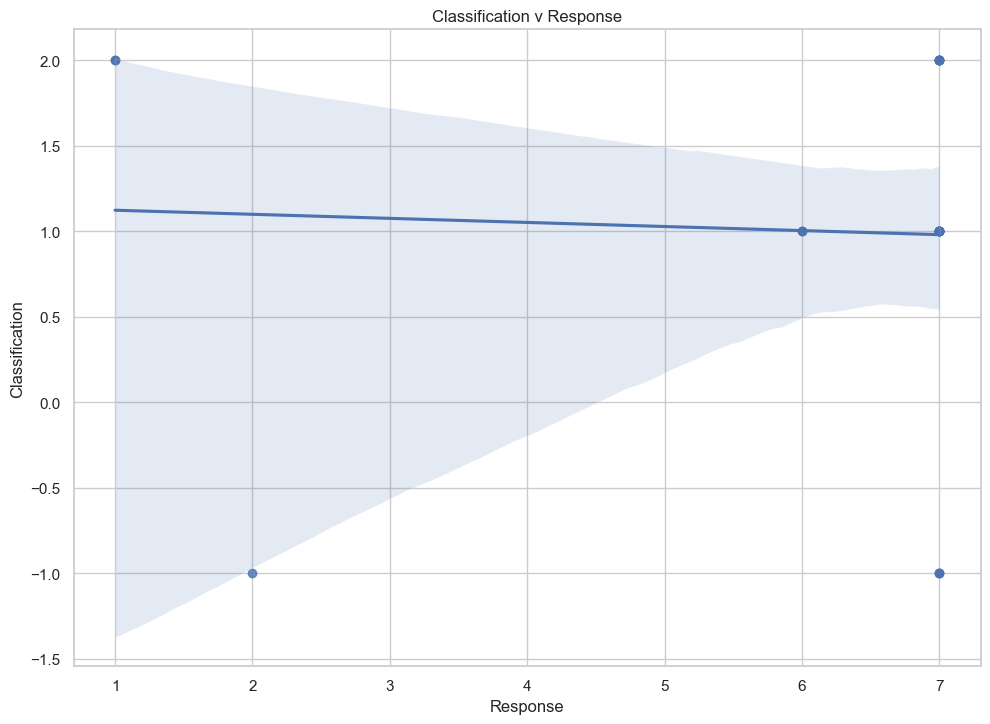

In [ ]:
# scatter plot on classification v response
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# increase size of plot
ax = sns.regplot(x=merged_df['response'], y=merged_df['classification'])
ax.set_title('Classification v Response')
ax.set_ylabel('Classification')
ax.set_xlabel('Response')

print(
    stats.kendalltau(merged_df['response'], merged_df['classification'])
)

# kendall tau
for question_type in merged_df.question_type_x.unique():
    print(question_type)
    print(stats.kendalltau(merged_df.loc[merged_df['question_type_x'] == question_type]
          ['response'], merged_df.loc[merged_df['question_type_x'] == question_type]['classification']))

for method in merged_df.method.unique():
    print(method)
    print(stats.kendalltau(merged_df.loc[merged_df['method'] == method]
          ['response'], merged_df.loc[merged_df['method'] == method]['classification']))

for question_type in merged_df.question_type_x.unique():
    for method in merged_df.method.unique():
        print(question_type, method)
        print(stats.kendalltau(merged_df.loc[(merged_df['question_type_x'] == question_type) & (merged_df['method'] == method)]['response'], merged_df.loc[(
            merged_df['question_type_x'] == question_type) & (merged_df['method'] == method)]['classification']))

In [ ]:

# hve to think through merging on sample_id and question

survey_df_gpt4.question.unique()

survey_q_to_anno_q = {
    # I should also try old_fact_and
    'The main passage is written as if the new fact is true': 'new_fact_and_main_passage',
    'The related passage does not contradict the new fact': 'new_fact_and_related_passage',
    'Ignoring the new fact, most of the old facts are still true in the main passage.': 'ground_truth_and_main_passage',
    'Ignoring the new fact, most of the old facts are still true in the related passage.': 'ground_truth_and_related_passage',
}
anno_q_to_survey_q = {
    v: k for k, v in survey_q_to_anno_q.items()
}
responses_filtered_df = survey_df_gpt4.loc[
    survey_df_gpt4['question'].isin(
        list(survey_q_to_anno_q.keys())
    )
]
responses_filtered_df['anno_question'] = responses_filtered_df['question'].apply(
    lambda x: survey_q_to_anno_q[x]
)
responses_filtered_df['response'] = responses_filtered_df['response'].fillna(4)
annos_df_tmp = annos_df.loc[
    (annos_df['rater'] == 6)
]
annos_rename = annos_df_tmp.rename(columns={'label': 'anno_question'})
# merge on sample_id, method and question
merged_df = pd.merge(
    responses_filtered_df,
    annos_rename,
    on=['sample_id', 'method', 'anno_question'],
)
merged_df.dropna(subset=['classification'], inplace=True)
merged_df['highlighted_sentences_len'] = merged_df['highlighted_sentences'].fillna('').apply(
    lambda x: len(x)
)
rating_to_number = {
    'supports': 2,
    'neutral': 1,
    'contradicts': -1
}
merged_df['classification'] = merged_df.apply(
    # * (x['highlighted_sentences_len'] + 1), multiplier for highlighted sentences
    lambda x: rating_to_number[x['classification']],
    axis=1
)

ValueError: Columns must be same length as key

SignificanceResult(statistic=nan, pvalue=nan)


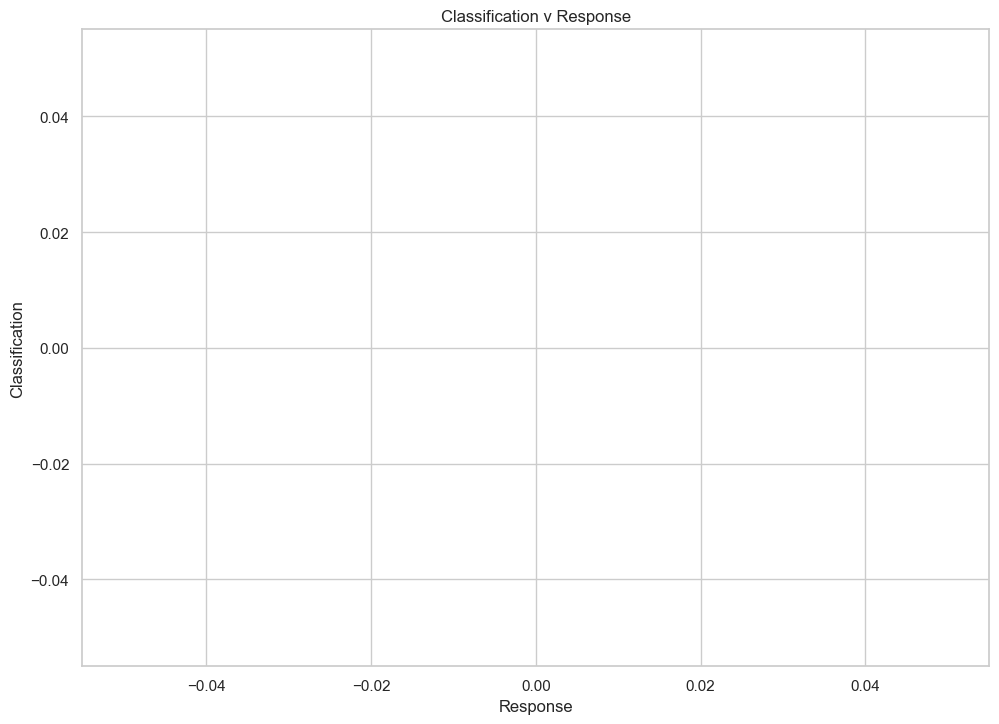

In [ ]:
# scatter plot on classification v response
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# increase size of plot
ax = sns.regplot(x=merged_df['response'], y=merged_df['classification'])
ax.set_title('Classification v Response')
ax.set_ylabel('Classification')
ax.set_xlabel('Response')

print(
    stats.kendalltau(merged_df['response'], merged_df['classification'])
)

# kendall tau
for question_type in merged_df.question_type_x.unique():
    print(question_type)
    print(stats.kendalltau(merged_df.loc[merged_df['question_type_x'] == question_type]
          ['response'], merged_df.loc[merged_df['question_type_x'] == question_type]['classification']))

for method in merged_df.method.unique():
    print(method)
    print(stats.kendalltau(merged_df.loc[merged_df['method'] == method]
          ['response'], merged_df.loc[merged_df['method'] == method]['classification']))

for question_type in merged_df.question_type_x.unique():
    for method in merged_df.method.unique():
        print(question_type, method)
        print(stats.kendalltau(merged_df.loc[(merged_df['question_type_x'] == question_type) & (merged_df['method'] == method)]['response'], merged_df.loc[(
            merged_df['question_type_x'] == question_type) & (merged_df['method'] == method)]['classification']))

## Statistical Significance of Machine Survey and Machine Annotation, Human Survey, Human Annotations



In [ ]:
import warnings
warnings.filterwarnings("ignore")

statistical_tests = []
for method_1 in responses_df.method.unique():
    for method_2 in responses_df.method.unique():
        if method_1 == method_2:
            continue
        for question_type in responses_df.question_type.unique():
            method_1_responses_tmp = responses_df.loc[
                (responses_df['question_type'] == question_type) & (
                    responses_df['method'] == method_1)
            ]['response']
            method_2_responses_tmp = responses_df.loc[
                (responses_df['question_type'] == question_type) & (
                    responses_df['method'] == method_2)
            ]['response']

            effect_df = pg.wilcoxon(
                method_1_responses_tmp,
                method_2_responses_tmp,
                alternative='less'
            )
            statistical_tests.append({
                "method": "human",
                "instrument": "survey",
                "question": f"{method_1} is significantly less than {method_2} for {question_type}",
                "significant": effect_df['p-val'].values[0] < 0.05
            })

import numpy as np
from scipy.stats import chi2_contingency

# Sample predicted labels for two machine learning systems
for method_1 in annos_df.method.unique():
    for method_2 in annos_df.method.unique():
        if method_1 == method_2:
            continue
        for question_type in annos_df.question_type.unique():
            system1_labels = annos_df.loc[
                (annos_df['method'] == method_1) & (
                    annos_df['question_type'] == question_type)
            ]['classification'].values
            system1_labels = [
                rating_to_number[anno] for anno in system1_labels
            ]
            system2_labels = annos_df.loc[
                (annos_df['method'] == method_2) & (
                    annos_df['question_type'] == question_type)
            ]['classification'].values
            system2_labels = [
                rating_to_number[anno] for anno in system2_labels
            ]

            # Create a contingency table
            contingency_table = np.array(
                [np.bincount(system1_labels), np.bincount(system2_labels)])

            # Perform the Chi-squared test
            chi2, p, _, _ = chi2_contingency(contingency_table)

            alpha = 0.05
            statistical_tests.append({
                "method": "human",
                "instrument": "annotation",
                "question": f"{method_1} and {method_2} for {question_type}",
                "significant": p < alpha
            }) 

import warnings
warnings.filterwarnings("ignore")

machine_surveys = {
    'gpt35': survey_df_gpt35,
    'gpt4': survey_df_gpt4,
    'llama2': survey_df_llama2,
    'gpt35_8_shot': survey_df_gpt35_8_shot,
    'gpt4_8_shot': survey_df_gpt4_8_shot,
    'llama2_8_shot': survey_df_llama2_8_shot
}


for df_method, df in machine_surveys.items():
    for method_1 in df.method.unique():
        for method_2 in df.method.unique():
            if method_1 == method_2:
                continue
            for question_type in df.question_type.unique():
                method_1_responses_tmp = df.loc[
                    (df['question_type'] == question_type) & (
                        df['method'] == method_1)
                ]['response']
                method_2_responses_tmp = df.loc[
                    (df['question_type'] == question_type) & (
                        df['method'] == method_2)
                ]['response']

                effect_df = pg.wilcoxon(
                    method_1_responses_tmp,
                    method_2_responses_tmp,
                    alternative='less'
                )
                statistical_tests.append({
                    "method": df_method,
                    "instrument": "survey",
                    "question": f"{method_1} is significantly less than {method_2} for {question_type}",
                    "significant": effect_df['p-val'].values[0] < 0.05
                })

for rater in ['gpt35', 'gpt4', 'llama2', 'gpt35_8_shot', 'gpt4_8_shot', 'llama2_8_shot']:
    
    tmp = annos_df.loc[
        annos_df['rater'] == rater
    ]
    for method_1 in tmp.method.unique():
        for method_2 in tmp.method.unique():
            if method_1 == method_2:
                continue
            for question_type in tmp.question_type.unique():
                system1_labels = tmp.loc[
                    (tmp['method'] == method_1) & (
                        tmp['question_type'] == question_type)
                ]['classification'].values
                system1_labels = [
                    rating_to_number[anno] for anno in system1_labels
                ]
                system2_labels = tmp.loc[
                    (tmp['method'] == method_2) & (
                        tmp['question_type'] == question_type)
                ]['classification'].values
                system2_labels = [
                    rating_to_number[anno] for anno in system2_labels
                ]
               
                # rem
                bc_1 = np.bincount(system1_labels, minlength=3)
                bc_2 = np.bincount(system2_labels, minlength=3)

                #add 1 to each bin
                bc_1 += 1
                bc_2 += 1
                try:
                    # Create a contingency table
                    contingency_table = np.array(
                        [bc_1, bc_2]
                    )

                    # Perform the Chi-squared test
                    chi2, p, _, _ = chi2_contingency(contingency_table)
                except:
                     print([np.bincount(system1_labels, minlength=3), np.bincount(system2_labels, minlength=3)])


                alpha = 0.05
                statistical_tests.append({
                    "method": rater,
                    "instrument": "annotation",
                    "question": f"{method_1} and {method_2} for {question_type}",
                    "significant": p < alpha
                }) 



ValueError: 'list' argument must have no negative elements

In [ ]:
statistical_tests_df = pd.DataFrame(statistical_tests)
statistical_tests_df

,method,instrument,question,significant
0,human,survey,human is significantly less than no_edit for N...,False
1,human,survey,human is significantly less than no_edit for F...,False
2,human,survey,human is significantly less than no_edit for C...,False
3,human,survey,human is significantly less than no_edit for I...,False
4,human,survey,human is significantly less than no_edit for T...,False
5,human,survey,human is significantly less than no_edit for E...,False
6,human,survey,human is significantly less than rome for Natu...,False
7,human,survey,human is significantly less than rome for Fact...,False
8,human,survey,human is significantly less than rome for Cros...,False
9,human,survey,human is significantly less than rome for Inte...,False


In [ ]:
# table of statistical tests for survey pivot on question and method
table = statistical_tests_df.loc[
    statistical_tests_df['instrument'] == 'survey'
].pivot_table(
    index=['question'],
    columns=['method'],
    values='significant',
    aggfunc='sum'
).fillna(0).astype(int)

# put human first
table = table[['human', 'gpt35', 'gpt4', 'llama2', 'gpt35_8_shot', 'gpt4_8_shot', 'llama2_8_shot']]
# filter table to only include significant results for human
table = table.loc[table['human'] > 0]
table['sum'] = table.sum(axis=1)
table.sort_values(by=['sum'], ascending=False)

KeyError: "['gpt35', 'gpt4', 'llama2', 'gpt35_8_shot', 'gpt4_8_shot', 'llama2_8_shot'] not in index"

In [ ]:
# table of statistical tests for survey pivot on question and method
table = statistical_tests_df.loc[
    statistical_tests_df['instrument'] == 'annotation'
].pivot_table(
    index=['question'],
    columns=['method'],
    values='significant',
    aggfunc='sum'
).fillna(0).astype(int)

# put human first
table = table[['human', 'gpt35', 'gpt4', 'llama2', 'gpt35_8_shot', 'gpt4_8_shot', 'llama2_8_shot']]
# filter table to only include significant results for human
table = table.loc[table['human'] > 0]
table['sum'] = table.sum(axis=1)
table.sort_values(by=['sum'], ascending=False)

KeyError: "None of [Index(['human', 'gpt35', 'gpt4', 'llama2', 'gpt35_8_shot', 'gpt4_8_shot',\n       'llama2_8_shot'],\n      dtype='object', name='method')] are in the [columns]"

# Correlation between Other Automated Metrics and Machine and Human Data

In [ ]:
responses_df.question.unique()

array(['Both passages are natural sounding text close to what a human would write.',
       'Ignoring the new fact, most of the old facts are still true in the main passage.',
       'Ignoring the new fact, most of the old facts are still true in the related passage.',
       'Ignoring the old and new facts, the main passage and the related passage do not contradict each other.',
       'Ignoring the old and new facts, the main passage does not contradict itself.',
       'Ignoring the old and new facts, the related passage does not contradict itself.',
       'The main passage is focused on the subject and the related passage is focused on the related entity',
       'The main passage is written as if the new fact is true',
       'The related passage does not contradict the new fact'],
      dtype=object)

In [ ]:
responses_df.question_type.unique()

array(['Naturalness', 'Factual consistency', 'Cross passage consistency',
       'Internal consistency', 'Topicality', 'Edit consistency'],
      dtype=object)

In [ ]:
annos_df.question_type.unique()

array(['New fact is true', 'Old fact is true', 'Ground truth is true'],
      dtype=object)

In [ ]:
automatic_metrics = [
    'nli',
    'perplexity',
    'ngram_entropy',
    'rouge',
    'bertscore',
    'consistency'
]

interventions = [
    'human_edit',
    'no_edit',
    'rome_edit'
]

def nli_fn(
    sample,
    sample_id,
    intervention,
    automatic_metric
):
    ms = []
    for metric_type, value in sample.items():
        # value is a dict {key (label): value (score)}
        # argmax to get label with highest score
        premise = value['premise'],
        hypothesis = value['hypothesis']
        del value['premise']
        del value['hypothesis']
        label = max(value, key=value.get)
        # get an nli score
        # entailment is 2, neutral is 1, contradiction is -1
        keys = {
            'entailment': 2,
            'neutral': 1,
            'contradiction': -1
        }
        vals = sum([
            val[0] * keys[key]
            for key, val in value.items()
        ])
        ms.append({
            "metric_type": metric_type,
            "value": vals,
            "sample_id": sample_id,
            "intervention": intervention,
            "automatic_metric": automatic_metric,
            "classification": label,
            "premise": premise[0],
            "hypothesis": hypothesis
        })
    return ms

def perplexity_fn(
    sample,
    sample_id,
    intervention,
    automatic_metric
):
    ms = []
    for metric_type, value in sample.items():
        ms.append({
            "metric_type": metric_type,
            "value": value[0],
            "sample_id": sample_id,
            "intervention": intervention,
            "automatic_metric": automatic_metric
        })
    return ms

def ngram_entropy_fn(
    sample,
    sample_id,
    intervention,
    automatic_metric
):
    ms = []
    for metric_type, value in sample.items():
        ms.append({
            "metric_type": metric_type,
            "value": value[0],
            "sample_id": sample_id,
            "intervention": intervention,
            "automatic_metric": automatic_metric
        })
    return ms

def rouge_fn(
    sample,
    sample_id,
    intervention,
    automatic_metric
):
    ms = []
    for metric_type, value in sample.items():
        ms.append({
            "metric_type": metric_type,
            "value": value[0]['rouge1'],
            "sample_id": sample_id,
            "intervention": intervention,
            "automatic_metric": automatic_metric
        })
    return ms

def bertscore_fn(
    sample,
    sample_id,
    intervention,
    automatic_metric
):
    ms = []
    for metric_type, value in sample.items():
        ms.append({
            "metric_type": metric_type,
            "value": value[0]['f1'][0],
            "sample_id": sample_id,
            "intervention": intervention,
            "automatic_metric": automatic_metric
        })
    return ms

def consistency_fn(
    sample,
    sample_id,
    intervention,
    automatic_metric
):
    ms = []
    for metric_type, value in sample.items():
        ms.append({
            "metric_type": metric_type,
            "value": value[0],
            "sample_id": sample_id,
            "intervention": intervention,
            "automatic_metric": automatic_metric
        })
    return ms

automatic_metric_fns = {
    'nli': nli_fn,
    'perplexity': perplexity_fn,
    'ngram_entropy': ngram_entropy_fn,
    'rouge': rouge_fn,
    'bertscore': bertscore_fn,
    'consistency': consistency_fn
}

metrics = []
for intervention in interventions:
    for automatic_metric in automatic_metrics:
        with open(f'../results/llama2_chat_{intervention}_survey_samples_{automatic_metric}.json') as f:
            samples = json.load(f)
            for sample_id, results in samples.items():
                ms = automatic_metric_fns[automatic_metric](
                    results,
                    sample_id,
                    intervention,
                    automatic_metric
                )
                metrics.extend(ms)

In [ ]:
metrics_df = pd.DataFrame(
    metrics
)
metrics_df['metric'] = metrics_df['automatic_metric'] + '_' + metrics_df['metric_type']
metrics_df['intervention'] = metrics_df['intervention'].apply(
    lambda x: x.replace('human_edit', 'human')
).apply(
    lambda x: x.replace('no_edit', 'no_edit')
).apply(
    lambda x: x.replace('rome_edit', 'rome')
)
mdf = metrics_df.pivot_table(
    index=['sample_id', 'intervention'],
    columns=['metric'],
    values='value',
    aggfunc='mean'
).round(2).reset_index()
# add scores for each sample_id and question from responses_df
rdf = responses_df.pivot_table(
    index=['sample_id', 'method'],
    columns=['question_type'],
    values='response',
    aggfunc='mean'
).round(2).reset_index()

# merge on sample_id and intervention
merged_df = pd.merge(
    mdf,
    rdf.rename(columns={
        'method': 'intervention'
    }),
    on=['sample_id', 'intervention']
)

In [ ]:
metrics_df.pivot_table(
    index=['intervention'],
    columns=['metric'],
    values='value',
    aggfunc='mean'
).round(2)[[
    'nli_new_fact_and_main_passage',
    'nli_ground_truth_and_main_passage'
]]

metric,nli_new_fact_and_main_passage,nli_ground_truth_and_main_passage
intervention,,
human,124.62,143.21
no_edit,-57.86,95.40
rome,139.61,38.78


In [ ]:
corrs = [
    # Rouge
    ['Topicality', 'rouge_topicality_subject'],
    ['Topicality', 'rouge_topicality_related'],
    ['Edit consistency', 'rouge_edit_consistency_subject'],
    ['Edit consistency', 'rouge_edit_consistency_related'],
    ['Factual consistency', 'rouge_factual_consistency_subject'],
    ['Factual consistency', 'rouge_factual_consistency_related'],
    ['Cross passage consistency', 'rouge_cross_passage_consistency'],
    ['Internal consistency', 'rouge_internal_consistency_subject'],
    ['Internal consistency', 'rouge_internal_consistency_related'],
    # BERTScore
    ['Topicality', 'bertscore_topicality_subject'],
    ['Topicality', 'bertscore_topicality_related'],
    ['Edit consistency', 'bertscore_edit_consistency_subject'],
    ['Edit consistency', 'bertscore_edit_consistency_related'],
    ['Factual consistency', 'bertscore_factual_consistency_subject'],
    ['Factual consistency', 'bertscore_factual_consistency_related'],
    ['Cross passage consistency', 'bertscore_cross_passage_consistency'],
    ['Internal consistency', 'bertscore_internal_consistency_subject'],
    ['Internal consistency', 'bertscore_internal_consistency_related'],
    # Other
    ['Naturalness', 'perplexity_main_passage'],
    ['Naturalness', 'perplexity_related_passage'],
    ['Naturalness', 'ngram_entropy_main_passage'],
    ['Naturalness', 'ngram_entropy_related_passage'],
    ['Factual consistency', 'consistency_main_passage'],
    ['Factual consistency', 'nli_ground_truth_and_main_passage'],
    ['Factual consistency', 'nli_ground_truth_and_related_passage'],
    ['Edit consistency', 'nli_new_fact_and_related_passage'],
    ['Edit consistency', 'nli_new_fact_and_main_passage'],
]

automatic_metrics = []
for corr in corrs:

    cr = stats.spearmanr(
        merged_df[corr[0]],
        merged_df[corr[1]]
    )
    automatic_metrics.append({
        "metric": corr[1].split('_')[0],
        "question_type": corr[0],
        "correlation": cr[1],
    })

am_df = pd.DataFrame(automatic_metrics)
am_df.pivot_table(
    index=['metric'],
    columns=['question_type'],
    values='correlation',
    aggfunc='mean'
).round(2) # [[ 'Edit consistency', 'Factual consistency', 'Naturalness', 'Topicality']]

question_type,Cross passage consistency,Edit consistency,Factual consistency,Internal consistency,Naturalness,Topicality
metric,,,,,,
bertscore,0.07,0.07,0.23,0.22,NaN,0.01
consistency,NaN,NaN,0.24,NaN,NaN,NaN
ngram,NaN,NaN,NaN,NaN,0.0,NaN
nli,NaN,0.00,0.10,NaN,NaN,NaN
perplexity,NaN,NaN,NaN,NaN,0.3,NaN
rouge,0.41,0.06,0.18,0.52,NaN,0.10


In [ ]:
# correlation with annotation_classifications
annos_df.loc[
    annos_df['rater'] == 1
]

key_map = {
    'nli_new_fact_and_main_passage': 'new_fact_and_main_passage',
    'nli_old_fact_and_main_passage': 'old_fact_and_main_passage',
    'nli_new_fact_and_related_passage': 'new_fact_and_related_passage',
    'nli_old_fact_and_related_passage': 'old_fact_and_related_passage',
    'nli_ground_truth_and_main_passage': 'ground_truth_and_main_passage',
    'nli_ground_truth_and_related_passage': 'ground_truth_and_related_passage'
}
mdsnli = metrics_df.loc[metrics_df['automatic_metric'] == 'nli']
mdsnli['metric'] = mdsnli.metric.apply(
    lambda x: key_map[x]
)
rater_1_df = annos_df.loc[
    annos_df['rater'] == 1
]
# merge rater_1_df and mds on sample_id and question_type
# merged_df = pd.merge(
#     rater_1_df,
#     mds,
#     on=['sample_id', 'question_type']
# )
mdsnli.head(1)
# rename metric_type to question_type
mdsnli.rename(columns={'metric_type': 'label'}, inplace=True)
# rename intervention to method
mdsnli.rename(columns={'intervention': 'method'}, inplace=True)
# merge rater_1_df and mds on sample_id and question_type

classifications = []
for i, m in mdsnli.iterrows():
    for i, r in rater_1_df.iterrows():
        method = m['method']
        if method == 'human_edit':
            method = 'human'
        if method == 'rome_edit':
            method = 'rome'
        if (
            m['sample_id'] == r['sample_id'] and m['label'] == r['label']
            and m['hypothesis'] in r['content'] and method == r['method']
        ):
            classifications.append({
                "sample_id": m['sample_id'],
                "method": m['method'],
                "label": m['label'],
                "classification_x": r['classification'],
                "classification_y": m['classification']
            })
merged_dfnli = pd.DataFrame(classifications)
merged_dfnli['classification_x'] = merged_dfnli['classification_x'].apply(
    lambda x: rating_to_number[x]
)
rating_to_number_2 = {'entailment': 2, 'neutral': 1, 'contradiction': -1}
merged_dfnli['classification_y'] = merged_dfnli['classification_y'].apply(
    lambda x: rating_to_number_2[x]
)
#cmopute krippendorff alpha
metricsnli = []
metricsnli.append({
    "label": "all",
    "krippendorff": krippendorff.alpha(
        merged_dfnli[['classification_x', 'classification_y']].swapaxes(
            0, 1
        )
    ),
    "accuracy": accuracy_score(
        merged_dfnli['classification_x'],
        merged_dfnli['classification_y']
    )
})
for label in merged_dfnli.label.unique():
    metricsnli.append({
        "label": label,
        "krippendorff": krippendorff.alpha(
            merged_dfnli.loc[merged_dfnli['label'] == label][['classification_x', 'classification_y']].swapaxes(
                0, 1
            )
        ),
        "accuracy": accuracy_score(
            merged_dfnli.loc[merged_dfnli['label'] == label]['classification_x'],
            merged_dfnli.loc[merged_dfnli['label'] == label]['classification_y']
        )
    })
    
anno_metrics_df = pd.DataFrame(metricsnli)
anno_metrics_df

,label,krippendorff,accuracy
0,all,0.512414,0.685185
1,new_fact_and_main_passage,0.853448,0.555556
2,old_fact_and_main_passage,0.105263,0.444444
3,new_fact_and_related_passage,0.927039,0.888889
4,old_fact_and_related_passage,0.413793,0.666667
5,ground_truth_and_main_passage,0.953930,0.888889
6,ground_truth_and_related_passage,-0.222222,0.666667


In [ ]:
metrics_df_tmp.metric_type.unique()

array(['new_fact_and_main_passage', 'old_fact_and_main_passage',
       'new_fact_and_related_passage', 'old_fact_and_related_passage',
       'ground_truth_and_main_passage',
       'ground_truth_and_related_passage'], dtype=object)

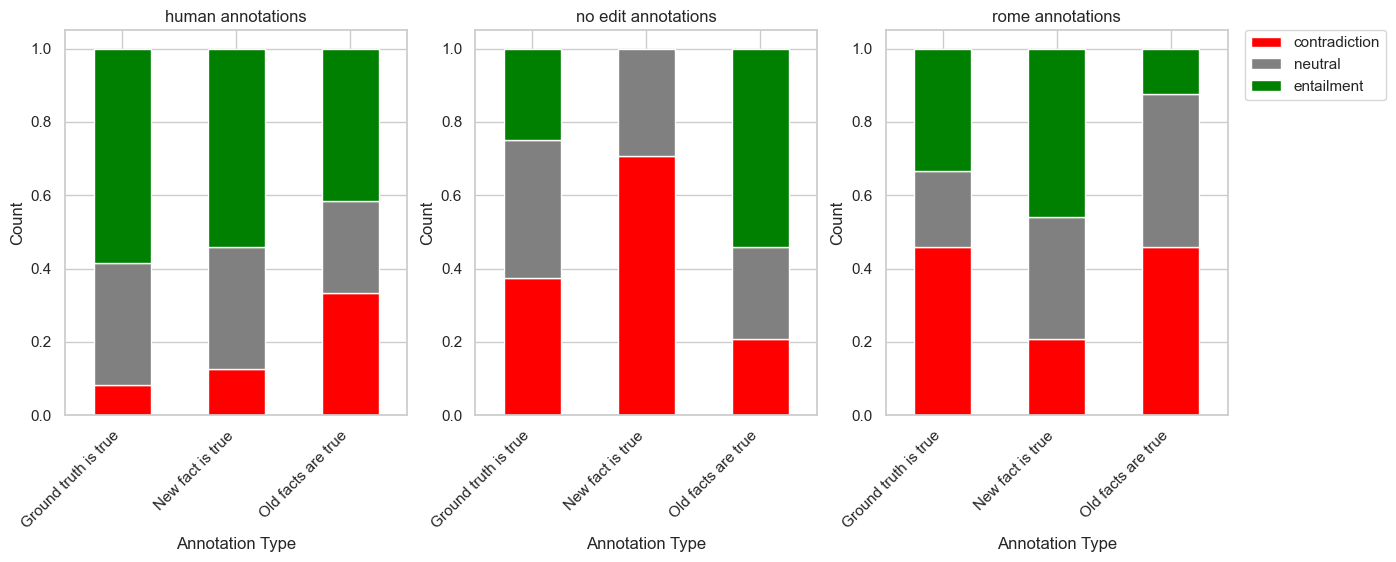

In [ ]:
metrics_df_tmp = metrics_df.loc[
    metrics_df['automatic_metric'] == 'nli'
]
metric_type_map = {
    'new_fact_and_main_passage': 'New fact is true',
    'old_fact_and_main_passage': 'Old facts are true',
    'new_fact_and_related_passage': 'New fact is true',
    'old_fact_and_related_passage': 'Old facts are true',
    'ground_truth_and_main_passage': 'Ground truth is true',
    'ground_truth_and_related_passage': 'Ground truth is true'
}
metrics_df_tmp['metric_type'] = metrics_df_tmp['metric_type'].apply(
    lambda x: metric_type_map[x]
)
# bar graph of rating per class per method that is proportional
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# create three subplots for each method on one plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# order methods rome, human, no edit
metrics_df_tmp.sort_values(by=['intervention'], inplace=True)
for i, method in enumerate(metrics_df_tmp['intervention'].unique()):
    tmp_df = metrics_df_tmp.loc[
        metrics_df_tmp['intervention'] == method
    ].pivot_table(
        index=['metric_type'],
        columns=['classification'],
        values='value',
        aggfunc='count'
    )
    # order columns entialment, neutral, contradiction
    tmp_df = tmp_df[[
        'contradiction', 'neutral',  'entailment', 
    ]]
    ax = row_wise_normalise(tmp_df).plot(
        kind='bar',
        ax=axs[i],
        stacked=True,
        color=[
            'red', 'grey', 'green'
        ]
    )
    ax.set_title(f"{method.replace('_', ' ')} annotations")
    ax.set_xlabel('Annotation Type')
    ax.set_ylabel('Count')
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    if i < 2:
        ax.get_legend().remove()
    else:
        ax.legend(
            bbox_to_anchor=(1.05, 1),
            loc='upper left',
            borderaxespad=0.
        )

# save plot
fig = ax.get_figure()
